# Credit EDA Assignment

### Importing important libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

### Reading File 1 - application_data.csv
'application_data.csv' contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

In [2]:
app = pd.read_csv("application_data.csv")
app.shape

(307511, 122)

### Looking at the columns

In [3]:
app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## HANDLING MISSING VALUES
### Identifying the percentage of Null values in each column
Here we also sort the data in decending order so that we get the columns with maximum null values at the top. We are looking at the top 50 columns

In [4]:
app.isna().sum().sort_values(ascending=False).head(50)/app.shape[0] * 100

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [5]:
app.isna().sum(axis=0).sort_values(ascending=False).head(50)/app.shape[0] * 100

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56




Saving the result for all the columns(not just 50) in a variable in order to then extract the column names

In [6]:
tempc=app.isna().sum().sort_values(ascending=False)/app.shape[0] * 100

### Assumption - missing value threshold is decided as 40%
We need to remove the columns with more than 40% null values. To do that we identify the columns that have less than 40% null values. app_acc_cols is a list of all columns with null values less that 40%

In [7]:
app_acc_cols=list(tempc[tempc<40.00].index)
len(app_acc_cols)

73

### Deleting of columns with excess null values
After deleting the columns we will now have 73 columns left

In [8]:
app=app[app_acc_cols]
app.shape

(307511, 73)

### Identification of unwanted colums.
Based on the data dictionary provided, there are 34 colums that are not useful for the analysis. 'unwanted_cols' is a list of such columns

In [9]:
tempr=app.isna().sum(axis=0).sort_values(ascending=False)/app.shape[0] * 100

In [10]:
tempr[tempr>0]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [11]:
unwanted_cols=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
       'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 
       'AMT_REQ_CREDIT_BUREAU_QRT','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2','LIVE_CITY_NOT_WORK_CITY', 
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION']
len(unwanted_cols)

48

Dropping the unwanted columns. We will finally be left with 28 columns

In [12]:
app.drop(unwanted_cols, axis=1, inplace=True)
app.shape

(307511, 28)

In [13]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OCCUPATION_TYPE             211120 non-null  object 
 1   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 2   NAME_TYPE_SUITE             306219 non-null  object 
 3   AMT_GOODS_PRICE             307233 non-null  float64
 4   AMT_ANNUITY                 307499 non-null  float64
 5   CNT_FAM_MEMBERS             307509 non-null  float64
 6   DAYS_LAST_PHONE_CHANGE      307510 non-null  float64
 7   CNT_CHILDREN                307511 non-null  int64  
 8   NAME_CONTRACT_TYPE          307511 non-null  object 
 9   CODE_GENDER                 307511 non-null  object 
 10  FLAG_OWN_CAR                307511 non-null  object 
 11  FLAG_OWN_REALTY             307511 non-null  object 
 12  AMT_CREDIT                  307511 non-null  float64
 13  AMT_INCOME_TOT

In [14]:
app.head(50)

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,...,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,Laborers,1.0,Unaccompanied,351000.0,24700.5,1.0,-1134.0,0,Cash loans,M,...,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,Core staff,0.0,Family,1129500.0,35698.5,2.0,-828.0,0,Cash loans,F,...,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,Laborers,0.0,Unaccompanied,135000.0,6750.0,1.0,-815.0,0,Revolving loans,M,...,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004
3,Laborers,NaN,Unaccompanied,297000.0,29686.5,2.0,-617.0,0,Cash loans,F,...,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,100006
4,Core staff,0.0,Unaccompanied,513000.0,21865.5,1.0,-1106.0,0,Cash loans,M,...,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,100007
5,Laborers,1.0,"Spouse, partner",454500.0,27517.5,2.0,-2536.0,0,Cash loans,M,...,-477,-4970.0,-1588,-16941,0.035792,House / apartment,Married,Secondary / secondary special,State servant,100008
6,Accountants,2.0,Unaccompanied,1395000.0,41301.0,3.0,-1562.0,1,Cash loans,F,...,-619,-1213.0,-3130,-13778,0.035792,House / apartment,Married,Higher education,Commercial associate,100009
7,Managers,0.0,Unaccompanied,1530000.0,42075.0,2.0,-1070.0,0,Cash loans,M,...,-2379,-4597.0,-449,-18850,0.003122,House / apartment,Married,Higher education,State servant,100010
8,NaN,1.0,Children,913500.0,33826.5,2.0,0.0,0,Cash loans,F,...,-3514,-7427.0,365243,-20099,0.018634,House / apartment,Married,Secondary / secondary special,Pensioner,100011
9,Laborers,NaN,Unaccompanied,405000.0,20250.0,1.0,-1673.0,0,Revolving loans,M,...,-3992,-14437.0,-2019,-14469,0.019689,House / apartment,Single / not married,Secondary / secondary special,Working,100012


### Fixing Data Types
All columns apart from 'DAYS_BIRTH', 'DAYS_REGISTRATION' ,'DAYS_EMPLOYED' and 'DAYS_ID_PUBLISH' that are of 'int64' data types are actually flags therefore they are categorical type of columns. We need to convert them to object/str data type

'DAYS_BIRTH', 'DAYS_REGISTRATION' ,'DAYS_EMPLOYED' and 'DAYS_ID_PUBLISH' have all negative values. We need to take their absolute value and also convert DAYS_BIRTH to age

Also we will derive new columns from these convering them to Years, and if they better represent the data, the columns with days can be dropped as well

In [15]:
absv=['DAYS_BIRTH', 'DAYS_REGISTRATION' ,'DAYS_EMPLOYED' , 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
derv=['AGE','YEARS_REGISTRATION','YEARS_EMPLOYED','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']
for i in range(len(absv)):
    app[absv[i]]=app[absv[i]].abs().astype(float)
    app[derv[i]]=app[absv[i]]/365 

app['AGE']=app['AGE'] //1

### dropping the columns with day values

In [16]:
app.drop(absv, axis=1,inplace=True)

In [17]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OCCUPATION_TYPE             211120 non-null  object 
 1   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 2   NAME_TYPE_SUITE             306219 non-null  object 
 3   AMT_GOODS_PRICE             307233 non-null  float64
 4   AMT_ANNUITY                 307499 non-null  float64
 5   CNT_FAM_MEMBERS             307509 non-null  float64
 6   CNT_CHILDREN                307511 non-null  int64  
 7   NAME_CONTRACT_TYPE          307511 non-null  object 
 8   CODE_GENDER                 307511 non-null  object 
 9   FLAG_OWN_CAR                307511 non-null  object 
 10  FLAG_OWN_REALTY             307511 non-null  object 
 11  AMT_CREDIT                  307511 non-null  float64
 12  AMT_INCOME_TOTAL            307511 non-null  float64
 13  TARGET        

In [18]:
app.TARGET

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

### We can now segrigate the data:

In [19]:
a_float_cl = list(app.select_dtypes(include ='float').columns)
a_object_cl = list(app.select_dtypes(include =['object','category']).columns)
#a_category_cl = list(app.select_dtypes(include ='category').columns)
a_int_cl = list(app.select_dtypes(include ='int').columns)

In [20]:
app[a_float_cl].head(10)

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AGE,YEARS_REGISTRATION,YEARS_EMPLOYED,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,1.0,351000.0,24700.5,1.0,406597.5,202500.0,0.018801,25.0,9.994521,1.745205,5.808219,3.106849
1,0.0,1129500.0,35698.5,2.0,1293502.5,270000.0,0.003541,45.0,3.249315,3.254795,0.797260,2.268493
2,0.0,135000.0,6750.0,1.0,135000.0,67500.0,0.010032,52.0,11.671233,0.616438,6.934247,2.232877
3,NaN,297000.0,29686.5,2.0,312682.5,135000.0,0.008019,52.0,26.939726,8.326027,6.676712,1.690411
4,0.0,513000.0,21865.5,1.0,513000.0,121500.0,0.028663,54.0,11.810959,8.323288,9.473973,3.030137
5,1.0,454500.0,27517.5,2.0,490495.5,99000.0,0.035792,46.0,13.616438,4.350685,1.306849,6.947945
6,2.0,1395000.0,41301.0,3.0,1560726.0,171000.0,0.035792,37.0,3.323288,8.575342,1.695890,4.279452
7,0.0,1530000.0,42075.0,2.0,1530000.0,360000.0,0.003122,51.0,12.594521,1.230137,6.517808,2.931507
8,1.0,913500.0,33826.5,2.0,1019610.0,112500.0,0.018634,55.0,20.347945,1000.665753,9.627397,0.000000
9,NaN,405000.0,20250.0,1.0,405000.0,135000.0,0.019689,39.0,39.553425,5.531507,10.936986,4.583562


In [21]:
pd.options.display.float_format = '{:.10f}'.format
app[a_float_cl].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AGE,YEARS_REGISTRATION,YEARS_EMPLOYED,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
count,265992.0000000000,307233.0000000000,307499.0000000000,307509.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307510.0000000000
mean,1.8999744353,538396.2074288895,27108.5739091834,2.1526654504,599025.9997057016,168797.9192969845,0.0208681121,43.4359681442,13.6606036371,185.5472387645,8.2032941733,2.6379692831
std,1.8692949982,369446.4605400129,14493.7373151174,0.9106815692,402490.7769959460,237123.1462788365,0.0138312801,11.9545929273,9.6517433451,382.0376761799,4.1354806000,2.2652287316
min,0.0000000000,40500.0000000000,1615.5000000000,1.0000000000,45000.0000000000,25650.0000000000,0.0002900000,20.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,0.0000000000,238500.0000000000,16524.0000000000,2.0000000000,270000.0000000000,112500.0000000000,0.0100060000,34.0000000000,5.5068493151,2.5561643836,4.7123287671,0.7506849315
50%,1.0000000000,450000.0000000000,24903.0000000000,2.0000000000,513531.0000000000,147150.0000000000,0.0188500000,43.0000000000,12.3397260274,6.0794520548,8.9150684932,2.0739726027
75%,3.0000000000,679500.0000000000,34596.0000000000,3.0000000000,808650.0000000000,202500.0000000000,0.0286630000,53.0000000000,20.4917808219,15.6356164384,11.7780821918,4.3013698630
max,25.0000000000,4050000.0000000000,258025.5000000000,20.0000000000,4050000.0000000000,117000000.0000000000,0.0725080000,69.0000000000,67.5945205479,1000.6657534247,19.7178082192,11.7589041096


In [22]:
app[a_float_cl].isna().sum().sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
YEARS_LAST_PHONE_CHANGE           1
AMT_CREDIT                        0
AMT_INCOME_TOTAL                  0
REGION_POPULATION_RELATIVE        0
AGE                               0
YEARS_REGISTRATION                0
YEARS_EMPLOYED                    0
YEARS_ID_PUBLISH                  0
dtype: int64

In [23]:
app[a_object_cl].head(10)

,OCCUPATION_TYPE,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,Laborers,Unaccompanied,Cash loans,M,N,Y,WEDNESDAY,Business Entity Type 3,House / apartment,Single / not married,Secondary / secondary special,Working
1,Core staff,Family,Cash loans,F,N,N,MONDAY,School,House / apartment,Married,Higher education,State servant
2,Laborers,Unaccompanied,Revolving loans,M,Y,Y,MONDAY,Government,House / apartment,Single / not married,Secondary / secondary special,Working
3,Laborers,Unaccompanied,Cash loans,F,N,Y,WEDNESDAY,Business Entity Type 3,House / apartment,Civil marriage,Secondary / secondary special,Working
4,Core staff,Unaccompanied,Cash loans,M,N,Y,THURSDAY,Religion,House / apartment,Single / not married,Secondary / secondary special,Working
5,Laborers,"Spouse, partner",Cash loans,M,N,Y,WEDNESDAY,Other,House / apartment,Married,Secondary / secondary special,State servant
6,Accountants,Unaccompanied,Cash loans,F,Y,Y,SUNDAY,Business Entity Type 3,House / apartment,Married,Higher education,Commercial associate
7,Managers,Unaccompanied,Cash loans,M,Y,Y,MONDAY,Other,House / apartment,Married,Higher education,State servant
8,NaN,Children,Cash loans,F,N,Y,WEDNESDAY,XNA,House / apartment,Married,Secondary / secondary special,Pensioner
9,Laborers,Unaccompanied,Revolving loans,M,N,Y,THURSDAY,Electricity,House / apartment,Single / not married,Secondary / secondary special,Working


In [24]:
app[a_object_cl].isna().sum().sort_values(ascending=False)

OCCUPATION_TYPE               96391
NAME_TYPE_SUITE                1292
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
dtype: int64

In [25]:
app.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [26]:
app.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [27]:
app[a_int_cl].head(10)

,CNT_CHILDREN,TARGET,HOUR_APPR_PROCESS_START,SK_ID_CURR
0,0,1,10,100002
1,0,0,11,100003
2,0,0,9,100004
3,0,0,17,100006
4,0,0,11,100007
5,0,0,16,100008
6,1,0,16,100009
7,0,0,16,100010
8,0,0,14,100011
9,0,0,8,100012


In [28]:
app[a_int_cl].isna().sum().sort_values(ascending=False)

CNT_CHILDREN               0
TARGET                     0
HOUR_APPR_PROCESS_START    0
SK_ID_CURR                 0
dtype: int64


### Handling MISSING VALUES in categorical columns

The NAME_FAMILY_STATUS column has Unknown category for null values. We need to replace these with pn.nan for better processing. Similar function done for ''XNA' in the CODE_GENDER column

In [29]:
app['NAME_FAMILY_STATUS']=app.NAME_FAMILY_STATUS.apply(lambda x: np.nan if x=='Unknown' else x)
app['CODE_GENDER']=app.CODE_GENDER.apply(lambda x: np.nan if x=='XNA' else x)

In [30]:
app[a_object_cl].isna().sum().sort_values(ascending=False)

OCCUPATION_TYPE               96391
NAME_TYPE_SUITE                1292
CODE_GENDER                       4
NAME_FAMILY_STATUS                2
NAME_CONTRACT_TYPE                0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
NAME_HOUSING_TYPE                 0
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
dtype: int64

In [31]:
app.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [32]:
app.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', nan], dtype=object)

As we see, 'OCCUPATION_TYPE' has more than 31% null values. Also Occupation is an important column for our analysis.
Therefore imputing these values will affect the analysis heavily. Hence it is better if create a new category call it unkown and replace all the NAs with 'Unknown'

For NAME_TYPE_SUITE,NAME_FAMILY_STATUS and CODE_GENDER  the no of null values is quite less, also the column is not that significant in our analysis. Therefore we can impute it with the mode

In [33]:
app.OCCUPATION_TYPE.fillna('Unknown Occupation',inplace=True)
app.NAME_TYPE_SUITE.fillna(app.NAME_TYPE_SUITE.mode()[0], inplace=True)
app.NAME_FAMILY_STATUS.fillna(app.NAME_FAMILY_STATUS.mode()[0], inplace=True)
app.CODE_GENDER.fillna(app.CODE_GENDER.mode()[0], inplace=True)


In [34]:
app[a_object_cl].isna().sum()

OCCUPATION_TYPE               0
NAME_TYPE_SUITE               0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
NAME_HOUSING_TYPE             0
NAME_FAMILY_STATUS            0
NAME_EDUCATION_TYPE           0
NAME_INCOME_TYPE              0
dtype: int64

In [35]:
app.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers',
       'Unknown Occupation', 'Drivers', 'Sales staff', 'Cleaning staff',
       'Cooking staff', 'Private service staff', 'Medicine staff',
       'Security staff', 'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

### Handling MISSING VALUES in numerical columns

#### FLOAT COLUMNS:

In [36]:
app[a_float_cl].isna().sum()/app.shape[0] * 100

AMT_REQ_CREDIT_BUREAU_YEAR   13.5016308360
AMT_GOODS_PRICE               0.0904032701
AMT_ANNUITY                   0.0039022994
CNT_FAM_MEMBERS               0.0006503832
AMT_CREDIT                    0.0000000000
AMT_INCOME_TOTAL              0.0000000000
REGION_POPULATION_RELATIVE    0.0000000000
AGE                           0.0000000000
YEARS_REGISTRATION            0.0000000000
YEARS_EMPLOYED                0.0000000000
YEARS_ID_PUBLISH              0.0000000000
YEARS_LAST_PHONE_CHANGE       0.0003251916
dtype: float64

#### Imputing missing values with median
The percentage of missing values in these columns is not that significant, also the column with the most missing values - AMT_REQ_CREDIT_BUREAU_YEAR is not that important for the analysis. Hence we can impute them.

For normalised data, the mean and the median are either same or very close. For data that has outlies, the mean is heavily affected. Hence it is safe to impute missing values with mediuan instead of mean. This will give us a good approximation even if a certain column has outliers

In [37]:
for i in a_float_cl:
    app[i].fillna(app[i].median(), inplace=True)

In [38]:
app[a_float_cl].isna().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_GOODS_PRICE               0
AMT_ANNUITY                   0
CNT_FAM_MEMBERS               0
AMT_CREDIT                    0
AMT_INCOME_TOTAL              0
REGION_POPULATION_RELATIVE    0
AGE                           0
YEARS_REGISTRATION            0
YEARS_EMPLOYED                0
YEARS_ID_PUBLISH              0
YEARS_LAST_PHONE_CHANGE       0
dtype: int64

#### INT COLUMNS

In [39]:
app[a_int_cl].isna().sum()

CNT_CHILDREN               0
TARGET                     0
HOUR_APPR_PROCESS_START    0
SK_ID_CURR                 0
dtype: int64

## HANDLING OUTLIERS

One of the best ways to identify outliers is making a Boxplot. To see all the boxplots in one go we have made a custom function called 'cat_plot_box'. It takes 3 inputs-
1. data frame name
2. list of column names that have to be plotted
3. no of boxplots required in 1 row
4. Figure Width
5. Figure height

In [40]:
def cat_plot_box(df,x,ncol,fw,fh):
    a=len(x)
    if a%2==0:
        nrows=int((a/ncol))
    else:
        nrows=int((a/ncol)+1)
    v=[]
    for i in range(nrows):
        for j in range(ncol):
            v.append((i,j))
    fig, axis = plt.subplots(nrows, ncol, figsize=(fw, fh))
    for i in range(a):
        sns.boxplot(ax=axis[v[i]],x=df[x[i]])
        axis[v[i]].set_title(x[i])

#### Plotting the boxplots of all numerical(float  & int) columns 

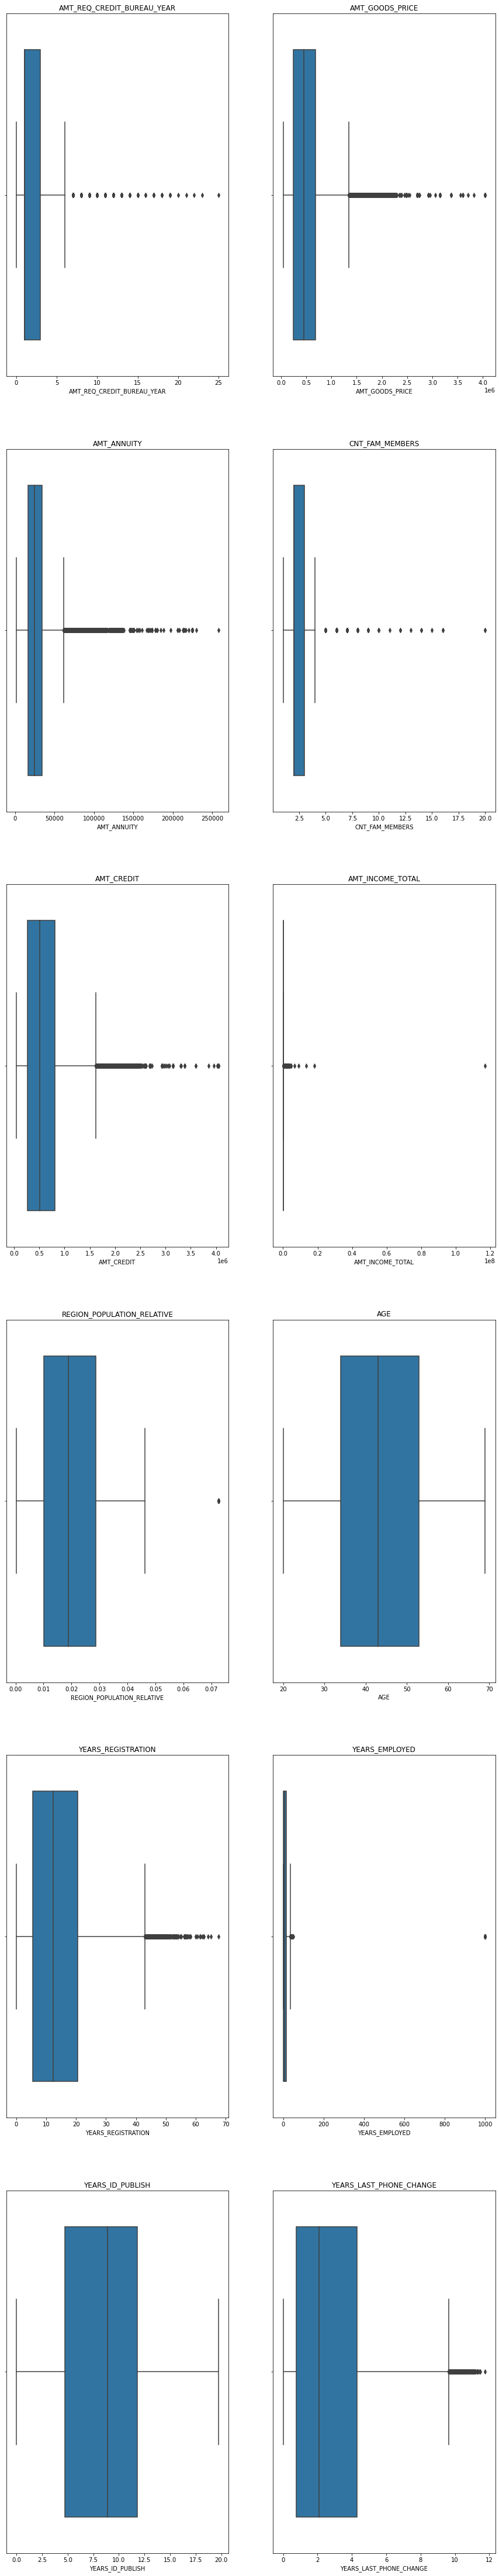

In [41]:
cat_plot_box(app,a_float_cl,2,15,80)

In [42]:
a_float_cl

['AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'AGE',
 'YEARS_REGISTRATION',
 'YEARS_EMPLOYED',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE']

In [43]:
app[a_float_cl].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AGE,YEARS_REGISTRATION,YEARS_EMPLOYED,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
count,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000
mean,1.7784632094,538316.2943667056,27108.4878410854,2.1526644575,599025.9997057016,168797.9192969845,0.0208681121,43.4359681442,13.6606036371,185.5472387645,8.2032941733,2.6379674490
std,1.7655231477,369288.9822456501,14493.4610654910,0.9106786909,402490.7769959460,237123.1462788365,0.0138312801,11.9545929273,9.6517433451,382.0376761799,4.1354806000,2.2652252768
min,0.0000000000,40500.0000000000,1615.5000000000,1.0000000000,45000.0000000000,25650.0000000000,0.0002900000,20.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,1.0000000000,238500.0000000000,16524.0000000000,2.0000000000,270000.0000000000,112500.0000000000,0.0100060000,34.0000000000,5.5068493151,2.5561643836,4.7123287671,0.7506849315
50%,1.0000000000,450000.0000000000,24903.0000000000,2.0000000000,513531.0000000000,147150.0000000000,0.0188500000,43.0000000000,12.3397260274,6.0794520548,8.9150684932,2.0739726027
75%,3.0000000000,679500.0000000000,34596.0000000000,3.0000000000,808650.0000000000,202500.0000000000,0.0286630000,53.0000000000,20.4917808219,15.6356164384,11.7780821918,4.3013698630
max,25.0000000000,4050000.0000000000,258025.5000000000,20.0000000000,4050000.0000000000,117000000.0000000000,0.0725080000,69.0000000000,67.5945205479,1000.6657534247,19.7178082192,11.7589041096


In [44]:
app[a_int_cl].describe()

,CNT_CHILDREN,TARGET,HOUR_APPR_PROCESS_START,SK_ID_CURR
count,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000
mean,0.4170517477,0.0807288195,12.0634188696,278180.5185765713
std,0.7221213844,0.2724186456,3.2658322554,102790.1753484237
min,0.0000000000,0.0000000000,0.0000000000,100002.0000000000
25%,0.0000000000,0.0000000000,10.0000000000,189145.5000000000
50%,0.0000000000,0.0000000000,12.0000000000,278202.0000000000
75%,1.0000000000,0.0000000000,14.0000000000,367142.5000000000
max,19.0000000000,1.0000000000,23.0000000000,456255.0000000000


In [45]:
app[app.YEARS_EMPLOYED>70]

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR,AGE,YEARS_REGISTRATION,YEARS_EMPLOYED,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
8,Unknown Occupation,1.0000000000,Children,913500.0000000000,33826.5000000000,2.0000000000,0,Cash loans,F,N,...,House / apartment,Married,Secondary / secondary special,Pensioner,100011,55.0000000000,20.3479452055,1000.6657534247,9.6273972603,0.0000000000
11,Unknown Occupation,2.0000000000,Children,135000.0000000000,10678.5000000000,2.0000000000,0,Cash loans,F,N,...,House / apartment,Married,Secondary / secondary special,Pensioner,100015,55.0000000000,14.3726027397,1000.6657534247,6.8821917808,6.5643835616
23,Unknown Occupation,3.0000000000,Unaccompanied,225000.0000000000,23850.0000000000,2.0000000000,0,Cash loans,F,N,...,House / apartment,Married,Secondary / secondary special,Pensioner,100027,68.0000000000,24.6904109589,1000.6657534247,10.0931506849,2.1780821918
38,Unknown Occupation,2.0000000000,Unaccompanied,225000.0000000000,17338.5000000000,2.0000000000,0,Cash loans,F,N,...,House / apartment,Married,Secondary / secondary special,Pensioner,100045,65.0000000000,26.8958904110,1000.6657534247,13.6136986301,0.0000000000
43,Unknown Occupation,3.0000000000,Unaccompanied,675000.0000000000,42970.5000000000,1.0000000000,0,Cash loans,F,N,...,House / apartment,Single / not married,Higher education,Pensioner,100050,64.0000000000,15.7397260274,1000.6657534247,12.5369863014,1.3452054795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,Unknown Occupation,0.0000000000,Unaccompanied,607500.0000000000,29943.0000000000,1.0000000000,0,Cash loans,F,N,...,House / apartment,Single / not married,Secondary / secondary special,Pensioner,456209,61.0000000000,32.8109589041,1000.6657534247,11.4273972603,4.5671232877
307483,Unknown Occupation,5.0000000000,Unaccompanied,225000.0000000000,16479.0000000000,1.0000000000,0,Cash loans,F,N,...,House / apartment,Separated,Secondary / secondary special,Pensioner,456227,68.0000000000,30.7150684932,1000.6657534247,11.5424657534,4.8630136986
307487,Unknown Occupation,8.0000000000,Unaccompanied,936000.0000000000,31473.0000000000,2.0000000000,0,Cash loans,M,N,...,House / apartment,Married,Secondary / secondary special,Pensioner,456231,63.0000000000,15.0273972603,1000.6657534247,11.2739726027,2.3178082192
307505,Unknown Occupation,0.0000000000,Unaccompanied,225000.0000000000,22050.0000000000,1.0000000000,0,Cash loans,F,N,...,House / apartment,Single / not married,Secondary / secondary special,Pensioner,456249,66.0000000000,20.1890410959,1000.6657534247,6.4575342466,0.0000000000


In [46]:
app[app.REGION_POPULATION_RELATIVE > 0.05]

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR,AGE,YEARS_REGISTRATION,YEARS_EMPLOYED,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
65,Core staff,8.0000000000,Unaccompanied,900000.0000000000,40657.5000000000,1.0000000000,0,Cash loans,M,N,...,House / apartment,Single / not married,Secondary / secondary special,Commercial associate,100077,33.0000000000,16.7260273973,1.5863013699,0.0027397260,0.8082191781
86,High skill tech staff,1.0000000000,Unaccompanied,283500.0000000000,22072.5000000000,1.0000000000,0,Cash loans,F,Y,...,House / apartment,Single / not married,Higher education,State servant,100101,49.0000000000,20.3315068493,2.6547945205,4.6054794521,4.3424657534
105,Unknown Occupation,8.0000000000,Unaccompanied,396000.0000000000,28647.0000000000,1.0000000000,0,Cash loans,M,N,...,House / apartment,Widow,Secondary / secondary special,Pensioner,100124,65.0000000000,19.2876712329,1000.6657534247,11.1041095890,2.9589041096
111,Realty agents,4.0000000000,Unaccompanied,720000.0000000000,45625.5000000000,1.0000000000,0,Cash loans,F,N,...,House / apartment,Single / not married,Secondary / secondary special,Commercial associate,100131,37.0000000000,21.7890410959,3.2027397260,13.1561643836,2.0109589041
188,Drivers,2.0000000000,Unaccompanied,765000.0000000000,49050.0000000000,1.0000000000,0,Cash loans,M,Y,...,House / apartment,Single / not married,Higher education,Commercial associate,100218,36.0000000000,20.0493150685,0.6164383562,12.0465753425,1.0465753425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307216,Unknown Occupation,1.0000000000,Unaccompanied,1525500.0000000000,50386.5000000000,2.0000000000,0,Cash loans,F,Y,...,House / apartment,Married,Secondary / secondary special,Pensioner,455924,51.0000000000,2.1863013699,1000.6657534247,0.1315068493,5.6328767123
307392,Unknown Occupation,0.0000000000,Unaccompanied,1305000.0000000000,77809.5000000000,2.0000000000,0,Cash loans,F,N,...,House / apartment,Married,Secondary / secondary special,Pensioner,456125,59.0000000000,12.9178082192,1000.6657534247,12.4493150685,4.0301369863
307440,Managers,1.0000000000,Unaccompanied,661500.0000000000,45751.5000000000,2.0000000000,0,Cash loans,F,N,...,House / apartment,Married,Higher education,Commercial associate,456178,49.0000000000,8.6191780822,5.1671232877,4.1972602740,1.1123287671
307486,Unknown Occupation,1.0000000000,Unaccompanied,270000.0000000000,18283.5000000000,3.0000000000,1,Cash loans,F,Y,...,House / apartment,Civil marriage,Higher education,Commercial associate,456230,43.0000000000,13.7917808219,3.2465753425,12.0328767123,0.0000000000


In [47]:
app[((app.AMT_INCOME_TOTAL > 5000000) * (app.OCCUPATION_TYPE == 'Laborers'))]

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR,AGE,YEARS_REGISTRATION,YEARS_EMPLOYED,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
12840,Laborers,1.0000000000,Unaccompanied,454500.0000000000,26194.5000000000,3.0000000000,1,Cash loans,F,N,...,House / apartment,Married,Secondary / secondary special,Working,114967,34.0000000000,18.5260273973,2.5260273973,9.9808219178,0.0000000000
131127,Laborers,4.0000000000,Unaccompanied,675000.0000000000,52978.5000000000,2.0000000000,0,Cash loans,M,Y,...,House / apartment,Married,Higher education,Working,252084,52.0000000000,20.3123287671,1.2136986301,7.9068493151,1.9041095890


In [48]:
app[app.AMT_INCOME_TOTAL > 5000000]

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR,AGE,YEARS_REGISTRATION,YEARS_EMPLOYED,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
12840,Laborers,1.0000000000,Unaccompanied,454500.0000000000,26194.5000000000,3.0000000000,1,Cash loans,F,N,...,House / apartment,Married,Secondary / secondary special,Working,114967,34.0000000000,18.5260273973,2.5260273973,9.9808219178,0.0000000000
77768,Managers,0.0000000000,Unaccompanied,1377000.0000000000,132601.5000000000,2.0000000000,0,Cash loans,F,Y,...,House / apartment,Civil marriage,Higher education,Working,190160,45.0000000000,19.9342465753,23.2219178082,4.5369863014,0.0082191781
131127,Laborers,4.0000000000,Unaccompanied,675000.0000000000,52978.5000000000,2.0000000000,0,Cash loans,M,Y,...,House / apartment,Married,Higher education,Working,252084,52.0000000000,20.3123287671,1.2136986301,7.9068493151,1.9041095890
203693,Unknown Occupation,1.0000000000,Unaccompanied,675000.0000000000,69295.5000000000,4.0000000000,2,Cash loans,M,Y,...,House / apartment,Married,Secondary / secondary special,Commercial associate,336147,43.0000000000,9.1452054795,13.5917808219,12.9534246575,3.1041095890
246858,Unknown Occupation,1.0000000000,Unaccompanied,1368000.0000000000,130945.5000000000,2.0000000000,0,Cash loans,M,Y,...,House / apartment,Married,Higher education,Commercial associate,385674,37.0000000000,10.8301369863,0.7671232877,13.6219178082,0.0356164384


In [49]:
app.AMT_ANNUITY.describe()

count   307511.0000000000
mean     27108.4878410854
std      14493.4610654910
min       1615.5000000000
25%      16524.0000000000
50%      24903.0000000000
75%      34596.0000000000
max     258025.5000000000
Name: AMT_ANNUITY, dtype: float64

In [50]:
app[app.AMT_ANNUITY>100000][['AMT_ANNUITY','AMT_INCOME_TOTAL']]

,AMT_ANNUITY,AMT_INCOME_TOTAL
485,116266.5000000000,450000.0000000000
1446,116505.0000000000,360000.0000000000
1530,107356.5000000000,337500.0000000000
1969,102658.5000000000,270000.0000000000
2513,135936.0000000000,292500.0000000000
...,...,...
301712,216589.5000000000,427500.0000000000
303825,111730.5000000000,540000.0000000000
304129,109728.0000000000,450000.0000000000
305671,112779.0000000000,225000.0000000000


In [51]:
app[app.AMT_ANNUITY > app.AMT_INCOME_TOTAL]

,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR,AGE,YEARS_REGISTRATION,YEARS_EMPLOYED,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
678,Unknown Occupation,1.0000000000,Unaccompanied,1885500.0000000000,74191.5000000000,2.0000000000,0,Cash loans,F,N,...,House / apartment,Married,Secondary / secondary special,Pensioner,100784,60.0000000000,39.0849315068,1000.6657534247,12.9150684932,4.6109589041
20727,Unknown Occupation,1.0000000000,Unaccompanied,2173500.0000000000,48118.5000000000,2.0000000000,0,Cash loans,F,Y,...,House / apartment,Civil marriage,Secondary / secondary special,Pensioner,124157,58.0000000000,4.5726027397,1000.6657534247,13.5945205479,1.8547945205
25802,Unknown Occupation,1.0000000000,Unaccompanied,900000.0000000000,52452.0000000000,2.0000000000,0,Cash loans,F,N,...,House / apartment,Married,Secondary / secondary special,Pensioner,129999,55.0000000000,11.9506849315,1000.6657534247,6.6219178082,0.0000000000
35791,Unknown Occupation,2.0000000000,Unaccompanied,1980000.0000000000,58567.5000000000,2.0000000000,0,Cash loans,F,Y,...,House / apartment,Married,Secondary / secondary special,Pensioner,141454,61.0000000000,33.3260273973,1000.6657534247,14.5890410959,3.0849315068
49185,Unknown Occupation,1.0000000000,Unaccompanied,675000.0000000000,36927.0000000000,2.0000000000,0,Cash loans,F,Y,...,House / apartment,Married,Secondary / secondary special,Pensioner,156942,50.0000000000,27.4630136986,1000.6657534247,4.9095890411,2.0493150685
58379,Laborers,2.0000000000,Unaccompanied,1575000.0000000000,60079.5000000000,2.0000000000,0,Cash loans,F,Y,...,House / apartment,Married,Secondary / secondary special,Working,167672,26.0000000000,10.8547945205,2.6904109589,3.4712328767,2.9972602740
64338,Unknown Occupation,2.0000000000,Unaccompanied,1350000.0000000000,64260.0000000000,2.0000000000,0,Cash loans,F,N,...,House / apartment,Married,Higher education,Pensioner,174612,56.0000000000,26.6931506849,1000.6657534247,4.9945205479,0.0000000000
68803,Unknown Occupation,0.0000000000,Unaccompanied,675000.0000000000,32125.5000000000,2.0000000000,0,Cash loans,F,N,...,House / apartment,Married,Secondary / secondary special,Working,179800,51.0000000000,7.1534246575,10.9726027397,5.6904109589,4.7178082192
95599,Unknown Occupation,1.0000000000,Unaccompanied,1800000.0000000000,82152.0000000000,2.0000000000,0,Cash loans,M,Y,...,House / apartment,Married,Secondary / secondary special,Pensioner,210988,58.0000000000,2.8356164384,1000.6657534247,4.8630136986,0.0000000000
112431,Unknown Occupation,0.0000000000,Unaccompanied,454500.0000000000,44635.5000000000,2.0000000000,0,Cash loans,F,N,...,House / apartment,Married,Secondary / secondary special,Pensioner,230424,63.0000000000,41.9452054795,1000.6657534247,13.6328767123,5.8767123288


In [52]:
app[(app.AMT_ANNUITY>app.AMT_ANNUITY.quantile(.99))*(app.OCCUPATION_TYPE=='Laborers')][['TARGET', 'AMT_ANNUITY','AMT_INCOME_TOTAL']]

,TARGET,AMT_ANNUITY,AMT_INCOME_TOTAL
525,0,72778.5000000000,229500.0000000000
875,0,84694.5000000000,112500.0000000000
2240,0,72607.5000000000,351000.0000000000
2942,0,71374.5000000000,135000.0000000000
3214,0,93928.5000000000,405000.0000000000
...,...,...,...
299067,0,72477.0000000000,382500.0000000000
303320,0,82377.0000000000,382500.0000000000
303862,0,96480.0000000000,360000.0000000000
305671,0,112779.0000000000,225000.0000000000


In [53]:
app.AMT_ANNUITY.max()

258025.5

In [54]:
app[(app.AMT_ANNUITY>app.AMT_ANNUITY.quantile(.99))].shape[0]/app.shape[0]

0.009983382708260843

In [55]:
app[app.YEARS_EMPLOYED>80]['NAME_INCOME_TYPE']

8         Pensioner
11        Pensioner
23        Pensioner
38        Pensioner
43        Pensioner
            ...    
307469    Pensioner
307483    Pensioner
307487    Pensioner
307505    Pensioner
307507    Pensioner
Name: NAME_INCOME_TYPE, Length: 55374, dtype: object

In [56]:
app[a_int_cl].describe()

,CNT_CHILDREN,TARGET,HOUR_APPR_PROCESS_START,SK_ID_CURR
count,307511.0000000000,307511.0000000000,307511.0000000000,307511.0000000000
mean,0.4170517477,0.0807288195,12.0634188696,278180.5185765713
std,0.7221213844,0.2724186456,3.2658322554,102790.1753484237
min,0.0000000000,0.0000000000,0.0000000000,100002.0000000000
25%,0.0000000000,0.0000000000,10.0000000000,189145.5000000000
50%,0.0000000000,0.0000000000,12.0000000000,278202.0000000000
75%,1.0000000000,0.0000000000,14.0000000000,367142.5000000000
max,19.0000000000,1.0000000000,23.0000000000,456255.0000000000


### Outlier decisions
Looking at the Boxplots of all the float columns, we can see that apart from 'AGE', 'YEARS_ID_PUBLISH' all other columns have outliers. Lets see how we can deal with them -
#### 'AMT_REQ_CREDIT_BUREAU_YEAR' - IMPUTE using IQR
The difference from 75% is too much. These outliers will influence the analysis. 
Deleting them would be wrong, we can impute these outliers with the ceiling value using IQR 
 
#### 'AMT_GOODS_PRICE', - KEEP
There are high priced good that will have similar high annuity and corrosponding AMT_CREDIT. We can assume they are not outliers and keep them
 
 
#### 'AMT_ANNUITY', - IMPUTE using IQR
The difference from 75% is too much. These outliers will influence the analysis. 
Deleting them would be wrong, we can impute these outliers with the ceiling value using IQR 


#### 'CNT_FAM_MEMBERS', - KEEP
20 family members are possible so we keep these values
 
#### 'AMT_CREDIT', - KEEP
AMT_CREDIT is greater than the Income so these are not outliers they will stay. Also AMT_CREDIT corresponds to AMT_GOODS_PRICE as well.

#### 'AMT_INCOME_TOTAL', - DELETE ROWS , Then IMPUTE using IQR
By digging deep we see that two of the outliers are labourers which is highly unlikey. This is a case of missing value and not outliers. There are just two rows so we can just remove them.
 
#### 'REGION_POPULATION_RELATIVE', - KEEP
The description says this is a normalized column so the very few outliers that can actually be very popukated regions. We can keep them

#### 'YEARS_REGISTRATION', - KEEP
The assumption here registration is assumed to be Documentation the client. A lot of outliers are clustered together. 
These will not influence the analysis and these are possible values as the client can actually change his registration 67 years ago. We keep cn them

#### 'YEARS_EMPLOYED', - IMPUTE using IQR
All these are pentioners who have made a mistake in entering their age. We can just impute this value with the ceiling value which will be the correct assumption of pentioners
 
 
#### 'YEARS_LAST_PHONE_CHANGE' - IMPUTE using IQR
People could buy a phone 10 years ago and still using it. We can just impute these outliers with the ceiling value using IQR. All the carefull phone users will be bunched together

#### 'CNT_CHILDREN' 
People having 19 children is unrealistic, even if true, this needs to be treated as an outlier. We can impute them with IQR

### Lets start with all that have to be imputed using IQR

In [57]:
app=app[~((app.AMT_INCOME_TOTAL > app.AMT_INCOME_TOTAL.quantile(0.99)) * (app.OCCUPATION_TYPE == 'Laborers'))]

IQR= ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY','YEARS_LAST_PHONE_CHANGE','YEARS_EMPLOYED','CNT_CHILDREN','AMT_INCOME_TOTAL']

### Handling of outliers
 
The outliers in these colums will spoil the analysis and are rare cases. Their impact will be as much as can be handled by the upper and lower limits. Therefore these will be handled by flooring & capping. 



We have a custom function written for handling of outliers by flooring and capping-
It takes columns as input and imputes the outliers of the column.

In [58]:
def clean_outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR=q3-q1
    ul = q3+1.5*IQR
    ll = q1-1.5*IQR
    x[x>ul]=ul
    x[x<ll]=ll 

In [59]:
for k in IQR:
    clean_outliers(app[k])

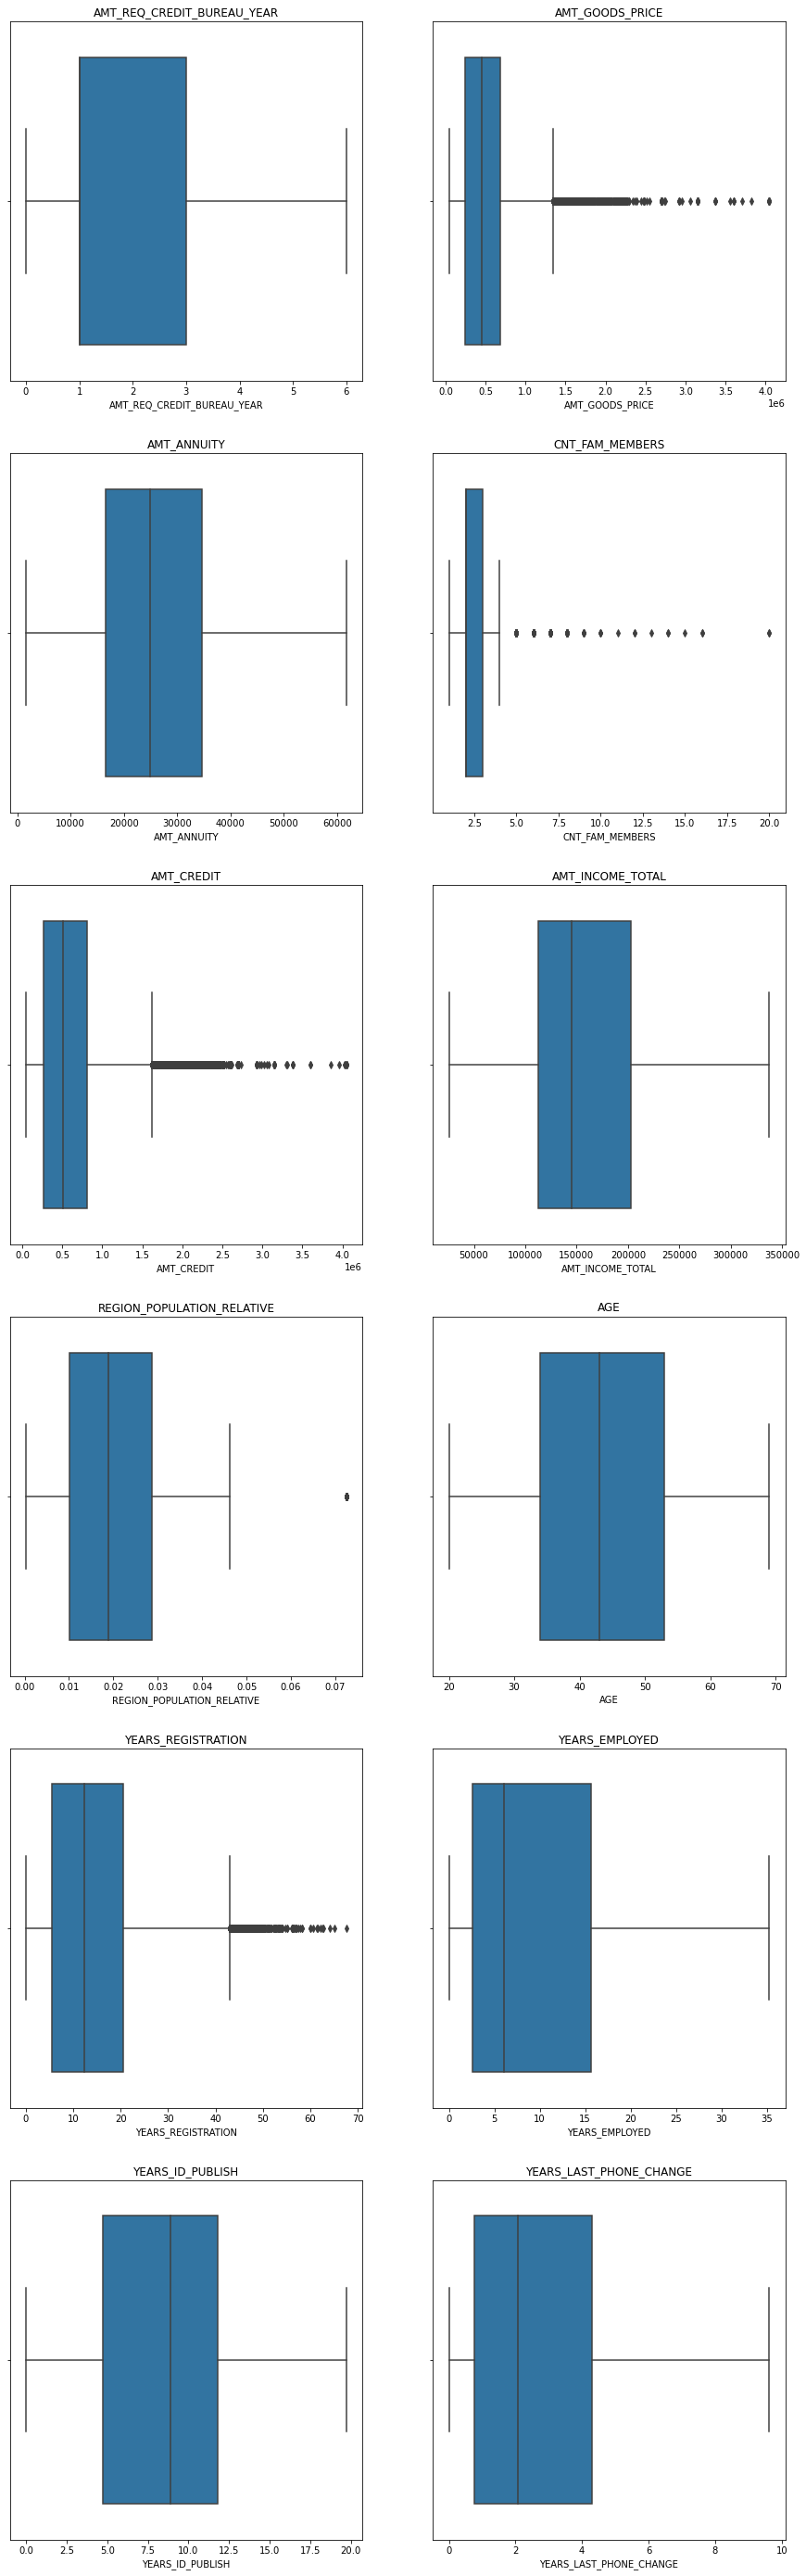

In [60]:
cat_plot_box(app,a_float_cl,2,15,50)

In [61]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307336 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OCCUPATION_TYPE             307336 non-null  object 
 1   AMT_REQ_CREDIT_BUREAU_YEAR  307336 non-null  float64
 2   NAME_TYPE_SUITE             307336 non-null  object 
 3   AMT_GOODS_PRICE             307336 non-null  float64
 4   AMT_ANNUITY                 307336 non-null  float64
 5   CNT_FAM_MEMBERS             307336 non-null  float64
 6   CNT_CHILDREN                307336 non-null  float64
 7   NAME_CONTRACT_TYPE          307336 non-null  object 
 8   CODE_GENDER                 307336 non-null  object 
 9   FLAG_OWN_CAR                307336 non-null  object 
 10  FLAG_OWN_REALTY             307336 non-null  object 
 11  AMT_CREDIT                  307336 non-null  float64
 12  AMT_INCOME_TOTAL            307336 non-null  float64
 13  TARGET        

In [62]:
app.AGE

0        25.0000000000
1        45.0000000000
2        52.0000000000
3        52.0000000000
4        54.0000000000
              ...     
307506   25.0000000000
307507   56.0000000000
307508   41.0000000000
307509   32.0000000000
307510   46.0000000000
Name: AGE, Length: 307336, dtype: float64



### Binning columns

After looking at the data, these columns have 0 as a huge percentage of it's values and the spread of data is a little skewed. It is better to make them categorical and use binning to get better insights from the data

'AGE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL'

In [63]:
def autobins(x,bins):
    m=x.max()
    i=int(m/(bins))
    l=len(str(i))
    v=10**(l-1)
    e=i%v
    first_i=i+(v-e)
    intervals=[]
    n=0
    for j in range(bins+1):
        n=first_i*j
        intervals.append(n)
    intervals[-1]=intervals[-1]+v
    intervals[0]=intervals[0]-1
    lbl=[]
    for i in range(len(intervals)-1):
        a=str(intervals[i])+' to '+str(intervals[i+1])
        lbl.append(a)
    
    return intervals,lbl;
    

In [64]:
bincol=['AGE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']
newCols=['AGE_GROUP', 'AMT_GOODS_PRICE_BIN', 'AMT_ANNUITY_BIN','AMT_CREDITI_BIN','AMT_INCOME_TOTAL_BIN']

for i in range(len(bincol)):
    app[newCols[i]]=pd.cut(app[bincol[i]],autobins(app[bincol[i]],8)[0], labels=autobins(app[bincol[i]],8)[1])

### Reassigning lists with column names of different data type for better analysis

In [65]:
a_float_cl = list(app.select_dtypes(include ='float').columns)
a_object_cl = list(app.select_dtypes(include =['object','category']).columns)
#a_category_cl = list(app.select_dtypes(include ='category').columns)
a_int_cl = list(app.select_dtypes(include ='int').columns)

In [66]:
app.isna().sum().sort_values(ascending=False)

OCCUPATION_TYPE               0
REGION_POPULATION_RELATIVE    0
AMT_CREDITI_BIN               0
AMT_ANNUITY_BIN               0
AMT_GOODS_PRICE_BIN           0
AGE_GROUP                     0
YEARS_LAST_PHONE_CHANGE       0
YEARS_ID_PUBLISH              0
YEARS_EMPLOYED                0
YEARS_REGISTRATION            0
AGE                           0
SK_ID_CURR                    0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
ORGANIZATION_TYPE             0
AMT_REQ_CREDIT_BUREAU_YEAR    0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
TARGET                        0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
FLAG_OWN_REALTY               0
FLAG_OWN_CAR                  0
CODE_GENDER                   0
NAME_CONTRACT_TYPE            0
CNT_CHILDREN                  0
CNT_FAM_MEMBERS               0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYP

## Reading File 2 - previous_application.csv

'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer

In [67]:
papp = pd.read_csv("previous_application.csv")
papp.shape

(1670214, 37)

In [68]:
papp.isna().sum().sort_values(ascending=False).head(50)/papp.shape[0] * 100

RATE_INTEREST_PRIVILEGED      99.6436983524
RATE_INTEREST_PRIMARY         99.6436983524
AMT_DOWN_PAYMENT              53.6364801157
RATE_DOWN_PAYMENT             53.6364801157
NAME_TYPE_SUITE               49.1197535166
NFLAG_INSURED_ON_APPROVAL     40.2981294613
DAYS_TERMINATION              40.2981294613
DAYS_LAST_DUE                 40.2981294613
DAYS_LAST_DUE_1ST_VERSION     40.2981294613
DAYS_FIRST_DUE                40.2981294613
DAYS_FIRST_DRAWING            40.2981294613
AMT_GOODS_PRICE               23.0817727549
AMT_ANNUITY                   22.2866650621
CNT_PAYMENT                   22.2863656992
PRODUCT_COMBINATION            0.0207159083
AMT_CREDIT                     0.0000598726
NAME_YIELD_GROUP               0.0000000000
NAME_PORTFOLIO                 0.0000000000
NAME_SELLER_INDUSTRY           0.0000000000
SELLERPLACE_AREA               0.0000000000
CHANNEL_TYPE                   0.0000000000
NAME_PRODUCT_TYPE              0.0000000000
SK_ID_PREV                     0

In [69]:
papp.head(50)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300000000,17145.0000000000,17145.0000000000,0.0000000000,17145.0000000000,SATURDAY,15,...,Connectivity,12.0000000000,middle,POS mobile with interest,365243.0000000000,-42.0000000000,300.0000000000,-42.0000000000,-37.0000000000,0.0000000000
1,2802425,108129,Cash loans,25188.6150000000,607500.0000000000,679671.0000000000,NaN,607500.0000000000,THURSDAY,11,...,XNA,36.0000000000,low_action,Cash X-Sell: low,365243.0000000000,-134.0000000000,916.0000000000,365243.0000000000,365243.0000000000,1.0000000000
2,2523466,122040,Cash loans,15060.7350000000,112500.0000000000,136444.5000000000,NaN,112500.0000000000,TUESDAY,11,...,XNA,12.0000000000,high,Cash X-Sell: high,365243.0000000000,-271.0000000000,59.0000000000,365243.0000000000,365243.0000000000,1.0000000000
3,2819243,176158,Cash loans,47041.3350000000,450000.0000000000,470790.0000000000,NaN,450000.0000000000,MONDAY,7,...,XNA,12.0000000000,middle,Cash X-Sell: middle,365243.0000000000,-482.0000000000,-152.0000000000,-182.0000000000,-177.0000000000,1.0000000000
4,1784265,202054,Cash loans,31924.3950000000,337500.0000000000,404055.0000000000,NaN,337500.0000000000,THURSDAY,9,...,XNA,24.0000000000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.9300000000,315000.0000000000,340573.5000000000,NaN,315000.0000000000,SATURDAY,8,...,XNA,18.0000000000,low_normal,Cash X-Sell: low,365243.0000000000,-654.0000000000,-144.0000000000,-144.0000000000,-137.0000000000,1.0000000000
6,2315218,175704,Cash loans,NaN,0.0000000000,0.0000000000,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0000000000,0.0000000000,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0000000000,0.0000000000,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0000000000,0.0000000000,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


### Replacing different types of null with np.nan
We have assumed that 'XNA', 'XNP' and -1 are actully missing/null values. We have to replace them with np.nan to avoid calculation errors

In [70]:
papp.replace('XNA',np.nan, inplace=True)
papp.replace(-1,np.nan, inplace=True)
papp.replace('XAP',np.nan, inplace=True)

In [71]:
papp.isna().sum().sort_values(ascending=False).head(50)/papp.shape[0] * 100

RATE_INTEREST_PRIVILEGED      99.6436983524
RATE_INTEREST_PRIMARY         99.6436983524
NAME_CASH_LOAN_PURPOSE        95.8307737811
CODE_REJECT_REASON            81.3271233507
NAME_PRODUCT_TYPE             63.6844140930
NAME_GOODS_CATEGORY           56.9273757734
RATE_DOWN_PAYMENT             53.6364801157
AMT_DOWN_PAYMENT              53.6364801157
NAME_SELLER_INDUSTRY          51.2341532283
NAME_TYPE_SUITE               49.1197535166
SELLERPLACE_AREA              45.6633102105
DAYS_LAST_DUE_1ST_VERSION     40.3385434441
DAYS_FIRST_DRAWING            40.2981294613
DAYS_FIRST_DUE                40.2981294613
DAYS_LAST_DUE                 40.2981294613
DAYS_TERMINATION              40.2981294613
NFLAG_INSURED_ON_APPROVAL     40.2981294613
NAME_PAYMENT_TYPE             37.5630907177
NAME_YIELD_GROUP              30.9669898588
AMT_GOODS_PRICE               23.0817727549
AMT_ANNUITY                   22.2866650621
NAME_PORTFOLIO                22.2863656992
CNT_PAYMENT                   22

### Remove Nulls
Like for the previous dataset, we will remove the columns that have more than 40% of null values

In [72]:
temp=papp.isna().sum().sort_values(ascending=False)/papp.shape[0] * 100

In [73]:
papp_acc_cols=list(temp[temp<40.00].index)
len(papp_acc_cols)

20

In [74]:
papp=papp[papp_acc_cols]
papp.shape

(1670214, 20)

In [75]:
papp.isna().sum().sort_values(ascending=False)/papp.shape[0] * 100

NAME_PAYMENT_TYPE             37.5630907177
NAME_YIELD_GROUP              30.9669898588
AMT_GOODS_PRICE               23.0817727549
AMT_ANNUITY                   22.2866650621
NAME_PORTFOLIO                22.2863656992
CNT_PAYMENT                   22.2863656992
NAME_CLIENT_TYPE               0.1162126530
PRODUCT_COMBINATION            0.0207159083
NAME_CONTRACT_TYPE             0.0207159083
DAYS_DECISION                  0.0001197451
AMT_CREDIT                     0.0000598726
SK_ID_CURR                     0.0000000000
AMT_APPLICATION                0.0000000000
WEEKDAY_APPR_PROCESS_START     0.0000000000
HOUR_APPR_PROCESS_START        0.0000000000
CHANNEL_TYPE                   0.0000000000
FLAG_LAST_APPL_PER_CONTRACT    0.0000000000
NFLAG_LAST_APPL_IN_DAY         0.0000000000
NAME_CONTRACT_STATUS           0.0000000000
SK_ID_PREV                     0.0000000000
dtype: float64

In [76]:
papp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   NAME_PAYMENT_TYPE            1042830 non-null  object 
 1   NAME_YIELD_GROUP             1152999 non-null  object 
 2   AMT_GOODS_PRICE              1284699 non-null  float64
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   NAME_PORTFOLIO               1297984 non-null  object 
 5   CNT_PAYMENT                  1297984 non-null  float64
 6   NAME_CLIENT_TYPE             1668273 non-null  object 
 7   PRODUCT_COMBINATION          1669868 non-null  object 
 8   NAME_CONTRACT_TYPE           1669868 non-null  object 
 9   DAYS_DECISION                1670212 non-null  float64
 10  AMT_CREDIT                   1670213 non-null  float64
 11  SK_ID_CURR                   1670214 non-null  int64  
 12  AMT_APPLICATION              1670214 non-n

### Identifying the column names based on Dtype

In [77]:
p_float_cl = list(papp.select_dtypes(include ='float').columns)
p_object_cl = list(papp.select_dtypes(include ='object').columns)
#p_category_cl = list(papp.select_dtypes(include ='category').columns)
p_int_cl = list(papp.select_dtypes(include ='int').columns)

In [78]:
papp[p_int_cl].head(20)

,SK_ID_CURR,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,SK_ID_PREV
0,271877,15,1,2030495
1,108129,11,1,2802425
2,122040,11,1,2523466
3,176158,7,1,2819243
4,202054,9,1,1784265
5,199383,8,1,1383531
6,175704,11,1,2315218
7,296299,7,1,1656711
8,342292,15,1,2367563
9,334349,15,1,2579447


In [79]:
papp[p_int_cl].isna().sum().sort_values(ascending=True)

SK_ID_CURR                 0
HOUR_APPR_PROCESS_START    0
NFLAG_LAST_APPL_IN_DAY     0
SK_ID_PREV                 0
dtype: int64

In [80]:
papp[p_object_cl].head(20)

,NAME_PAYMENT_TYPE,NAME_YIELD_GROUP,NAME_PORTFOLIO,NAME_CLIENT_TYPE,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,CHANNEL_TYPE,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS
0,Cash through the bank,middle,POS,Repeater,POS mobile with interest,Consumer loans,SATURDAY,Country-wide,Y,Approved
1,NaN,low_action,Cash,Repeater,Cash X-Sell: low,Cash loans,THURSDAY,Contact center,Y,Approved
2,Cash through the bank,high,Cash,Repeater,Cash X-Sell: high,Cash loans,TUESDAY,Credit and cash offices,Y,Approved
3,Cash through the bank,middle,Cash,Repeater,Cash X-Sell: middle,Cash loans,MONDAY,Credit and cash offices,Y,Approved
4,Cash through the bank,high,Cash,Repeater,Cash Street: high,Cash loans,THURSDAY,Credit and cash offices,Y,Refused
5,Cash through the bank,low_normal,Cash,Repeater,Cash X-Sell: low,Cash loans,SATURDAY,Credit and cash offices,Y,Approved
6,NaN,NaN,NaN,Repeater,Cash,Cash loans,TUESDAY,Credit and cash offices,Y,Canceled
7,NaN,NaN,NaN,Repeater,Cash,Cash loans,MONDAY,Credit and cash offices,Y,Canceled
8,NaN,NaN,NaN,Repeater,Cash,Cash loans,MONDAY,Credit and cash offices,Y,Canceled
9,NaN,NaN,NaN,Repeater,Cash,Cash loans,SATURDAY,Credit and cash offices,Y,Canceled


In [81]:
papp[p_object_cl].isna().sum().sort_values(ascending=False)/papp.shape[0]*100

NAME_PAYMENT_TYPE             37.5630907177
NAME_YIELD_GROUP              30.9669898588
NAME_PORTFOLIO                22.2863656992
NAME_CLIENT_TYPE               0.1162126530
PRODUCT_COMBINATION            0.0207159083
NAME_CONTRACT_TYPE             0.0207159083
WEEKDAY_APPR_PROCESS_START     0.0000000000
CHANNEL_TYPE                   0.0000000000
FLAG_LAST_APPL_PER_CONTRACT    0.0000000000
NAME_CONTRACT_STATUS           0.0000000000
dtype: float64

In [82]:
papp[p_float_cl].head(20)

,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,DAYS_DECISION,AMT_CREDIT,AMT_APPLICATION
0,17145.0000000000,1730.4300000000,12.0000000000,-73.0000000000,17145.0000000000,17145.0000000000
1,607500.0000000000,25188.6150000000,36.0000000000,-164.0000000000,679671.0000000000,607500.0000000000
2,112500.0000000000,15060.7350000000,12.0000000000,-301.0000000000,136444.5000000000,112500.0000000000
3,450000.0000000000,47041.3350000000,12.0000000000,-512.0000000000,470790.0000000000,450000.0000000000
4,337500.0000000000,31924.3950000000,24.0000000000,-781.0000000000,404055.0000000000,337500.0000000000
5,315000.0000000000,23703.9300000000,18.0000000000,-684.0000000000,340573.5000000000,315000.0000000000
6,NaN,NaN,NaN,-14.0000000000,0.0000000000,0.0000000000
7,NaN,NaN,NaN,-21.0000000000,0.0000000000,0.0000000000
8,NaN,NaN,NaN,-386.0000000000,0.0000000000,0.0000000000
9,NaN,NaN,NaN,-57.0000000000,0.0000000000,0.0000000000


In [83]:
papp[p_int_cl].head(20)

,SK_ID_CURR,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,SK_ID_PREV
0,271877,15,1,2030495
1,108129,11,1,2802425
2,122040,11,1,2523466
3,176158,7,1,2819243
4,202054,9,1,1784265
5,199383,8,1,1383531
6,175704,11,1,2315218
7,296299,7,1,1656711
8,342292,15,1,2367563
9,334349,15,1,2579447


In [84]:
papp[p_int_cl].isna().sum().sort_values(ascending=False)

SK_ID_CURR                 0
HOUR_APPR_PROCESS_START    0
NFLAG_LAST_APPL_IN_DAY     0
SK_ID_PREV                 0
dtype: int64

#### Fixing the DAYS_DECISION column as it has all negative values

In [85]:
papp['DAYS_DECISION']=papp.DAYS_DECISION.abs()

In [86]:
papp[p_float_cl].isna().sum()/papp.shape[0] * 100

AMT_GOODS_PRICE   23.0817727549
AMT_ANNUITY       22.2866650621
CNT_PAYMENT       22.2863656992
DAYS_DECISION      0.0001197451
AMT_CREDIT         0.0000598726
AMT_APPLICATION    0.0000000000
dtype: float64

We will ignore the null/missing values for the the top 3 columns as imputation will influence the calculation . We will impute DAYS_DECISION and AMT_CREDIT with median

In [87]:
papp.DAYS_DECISION.fillna(papp.DAYS_DECISION.median(),inplace=True)
papp.AMT_CREDIT.fillna(papp.AMT_CREDIT.median(),inplace=True)

### Cleaning the categorical columns

In [88]:
papp[p_object_cl].isna().sum()/papp.shape[0]*100

NAME_PAYMENT_TYPE             37.5630907177
NAME_YIELD_GROUP              30.9669898588
NAME_PORTFOLIO                22.2863656992
NAME_CLIENT_TYPE               0.1162126530
PRODUCT_COMBINATION            0.0207159083
NAME_CONTRACT_TYPE             0.0207159083
WEEKDAY_APPR_PROCESS_START     0.0000000000
CHANNEL_TYPE                   0.0000000000
FLAG_LAST_APPL_PER_CONTRACT    0.0000000000
NAME_CONTRACT_STATUS           0.0000000000
dtype: float64

We will ignore the null/missing values for the the top 3 columns as imputation will influence the calculation . We will impute the rest with mode

In [89]:
papp.NAME_PAYMENT_TYPE.fillna('Unkown Type',inplace=True)
papp.NAME_YIELD_GROUP.fillna('Unkown Group',inplace=True)
papp.NAME_PORTFOLIO.fillna('Unkown Portfolio',inplace=True)

In [90]:
papp[p_object_cl].isna().sum().sort_values(ascending=False)/papp.shape[0]

NAME_CLIENT_TYPE              0.0011621265
PRODUCT_COMBINATION           0.0002071591
NAME_CONTRACT_TYPE            0.0002071591
NAME_PAYMENT_TYPE             0.0000000000
NAME_YIELD_GROUP              0.0000000000
NAME_PORTFOLIO                0.0000000000
WEEKDAY_APPR_PROCESS_START    0.0000000000
CHANNEL_TYPE                  0.0000000000
FLAG_LAST_APPL_PER_CONTRACT   0.0000000000
NAME_CONTRACT_STATUS          0.0000000000
dtype: float64

In [91]:
for i in p_object_cl:
    papp[i].fillna(papp[i].mode()[0],inplace=True)

In [92]:
papp.isna().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
NAME_PAYMENT_TYPE                   0
AMT_APPLICATION                     0
NAME_CONTRACT_STATUS                0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
CHANNEL_TYPE                        0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_CREDIT                          0
SK_ID_CURR                          0
NAME_YIELD_GROUP                    0
DAYS_DECISION                       0
NAME_CONTRACT_TYPE                  0
PRODUCT_COMBINATION                 0
NAME_CLIENT_TYPE                    0
NAME_PORTFOLIO                      0
SK_ID_PREV                          0
dtype: int64

### Drop NA rows
We will drop the rows that have na in 'AMT_GOODS_PRICE', 'AMT_ANNUITY','CNT_PAYMENT' as they are important values

In [93]:
papp=papp.dropna()

In [94]:
papp.isna().sum().sort_values(ascending=False)

NAME_PAYMENT_TYPE              0
NAME_YIELD_GROUP               0
NAME_CONTRACT_STATUS           0
NFLAG_LAST_APPL_IN_DAY         0
FLAG_LAST_APPL_PER_CONTRACT    0
CHANNEL_TYPE                   0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
AMT_APPLICATION                0
SK_ID_CURR                     0
AMT_CREDIT                     0
DAYS_DECISION                  0
NAME_CONTRACT_TYPE             0
PRODUCT_COMBINATION            0
NAME_CLIENT_TYPE               0
CNT_PAYMENT                    0
NAME_PORTFOLIO                 0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
SK_ID_PREV                     0
dtype: int64

### Outlier Handling

For the outliers in the numerical columns we will be using flooring and capping like we did for the previous file using the custom function that we have create. Based on prior experience, we will remove out liers by imputing them with IQR

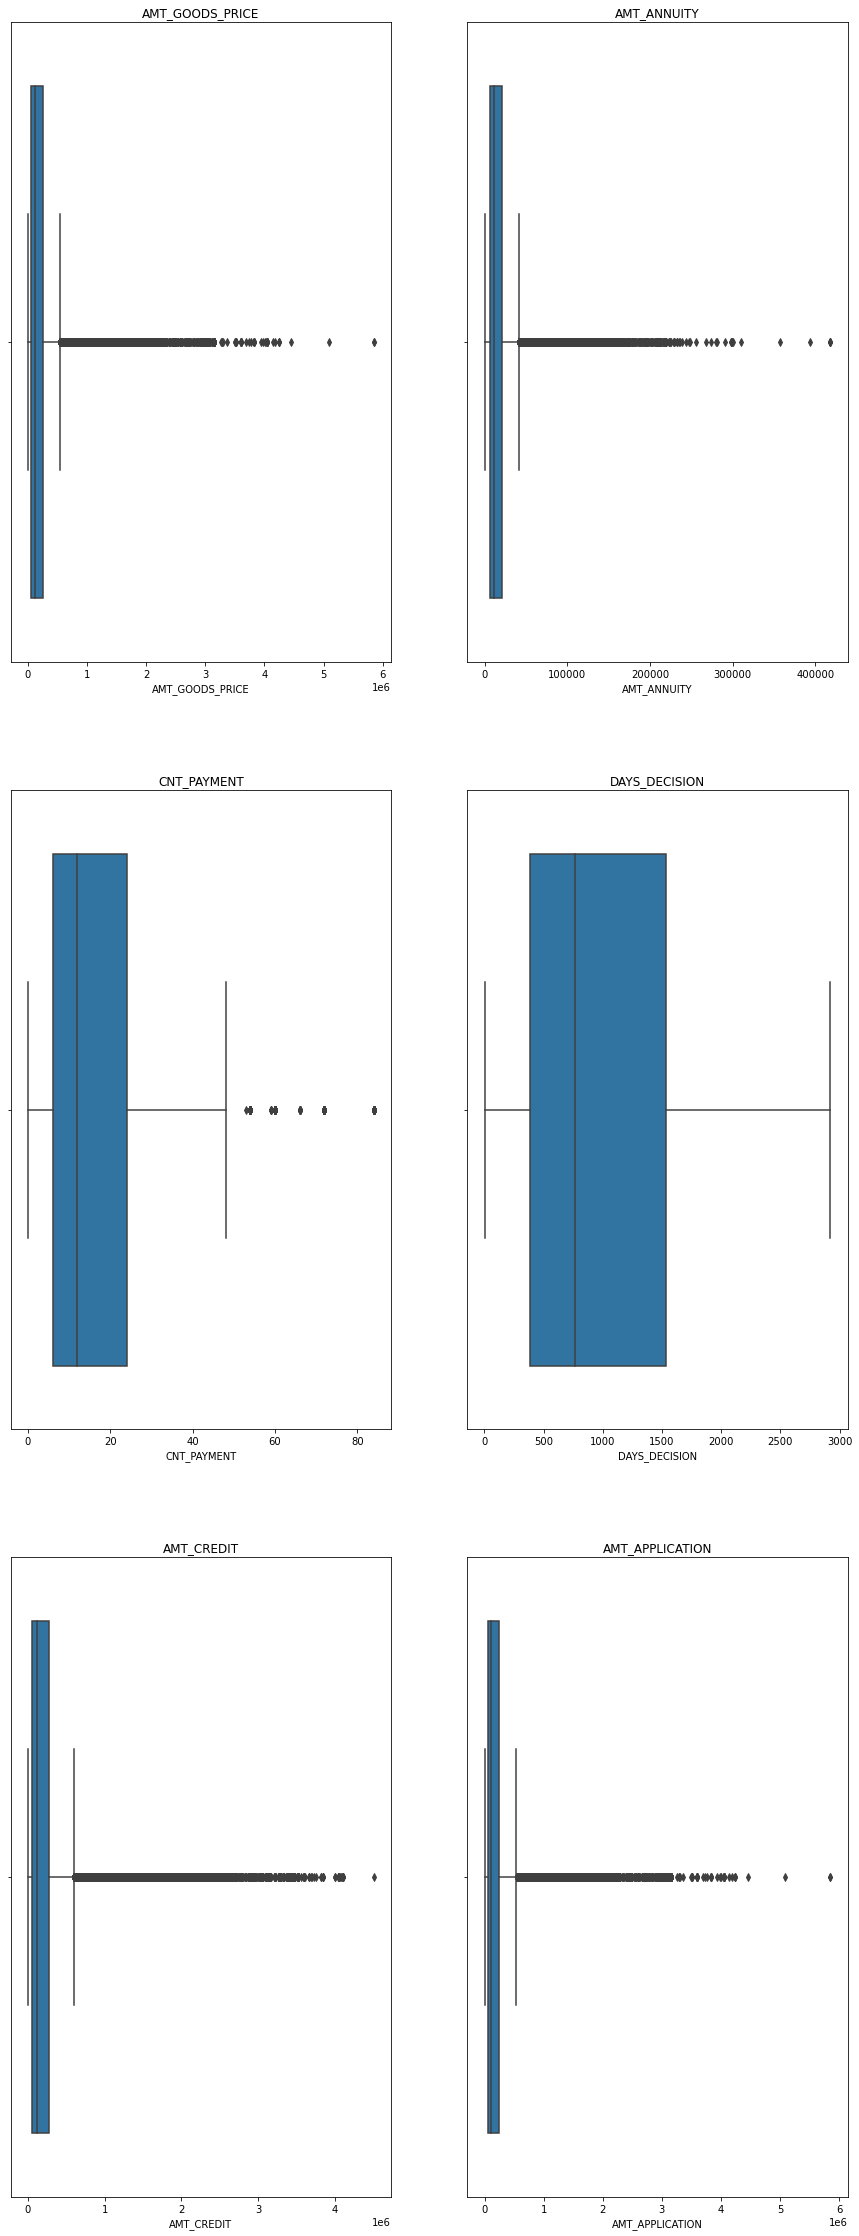

In [95]:
cat_plot_box(papp,p_float_cl,2,15,40)

In [96]:
for i in p_float_cl:
    clean_outliers(papp[i])

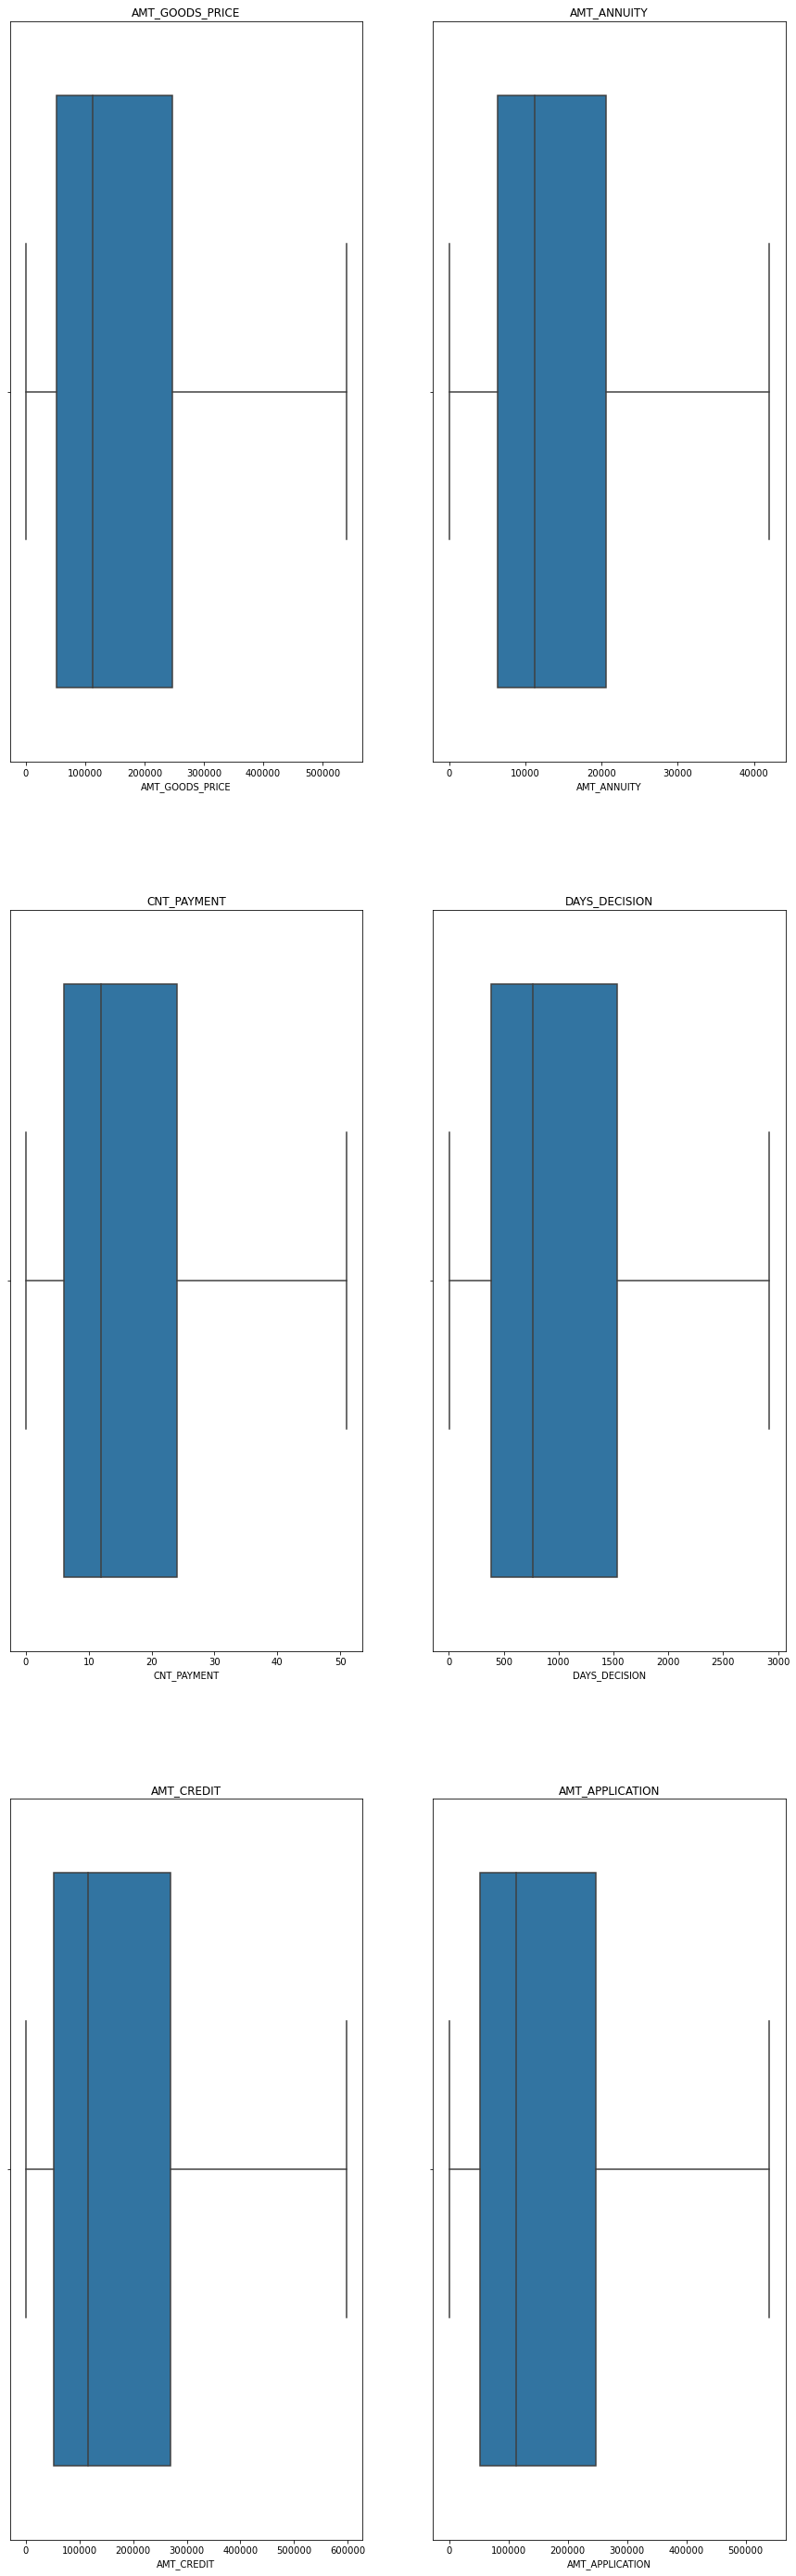

In [97]:
cat_plot_box(papp,p_float_cl,2,15,50)



### Binning columns

After looking at the data, these columns have 0 as a huge percentage of it's values and the spread of data is a little skewed. It is better to make them categorical and use binning to get better insights from the data

'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_APPLICATION'

In [98]:
pbincol=['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_APPLICATION']
pnewCols=['AMT_GOODS_PRICE_BIN', 'AMT_ANNUITY_BIN', 'AMT_CREDIT_BIN', 'AMT_APPLICATION_BIN']

for i in range(len(pbincol)):
    papp[pnewCols[i]]=pd.cut(papp[pbincol[i]],autobins(papp[pbincol[i]],8)[0], labels=autobins(papp[pbincol[i]],8)[1])

In [99]:
papp[pnewCols]

,AMT_GOODS_PRICE_BIN,AMT_ANNUITY_BIN,AMT_CREDIT_BIN,AMT_APPLICATION_BIN
0,-1 to 70000,-1 to 6000,-1 to 80000,-1 to 70000
1,490000 to 570000,24000 to 30000,560000 to 650000,490000 to 570000
2,70000 to 140000,12000 to 18000,80000 to 160000,70000 to 140000
3,420000 to 490000,42000 to 49000,400000 to 480000,420000 to 490000
4,280000 to 350000,30000 to 36000,400000 to 480000,280000 to 350000
...,...,...,...,...
1670209,210000 to 280000,12000 to 18000,240000 to 320000,210000 to 280000
1670210,70000 to 140000,6000 to 12000,-1 to 80000,70000 to 140000
1670211,70000 to 140000,6000 to 12000,80000 to 160000,70000 to 140000
1670212,140000 to 210000,18000 to 24000,160000 to 240000,140000 to 210000


In [100]:
common_cols = list(np.intersect1d(app.columns, papp.columns))

In [101]:
common_cols

['AMT_ANNUITY',
 'AMT_ANNUITY_BIN',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_GOODS_PRICE_BIN',
 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'SK_ID_CURR',
 'WEEKDAY_APPR_PROCESS_START']

In [102]:
capp = app.merge(papp, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [103]:
ca_float_cl = list(capp.select_dtypes(include ='float').columns)
ca_object_cl = list(capp.select_dtypes(include =['object','category']).columns)
ca_binned_cl = list(capp.select_dtypes(include ='category').columns)
ca_int_cl = list(capp.select_dtypes(include ='int').columns)

# DATA ANALYSIS

### Analysisng Data Imbalance

<AxesSubplot:xlabel='TARGET', ylabel='count'>

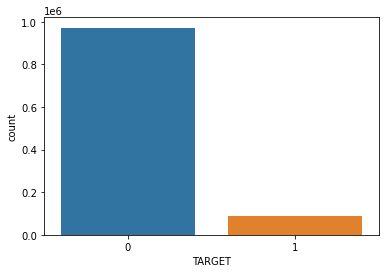

In [104]:
sns.countplot(capp['TARGET'])

In [105]:
app.TARGET.value_counts(normalize=True)*100

0   91.9277273082
1    8.0722726918
Name: TARGET, dtype: float64

#### As we can see almost 92% of the data is filled with customers who pay on time and only 8% is of customers that are defaulters

### Splitting Data
Splitting app and cpp into Defaulters and OnTime customers

In [106]:
Defaulters=capp[capp.TARGET == 1]
Defaulters.shape

(88624, 56)

In [107]:
OnTime=capp[capp.TARGET == 0]
OnTime.shape

(971924, 56)

In [108]:
DefaultersA=app[capp.TARGET == 1]
DefaultersA.shape

(25626, 33)

In [109]:
OnTimeA=app[capp.TARGET == 0]
OnTimeA.shape

(281710, 33)

### Univariate Analysis

#### Analysis of Numerical columns begins

In [110]:
ca_float_cl

['AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_GOODS_PRICE_x',
 'AMT_ANNUITY_x',
 'CNT_FAM_MEMBERS',
 'CNT_CHILDREN',
 'AMT_CREDIT_x',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'AGE',
 'YEARS_REGISTRATION',
 'YEARS_EMPLOYED',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_GOODS_PRICE_y',
 'AMT_ANNUITY_y',
 'CNT_PAYMENT',
 'DAYS_DECISION',
 'AMT_CREDIT_y',
 'AMT_APPLICATION']

In [111]:
def cat_plot_box_target(df,x,ncol,fw,fh):
    a=len(x)
    if a%2==0:
        nrows=int((a/ncol))
    else:
        nrows=int((a/ncol)+1)
    v=[]
    for i in range(nrows):
        for j in range(ncol):
            v.append((i,j))
    fig, axis = plt.subplots(nrows, ncol, figsize=(fw, fh))
    for i in range(a):
        sns.boxplot(data=df,ax=axis[v[i]], x='TARGET', y=x[i])
        axis[v[i]].set_title(x[i])

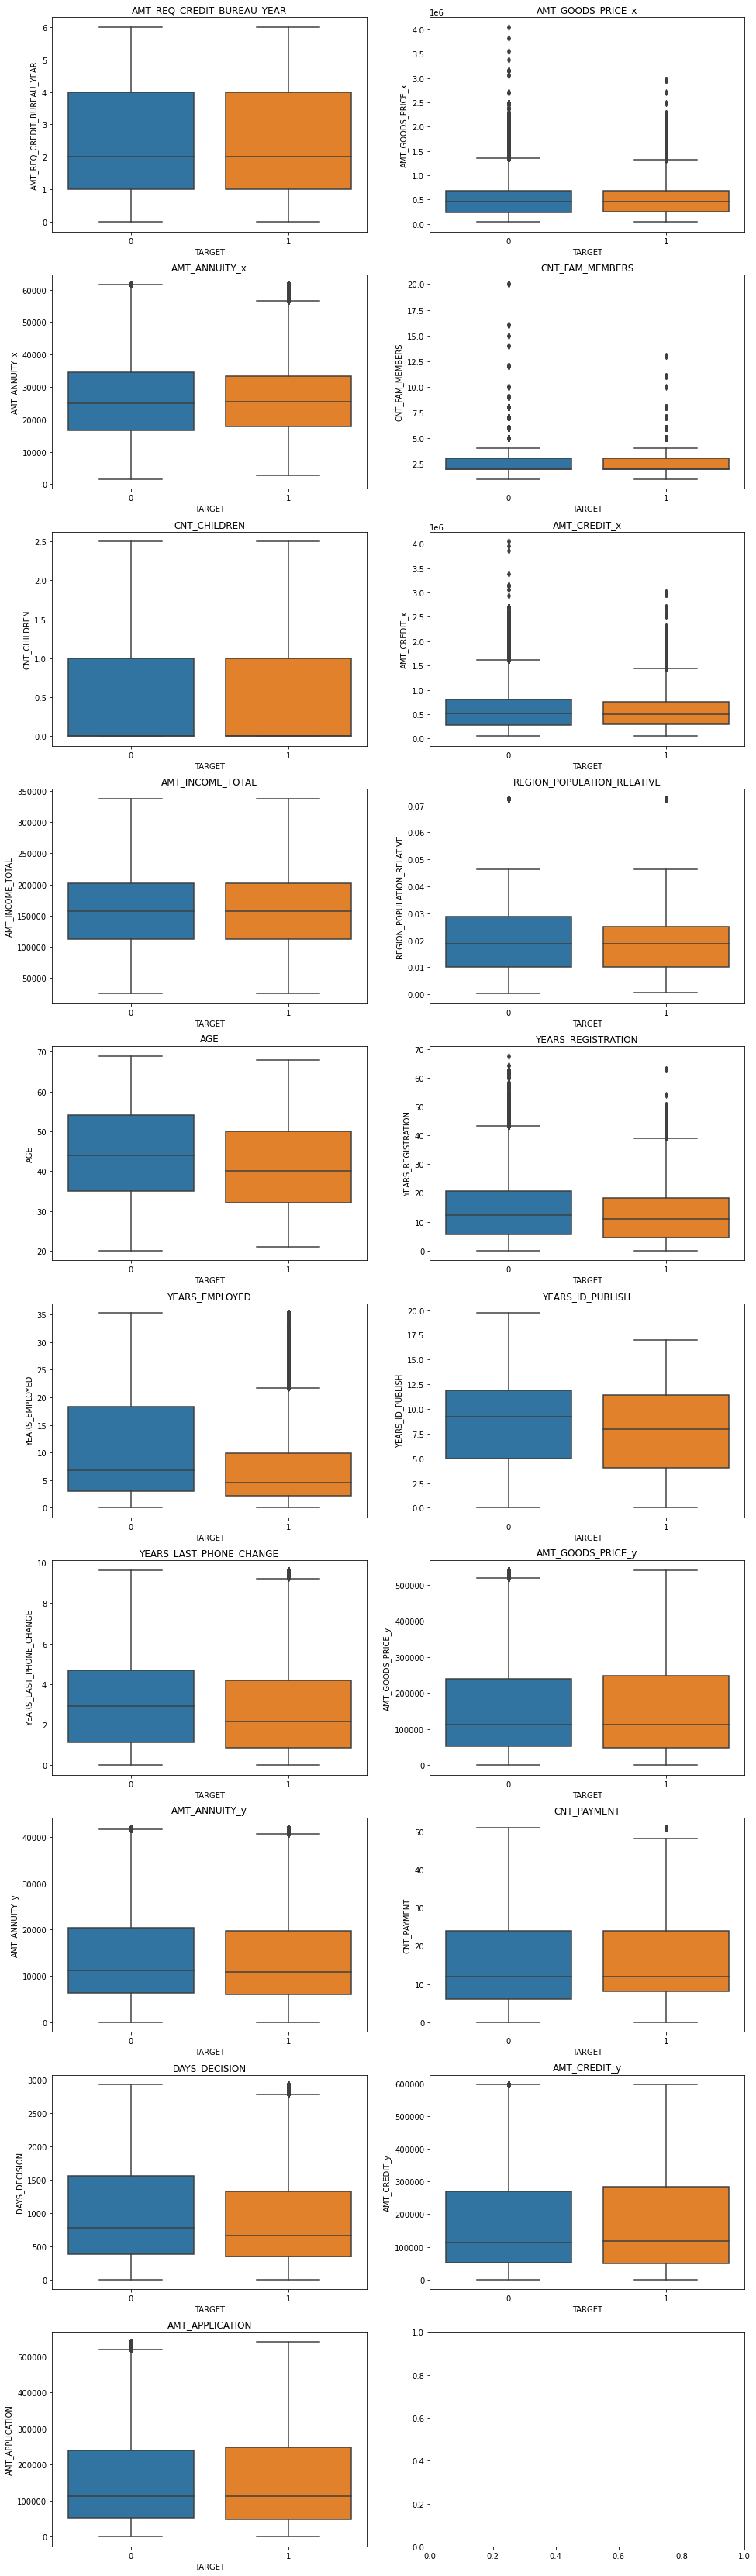

In [112]:
cat_plot_box_target(capp,ca_float_cl,2,16,60)

In [113]:
def p75(x):
    return np.quantile(x,0.75)

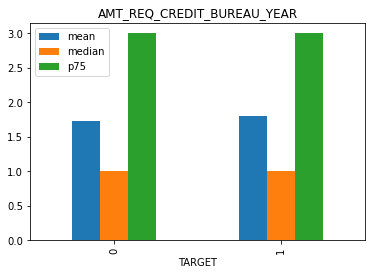

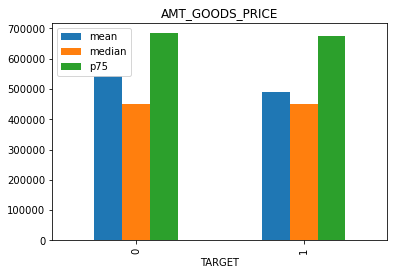

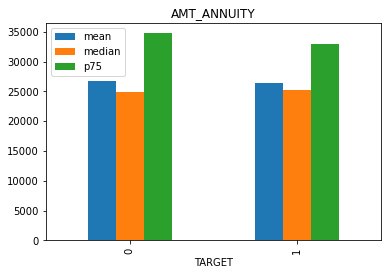

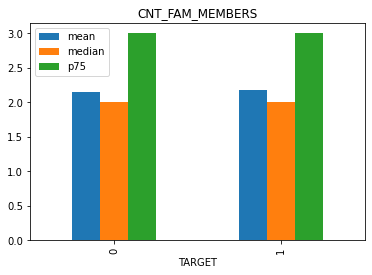

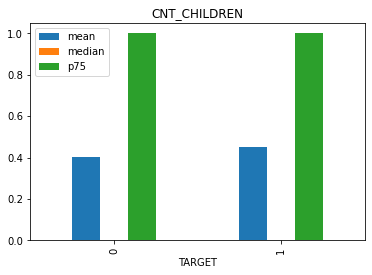

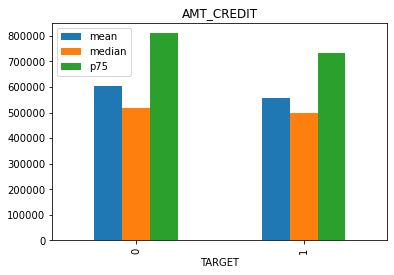

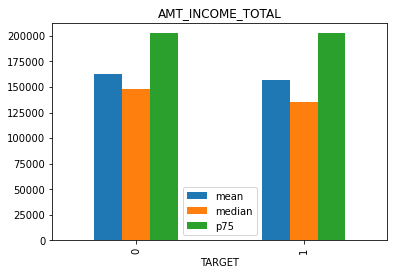

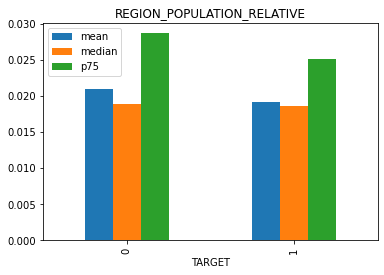

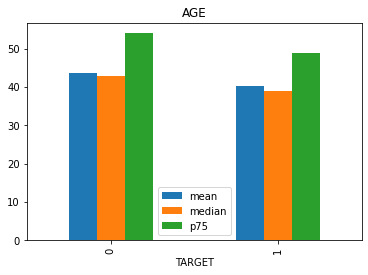

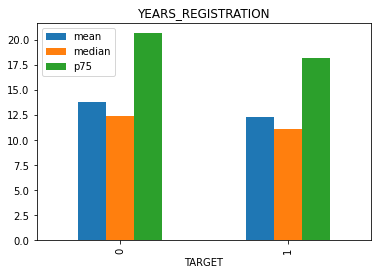

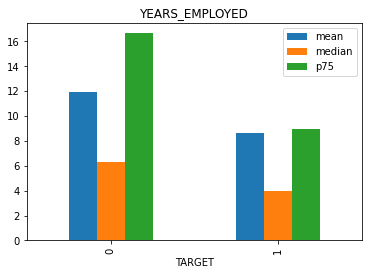

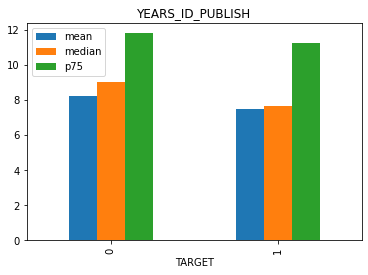

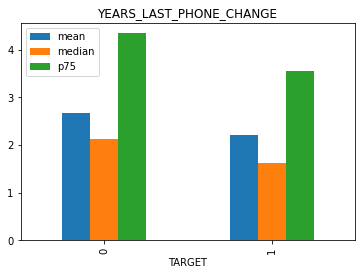

In [114]:
for i in a_float_cl:
    app.groupby('TARGET')[i].aggregate(['mean','median', p75]).plot.bar()
    plt.title(i)

### Conclusion
The category that is actually showing a huge variation in defaulters and non defaulters is 'YEARS_LAST_PHONE_CHANGE', 'YEARS_EMPLOYED'
The lesser the job experience, more are the defaults.

#### Function to plot Displots

In [115]:
def displot_All(df0, df1, cols):
    for i in cols:
        plt.figure(figsize = [20,8])
        sns.distplot(df1[i], label = 'Payment difficulties', hist=False)
        sns.distplot(df0[i], label = 'On-Time Payments', hist=False)
        plt.ticklabel_format(style='plain', axis='x')
        plt.xticks(rotation = 45)
        plt.legend()
        plt.show()

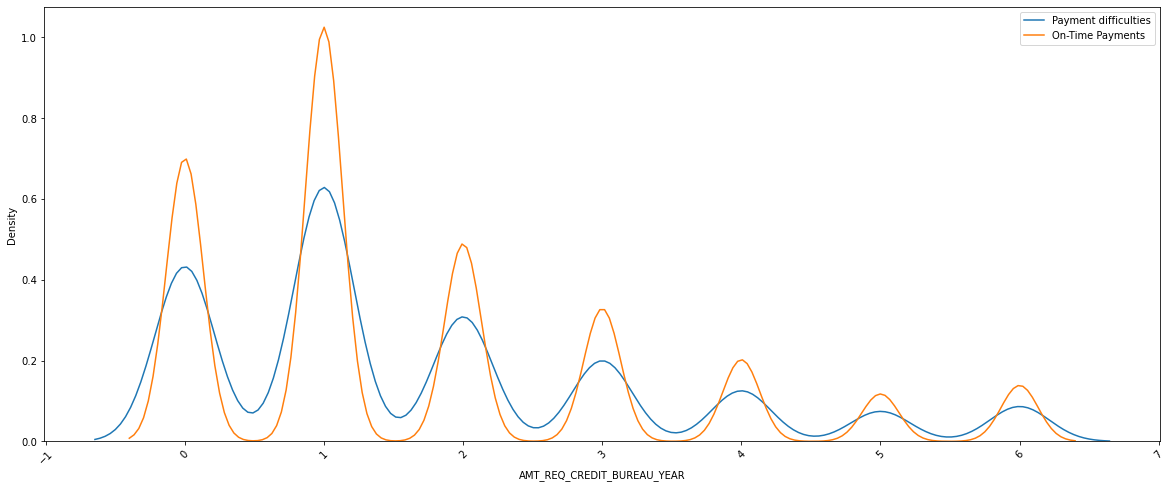

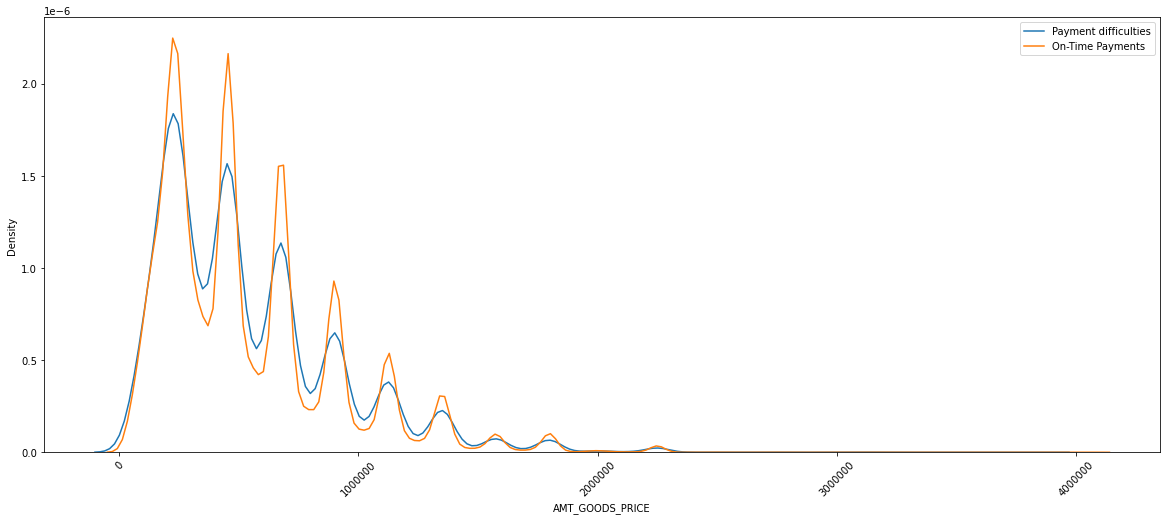

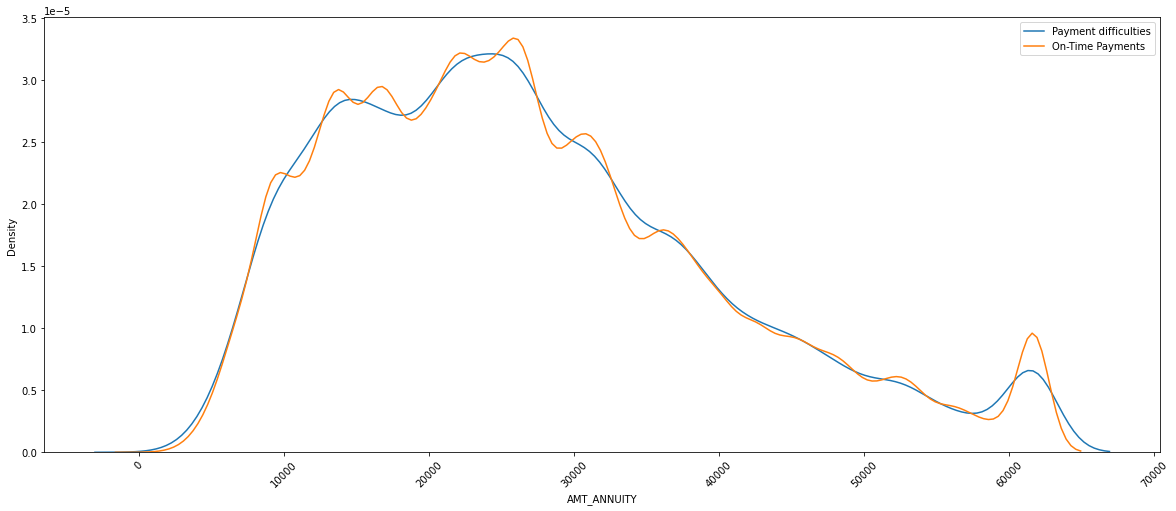

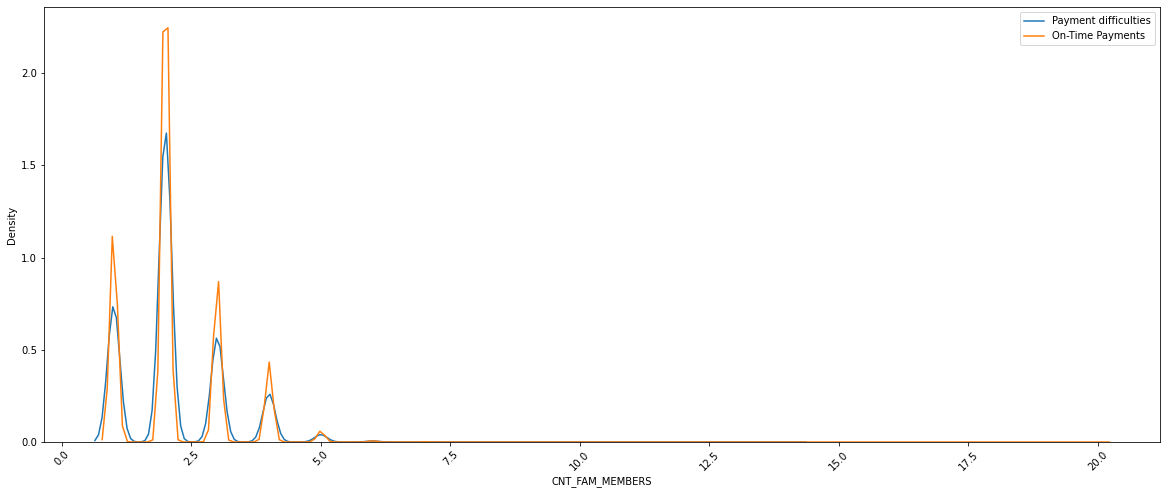

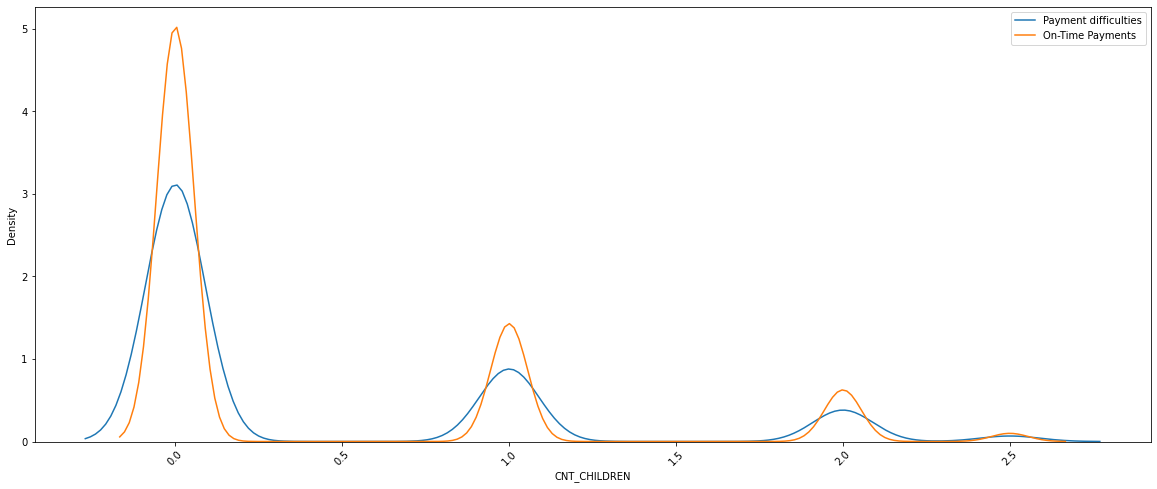

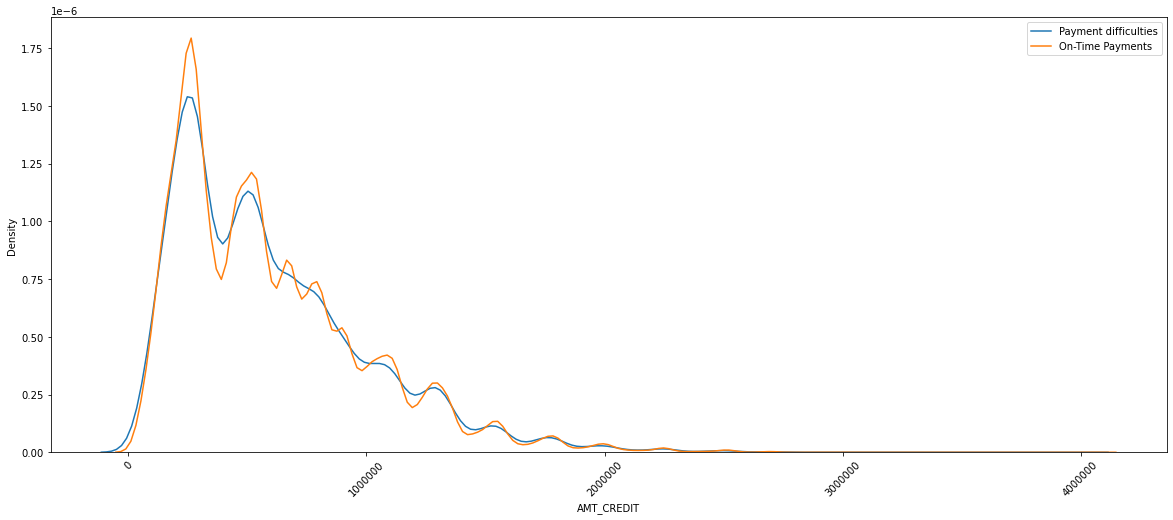

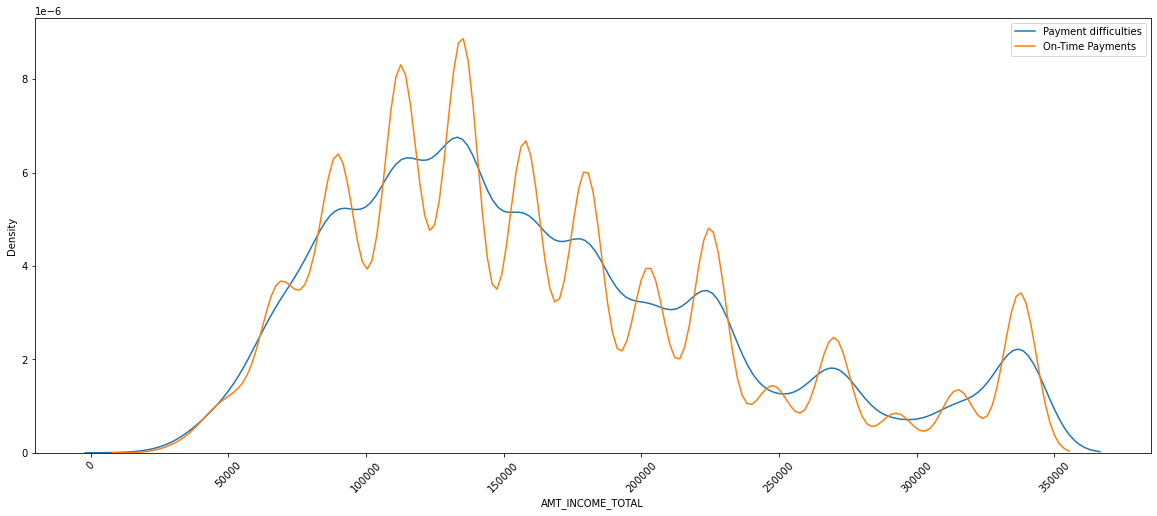

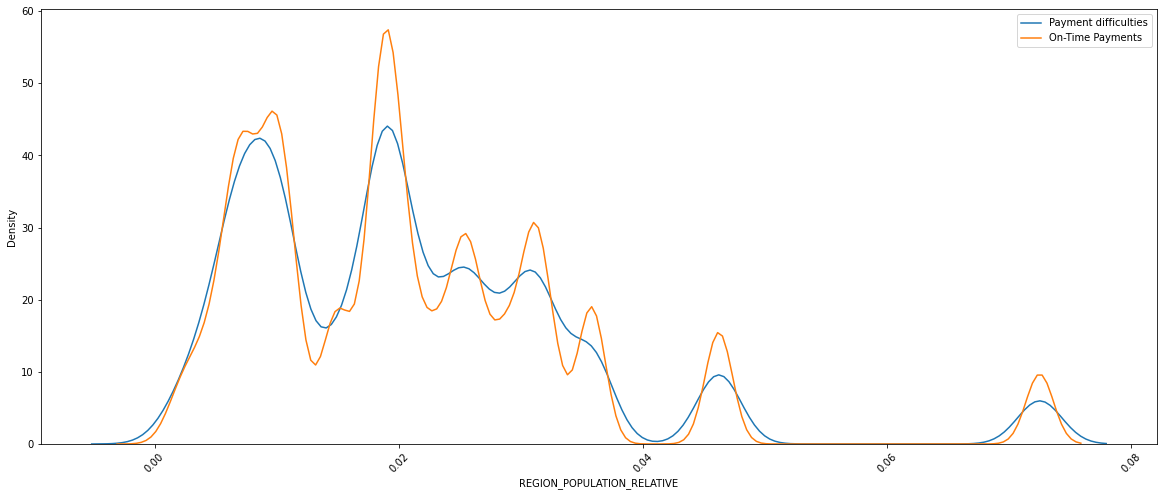

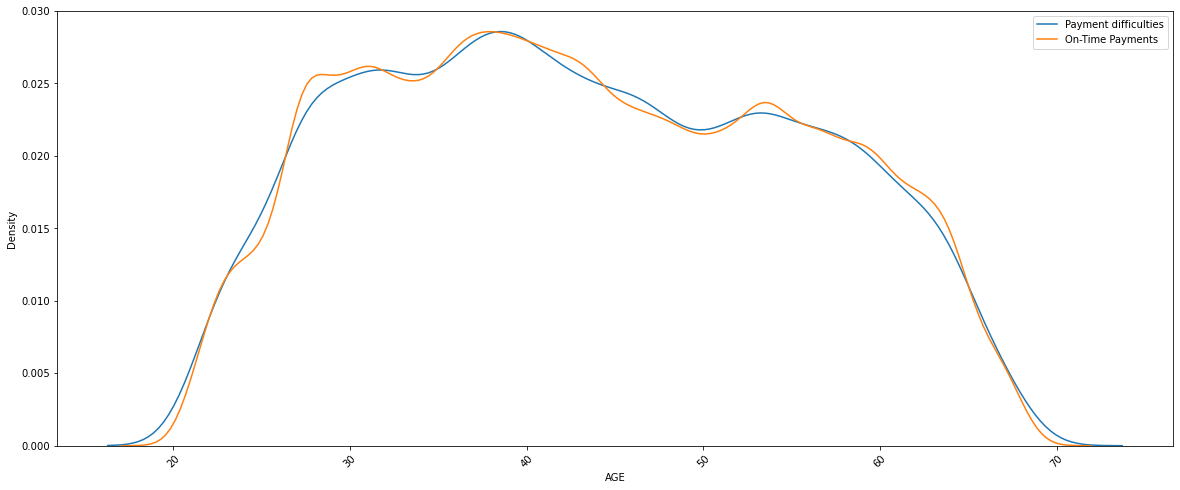

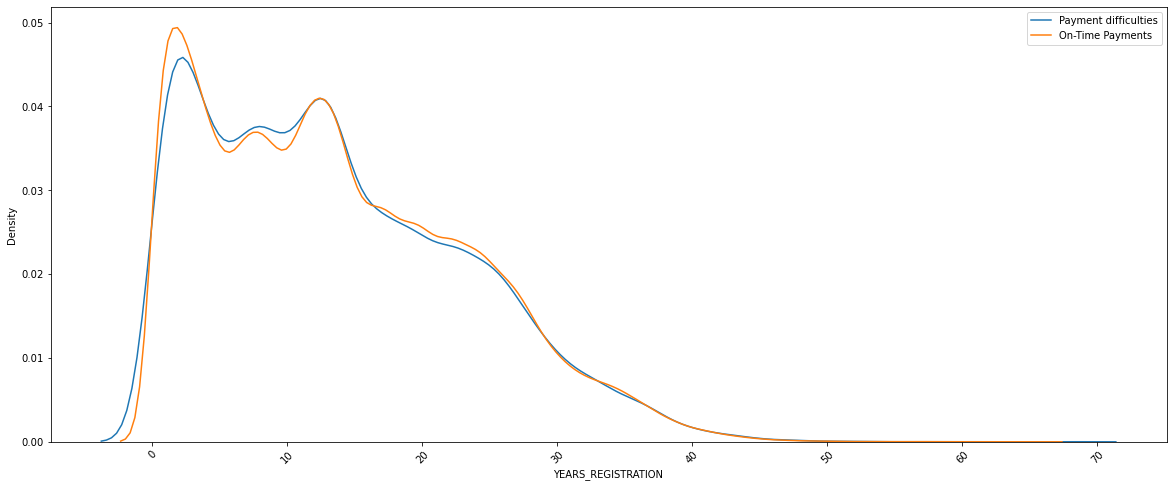

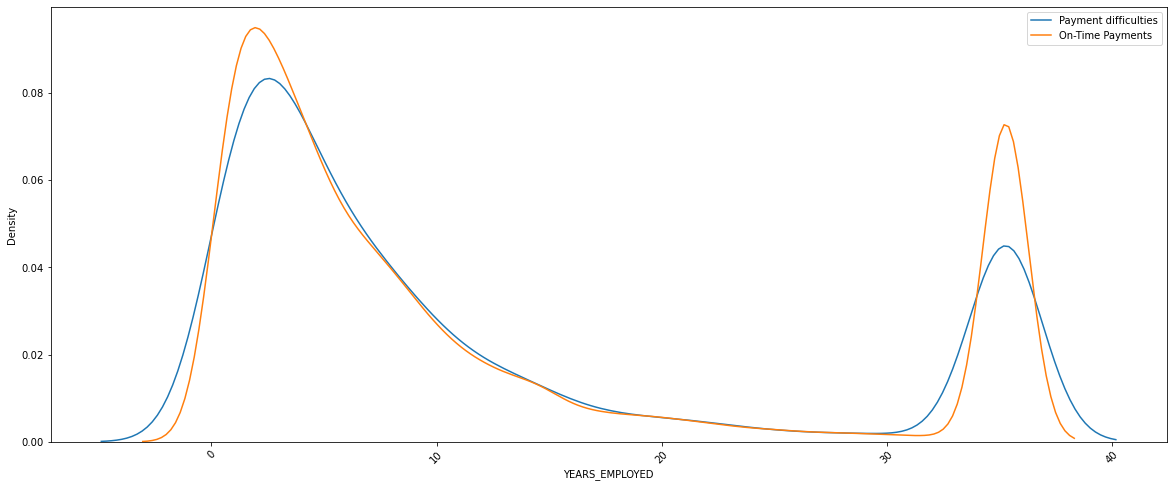

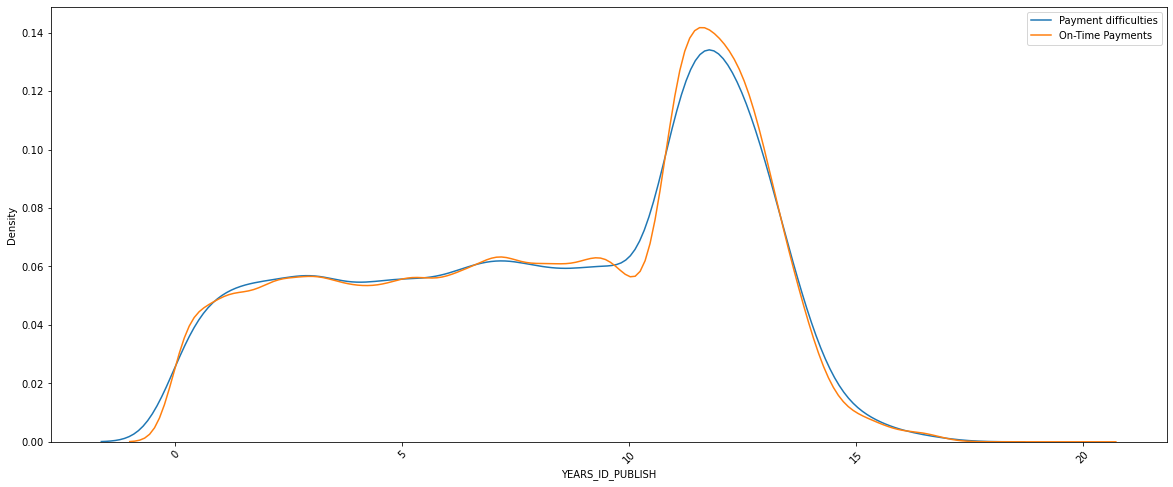

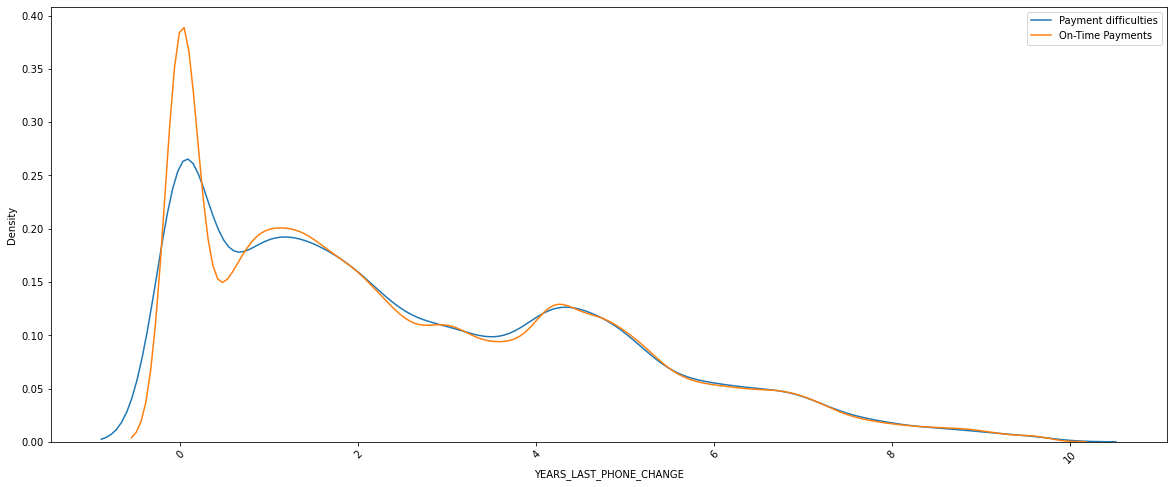

In [116]:
displot_All(OnTimeA,DefaultersA,a_float_cl)

### Observations

For AMT_CREDIT between 250000 and approximately 650000, there are more clients with Payment difficulties
For AMT_CREDIT > 750000 , there are more clients with On-Time Payments

For YEARS_BIRTH between 20 and 40, there are more clients with Payment difficulties
Conversely, for YEARS_BIRTH > 40 , there are more clients with On-Time Payments

For CNT_CHILDREN 0 (those with no children), there are lots of clients with On-Time Payments
For CNT_CHILDREN with 1 OR 2 (those with 1 or 2 children), there are few more clients with On-Time Payments

Based on AMT_INCOME_TOTAL, for clients with Payment difficulties, the distribution resembles a normal distribution approximately
But for clients with On-Time Payments, there are erratic spikes in the distribution which doesn't give any valid observations

### Numerical columns Univariate Analysis Conclusion

The category that is actually showing a huge variation in defaulters and non defaulters is 'YEARS_LAST_PHONE_CHANGE', 'YEARS_EMPLOYED'

## Univariate Categorical columns analysis

In [117]:
def defaultRate_cat(df,x,ncol,fw,fh):
    a=len(x)
    if a%2==0:
        nrows=int((a/ncol))
    else:
        nrows=int((a/ncol)+1)
    v=[]
    for i in range(nrows):
        for j in range(ncol):
            v.append((i,j))
    fig, axis = plt.subplots(nrows, ncol, figsize=(fw, fh))
    for i in range(a):
        A=list(df.groupby(x[i])['TARGET'].mean().sort_values().head(4).index)
        B=list(df.groupby(x[i])['TARGET'].mean().sort_values().head(4))
        axis[v[i]].barh(A,B)
        axis[v[i]].tick_params(axis='x', labelrotation = 100)
        axis[v[i]].set_title(x[i])

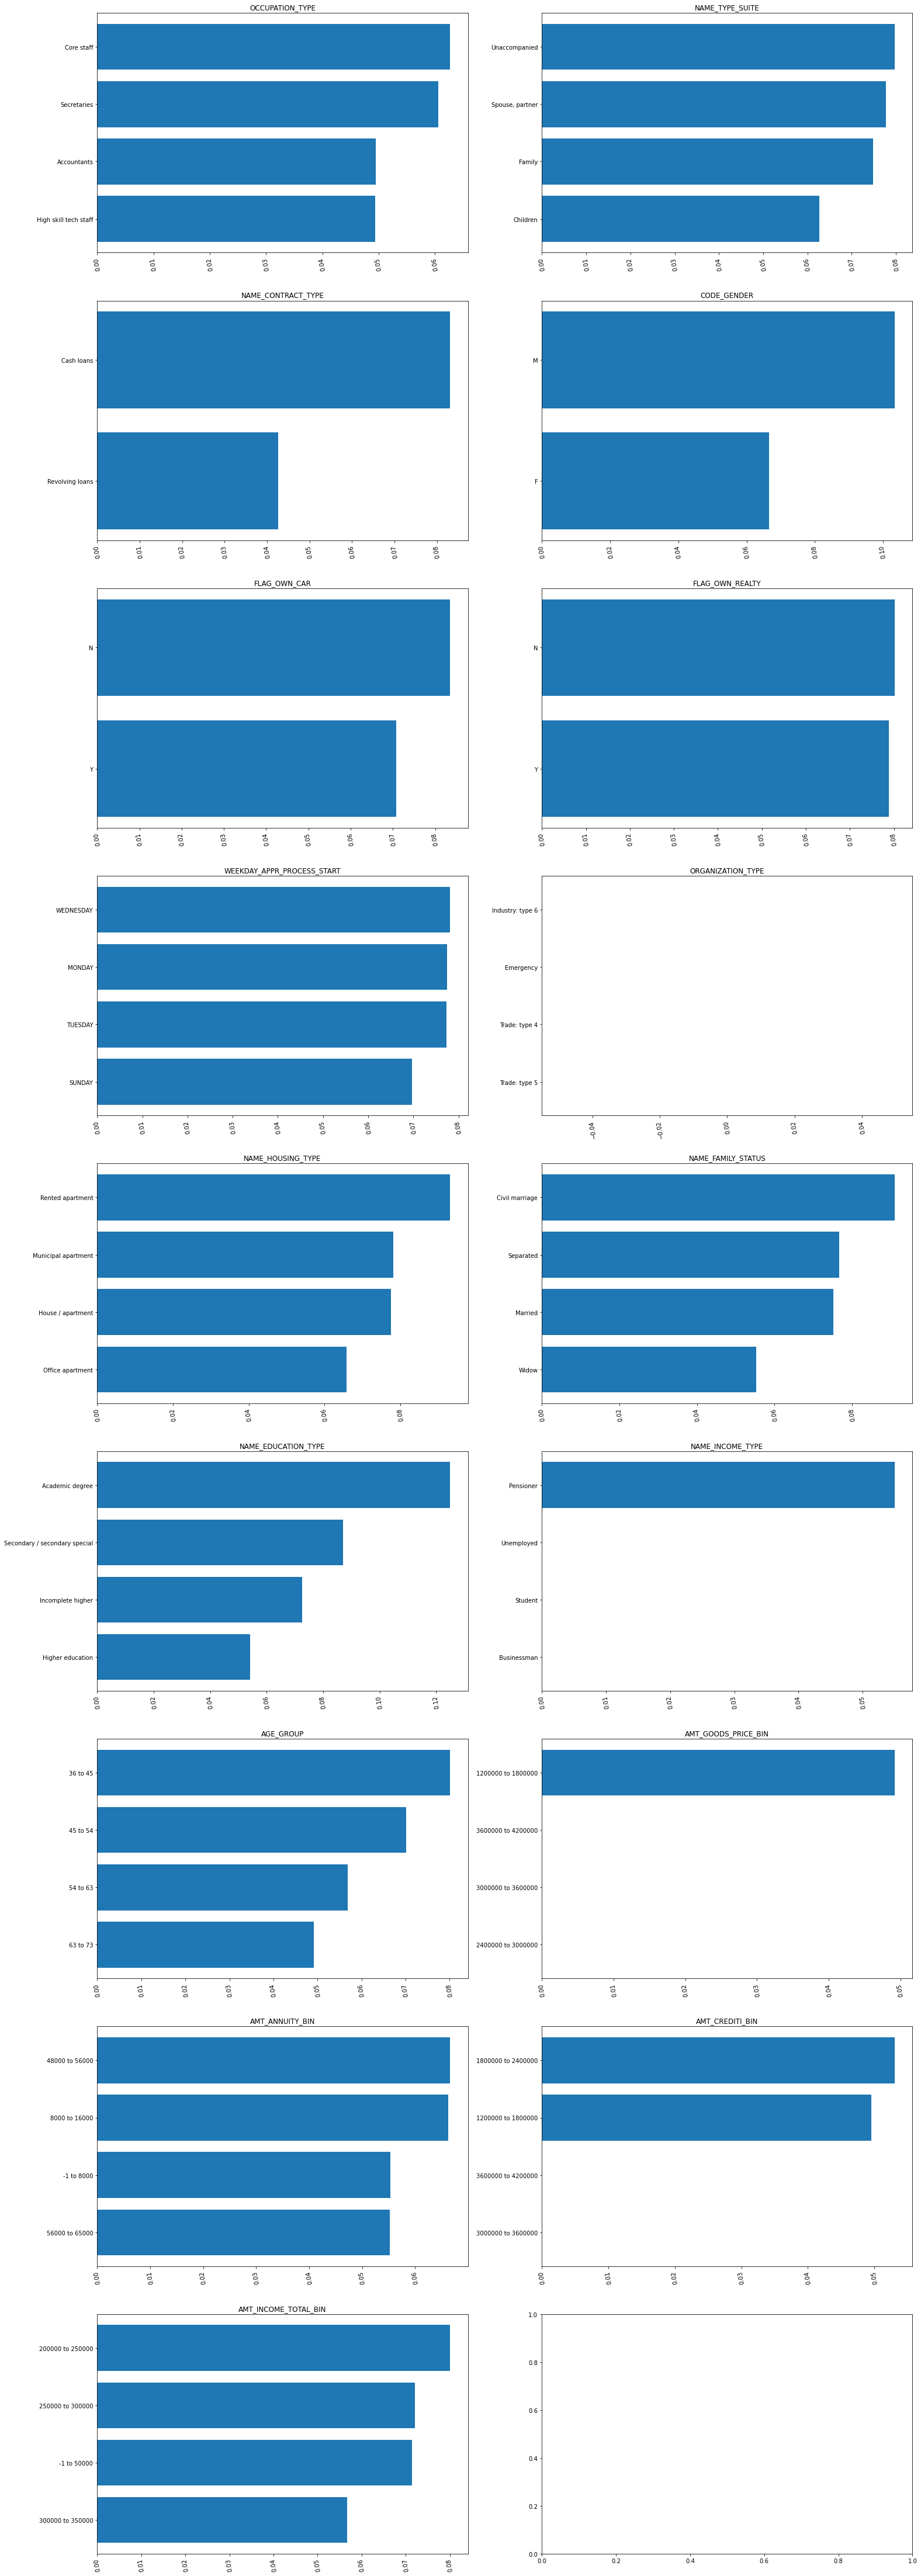

In [118]:
defaultRate_cat(DefaultersA,a_object_cl,2,25,80)

<Figure size 2160x4320 with 0 Axes>

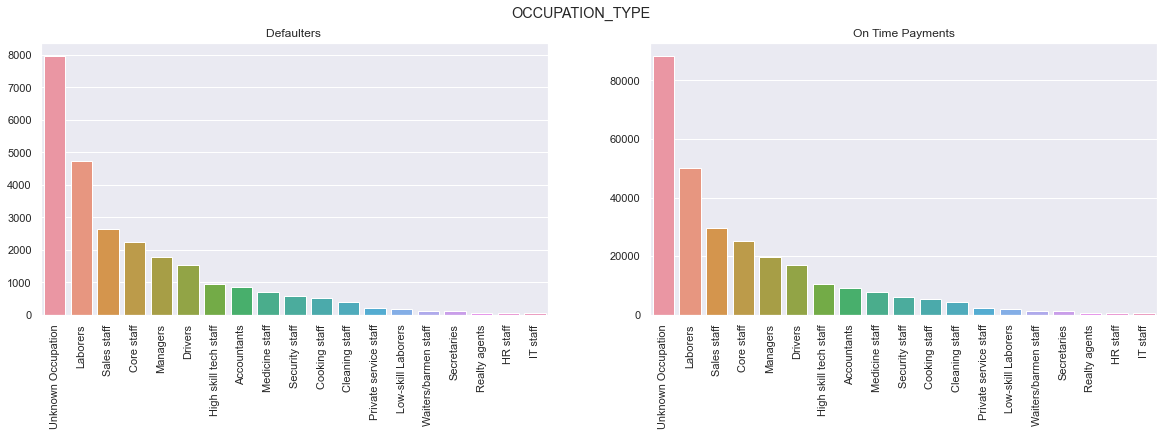

<Figure size 2160x4320 with 0 Axes>

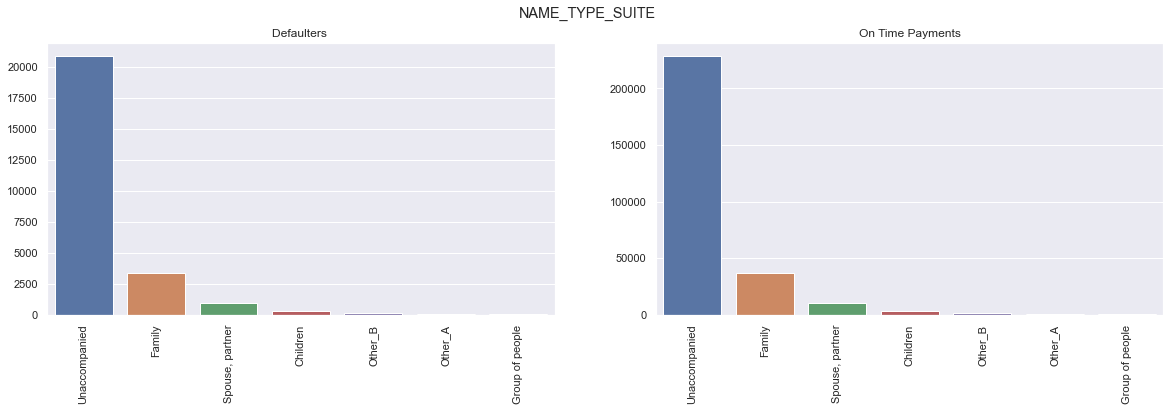

<Figure size 2160x4320 with 0 Axes>

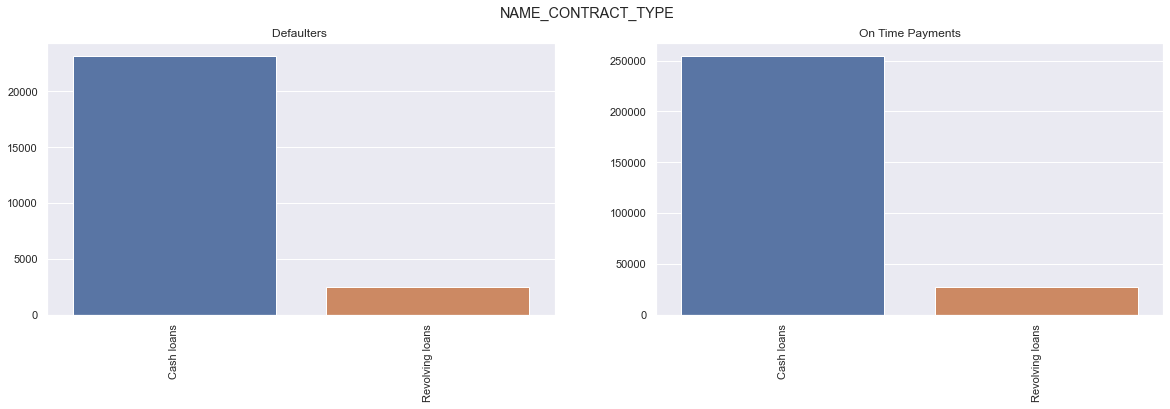

<Figure size 2160x4320 with 0 Axes>

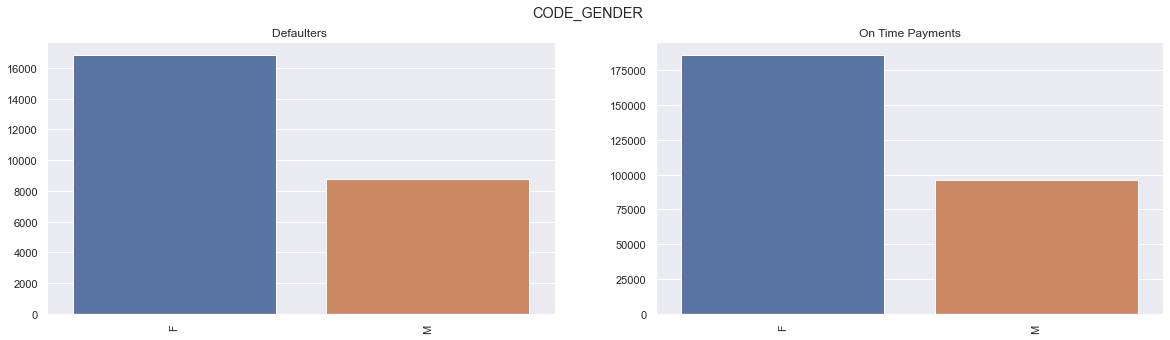

<Figure size 2160x4320 with 0 Axes>

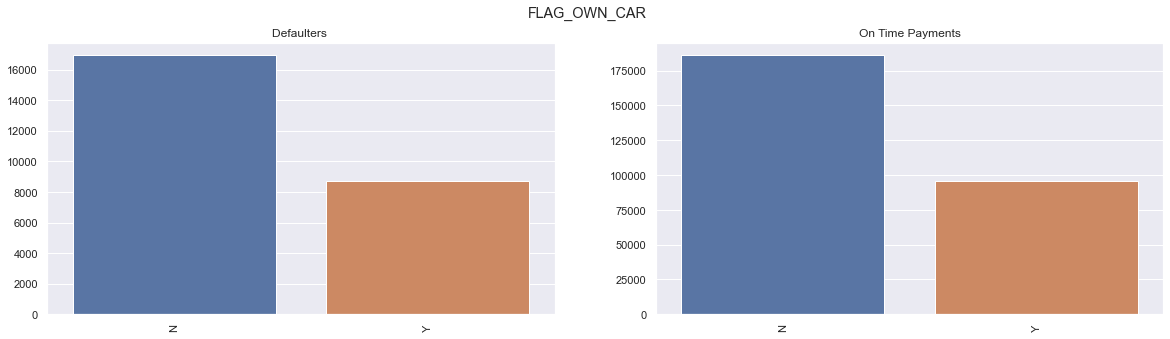

<Figure size 2160x4320 with 0 Axes>

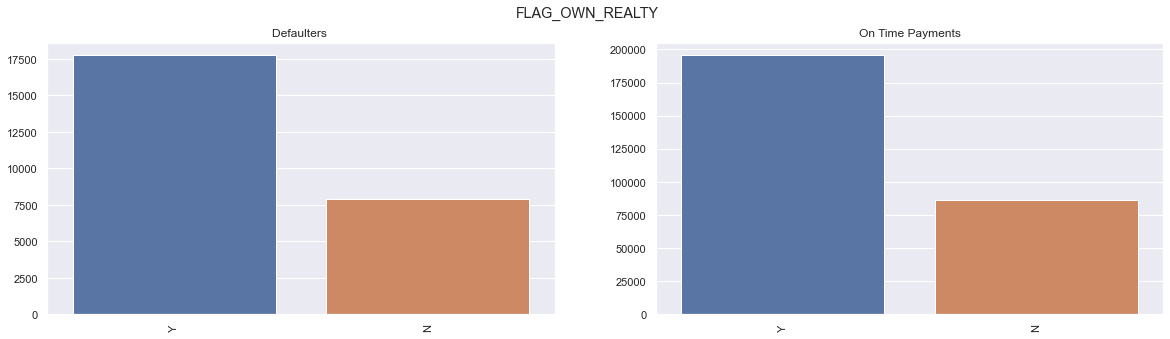

<Figure size 2160x4320 with 0 Axes>

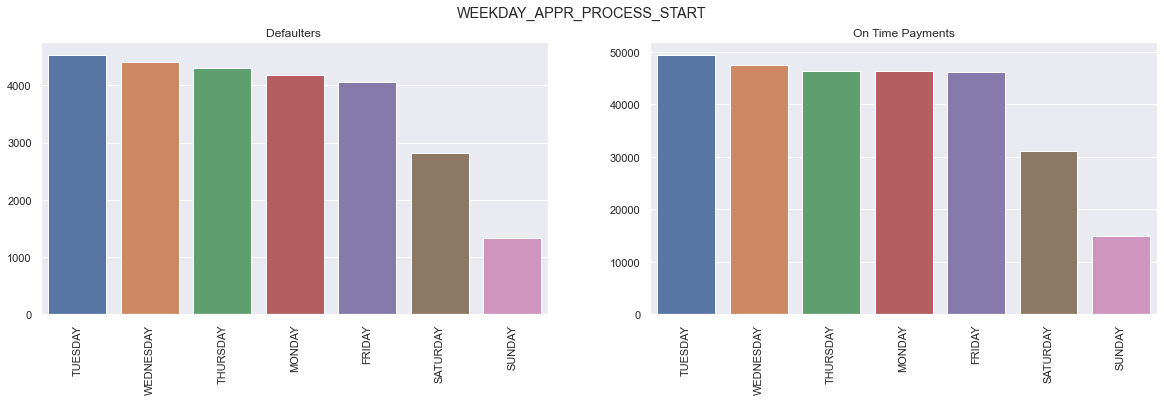

<Figure size 2160x4320 with 0 Axes>

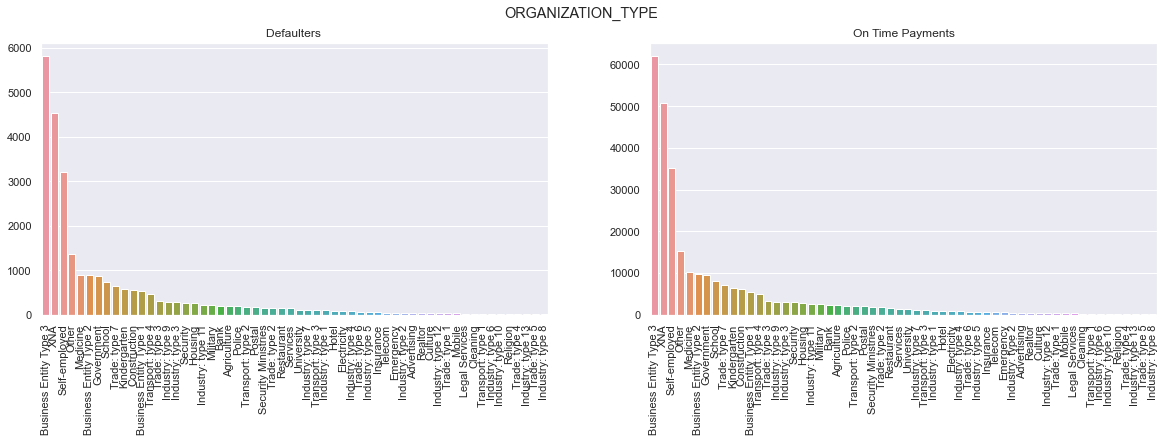

<Figure size 2160x4320 with 0 Axes>

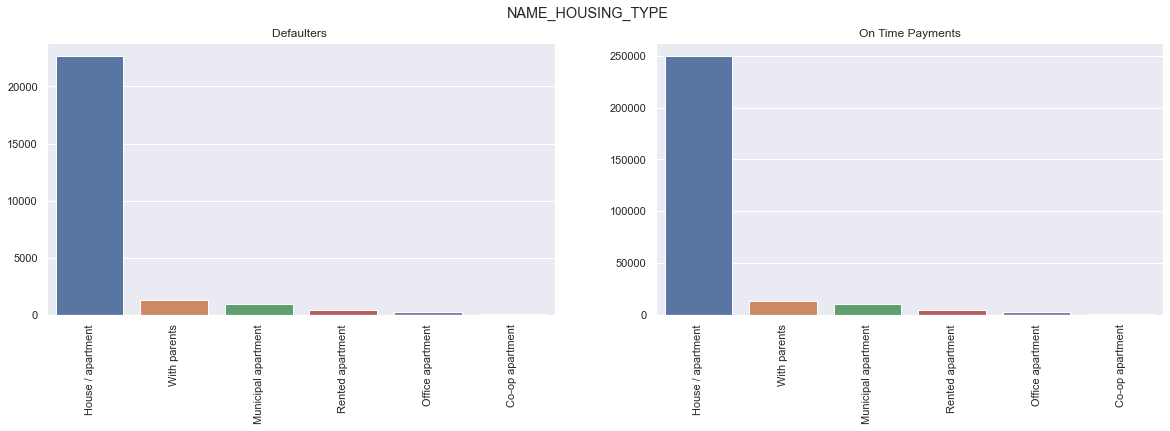

<Figure size 2160x4320 with 0 Axes>

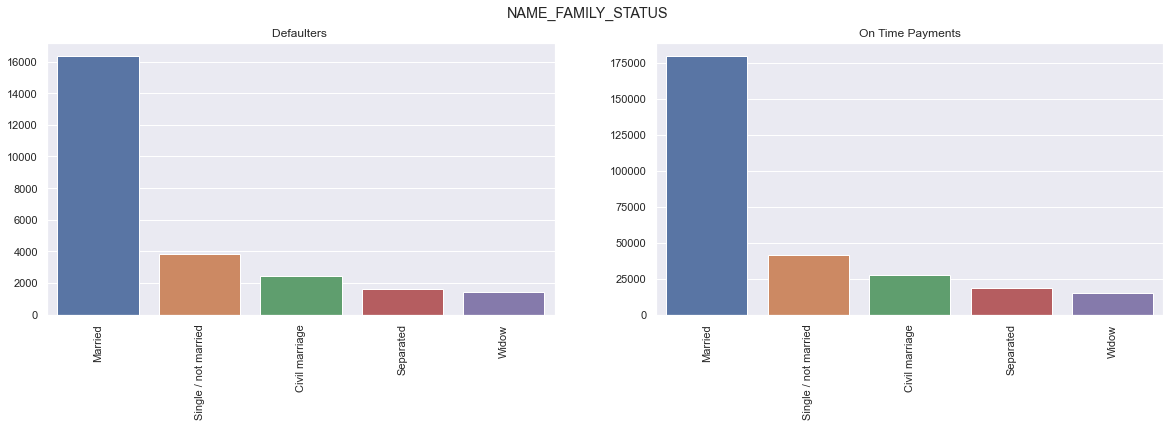

<Figure size 2160x4320 with 0 Axes>

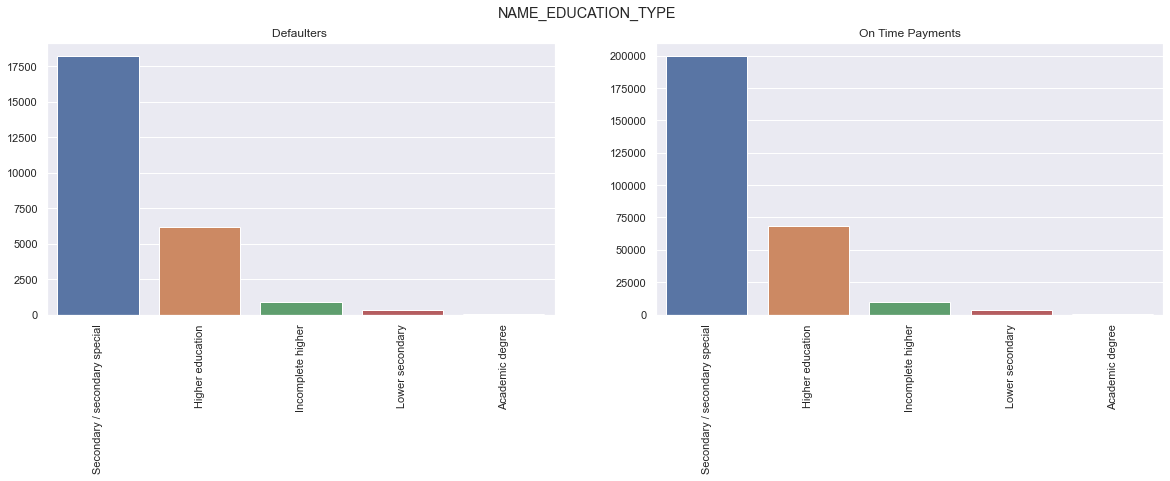

<Figure size 2160x4320 with 0 Axes>

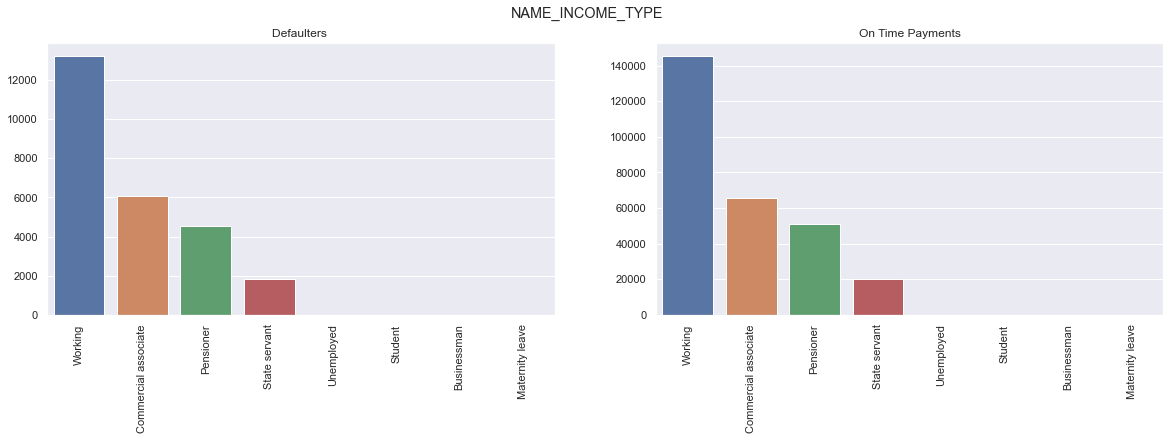

<Figure size 2160x4320 with 0 Axes>

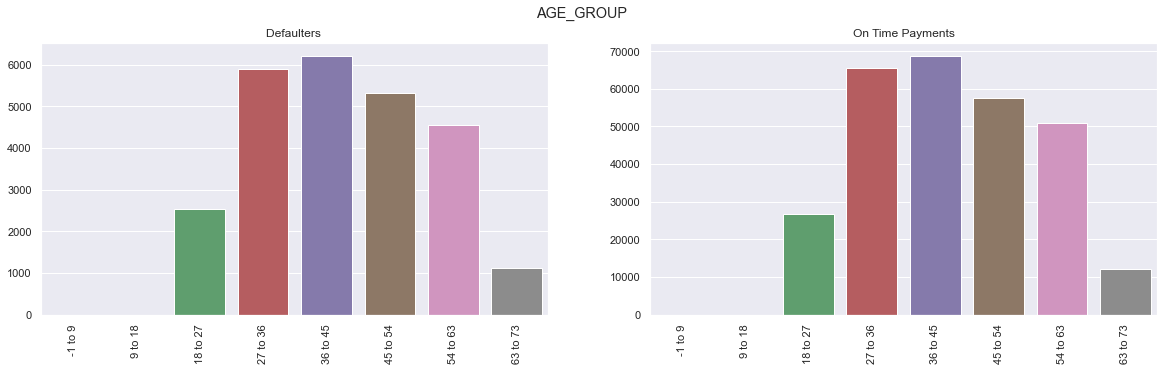

<Figure size 2160x4320 with 0 Axes>

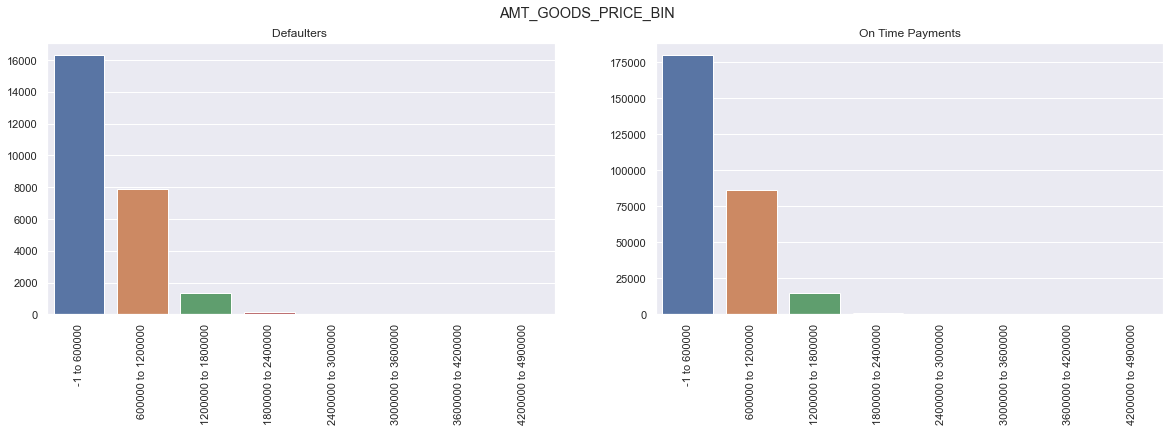

<Figure size 2160x4320 with 0 Axes>

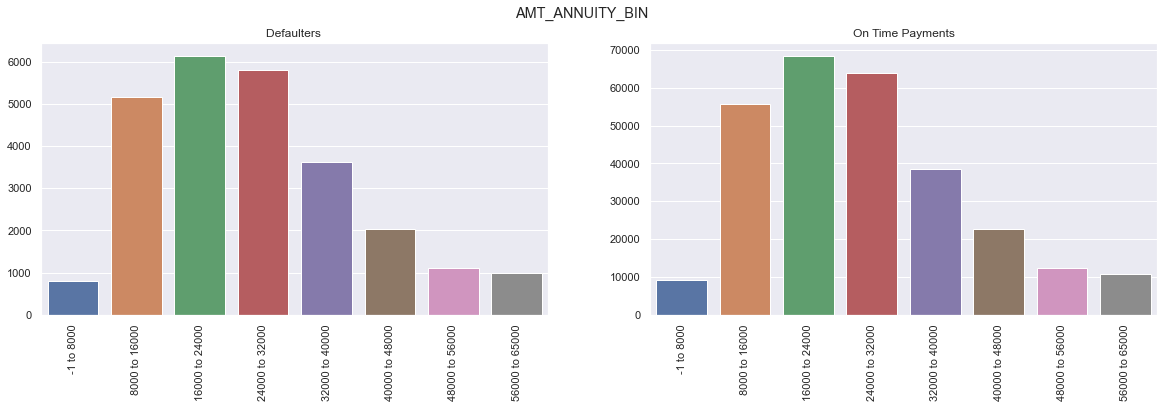

<Figure size 2160x4320 with 0 Axes>

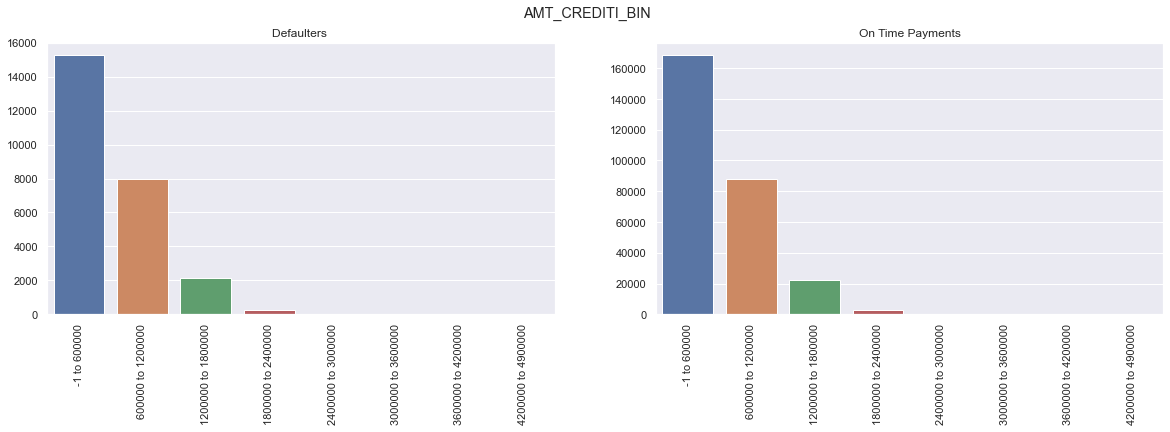

<Figure size 2160x4320 with 0 Axes>

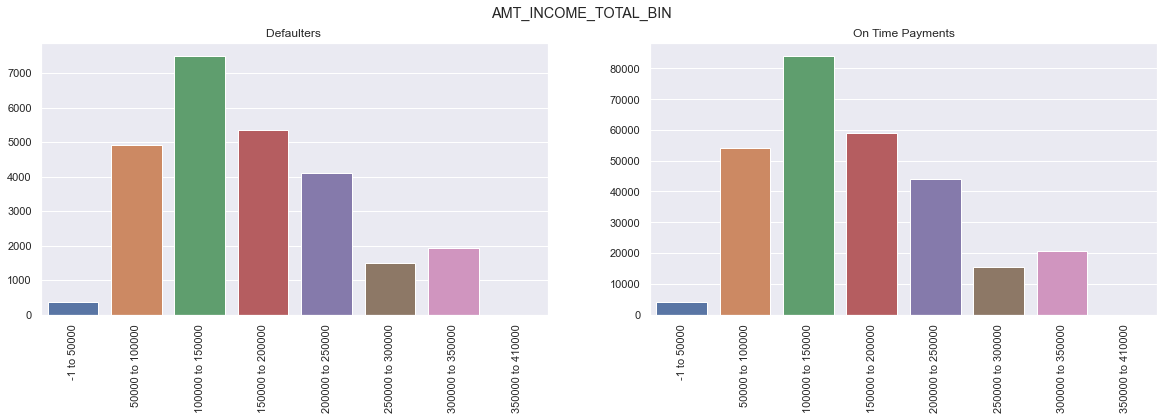

In [135]:
for i in a_object_cl:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(30, 60)})
    agc=DefaultersA[i].value_counts()
    agm=OnTimeA[i].value_counts()
    figure, axes = plt.subplots(1, 2, sharex=True,figsize=(20, 5))
    figure.suptitle(i)
    axes[0].set_title('Defaulters ')
    axes[1].set_title('On Time Payments')
    sns.barplot(data=DefaultersA, x=agc.index, y=agc.values,ax=axes[0])
    axes[0].set_xticklabels(labels=agc.index,rotation=90)
    sns.barplot(data=OnTimeA, x=agm.index, y=agm.values,ax=axes[1])
    plt.xticks(rotation=90)

### Categorical Univariate Analysis

Clearly not defaulters - IT Staff, Student, Businessman, where goods > 2400000

Clearly Defaulters - Labourers, Higher Eduication, Pentioner,

### Analysis Conclusion

### NAME_EDUCATION_TYPE
#### Observations

Pensioners have better on-time payments
Students don't have Payment difficulties
Businessmen don't have Payment difficulties

#### Conclusion
Pensioners have better on-time payments. This is a weak correlation.
Students don't have Payment difficulties. In this case, total students have only 18 observations and should be treated as a weak correlation
Businessmen don't have Payment difficulties. In this case, Businessmen have only 10 observations and should be treated as a weak correlation


### CODE_GENDER

### Observations

Looking at CountPlot and PieChart, there is a 9.5% decrease in "Male" values from CODE_GENDER b/w clients with payment difficulties to on-time payments. It's a weak correlation that Males have more payment difficulties.

#### Conclusion
CODE_GENDER column provides a weak inference that "Male" clients have more payment difficulties



### NAME_INCOME_TYPE
#### Observations
Pensioners have better on-time payments
Students don't have Payment difficulties
Businessmen don't have Payment difficulties

#### Conclusion
Pensioners have better on-time payments. This is a weak correlation.
Students don't have Payment difficulties. In this case, total students have only 18 observations and should be treated as a weak correlation
Businessmen don't have Payment difficulties. In this case, Businessmen have only 10 observations and should be treated as a weak correlation


### NAME_FAMILY_STATUS
#### Observations
Clients who are 'Married' are 59.8% with payment difficulties and 64.2% with on-timepayments
Clients who are 'Widow' are 3.8% with payment difficulties and 5.4% with on-timepayments
Clients who are 'Single/not married' are 18.0% with payment difficulties and 14.5% with on-timepayments
Remaining categories don't provide any conclusive results

#### Conclusion
Clients who are 'Married' OR 'Widow' do on-time payments better comparatively. However, this is a weak correlation.
Clients who are 'Single/not married' have more difficulties with on-time payments comparatively. However, this is a weak correlation.


## Multivariate Analysis


In [120]:
app.TARGET.mean()

0.08072272691777078

In [121]:
def plt_heatmap_app(df,ind,col):
    res=pd.pivot_table(data=df, index=ind, columns=col, values='TARGET')
    plt.figure(figsize=(15,8))
    sns.heatmap(res, annot=True, cmap='RdYlGn',center=0.08)

In [122]:
a_object_cl

['OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'AGE_GROUP',
 'AMT_GOODS_PRICE_BIN',
 'AMT_ANNUITY_BIN',
 'AMT_CREDITI_BIN',
 'AMT_INCOME_TOTAL_BIN']

#### Categorical Heatmaps
Identifying the important columns to be considered for heatmaps

In [123]:
imp_cat=['OCCUPATION_TYPE','CODE_GENDER','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE',
         'NAME_INCOME_TYPE','AGE_GROUP'] 

Creating a list of combinations of all possible pairs from the important categories

In [124]:
res = list(combinations(imp_cat, 2))

In [125]:
res

[('OCCUPATION_TYPE', 'CODE_GENDER'),
 ('OCCUPATION_TYPE', 'NAME_FAMILY_STATUS'),
 ('OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE'),
 ('OCCUPATION_TYPE', 'NAME_INCOME_TYPE'),
 ('OCCUPATION_TYPE', 'AGE_GROUP'),
 ('CODE_GENDER', 'NAME_FAMILY_STATUS'),
 ('CODE_GENDER', 'NAME_EDUCATION_TYPE'),
 ('CODE_GENDER', 'NAME_INCOME_TYPE'),
 ('CODE_GENDER', 'AGE_GROUP'),
 ('NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE'),
 ('NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE'),
 ('NAME_FAMILY_STATUS', 'AGE_GROUP'),
 ('NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'),
 ('NAME_EDUCATION_TYPE', 'AGE_GROUP'),
 ('NAME_INCOME_TYPE', 'AGE_GROUP')]

### Plotting categorical Heatmaps

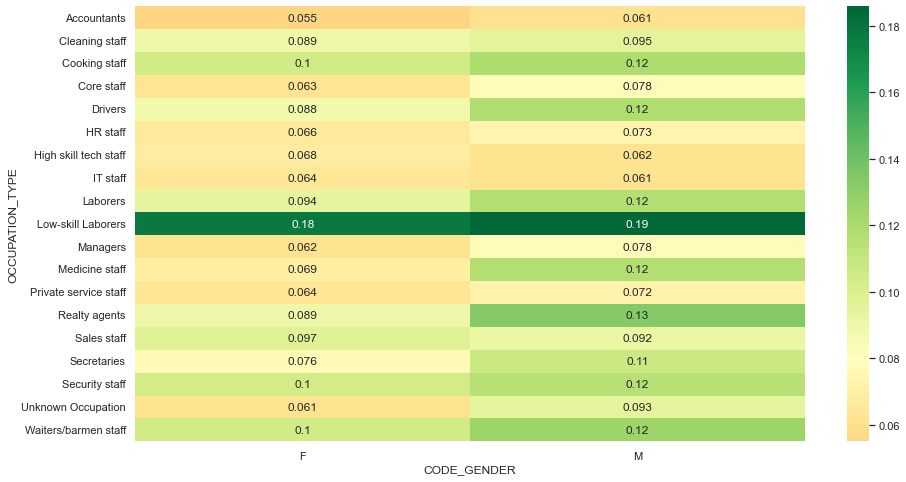

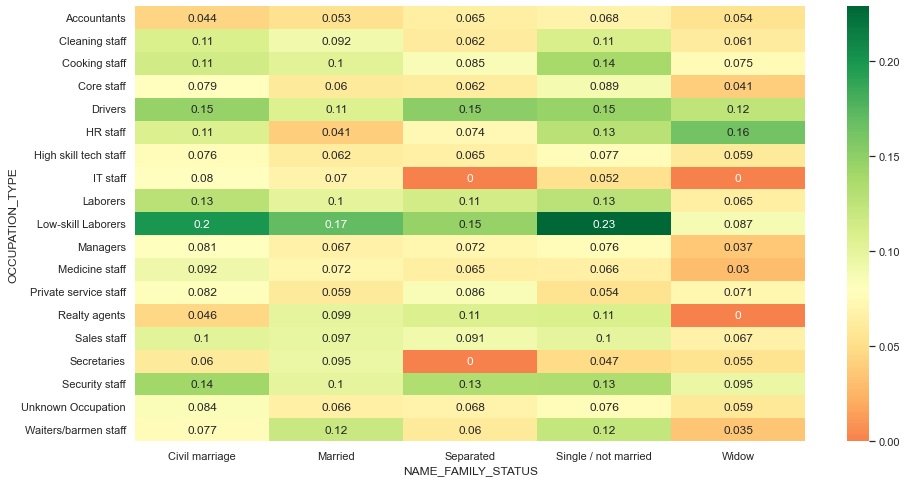

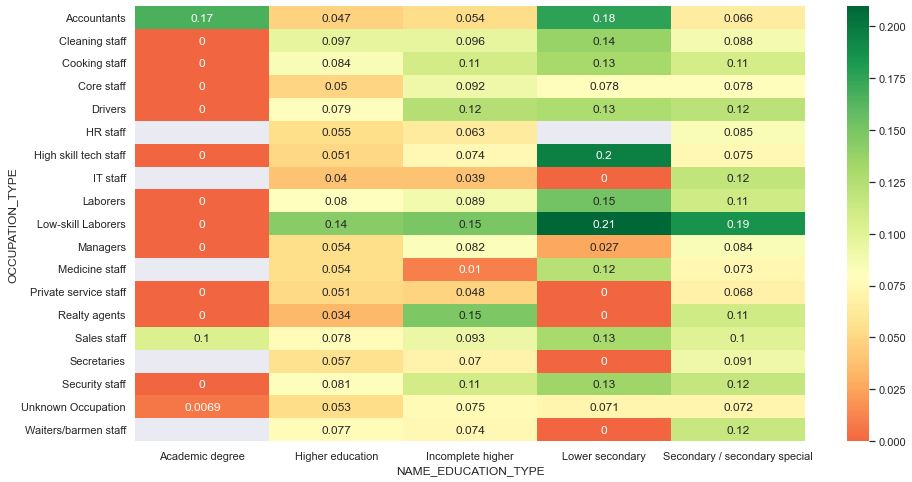

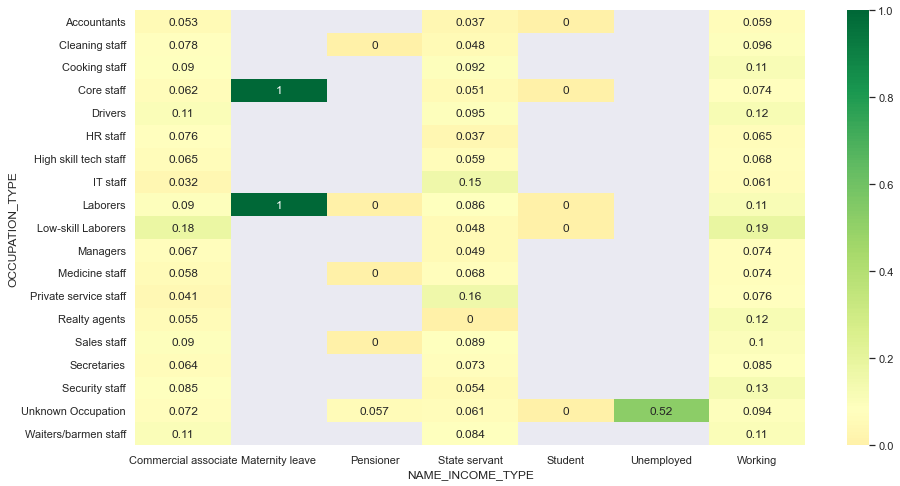

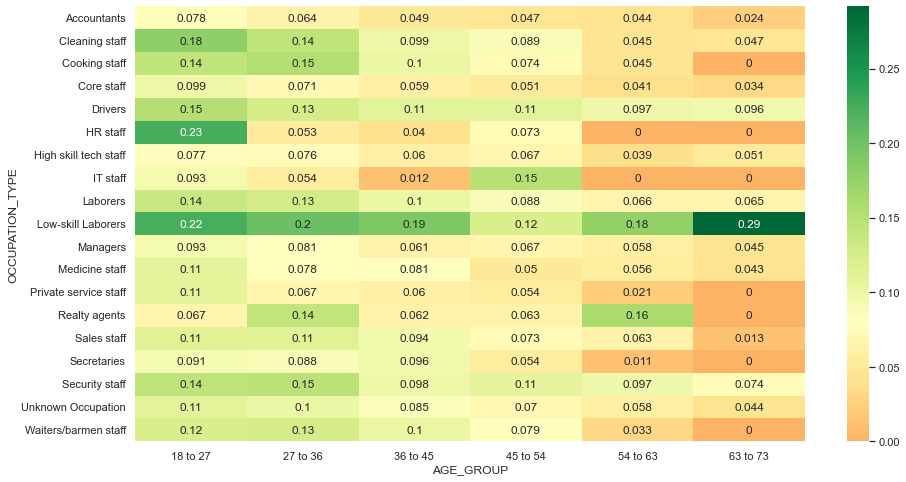

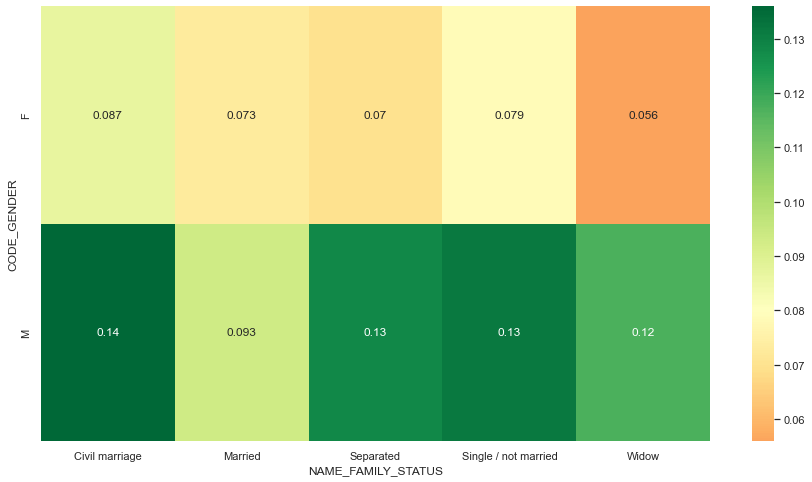

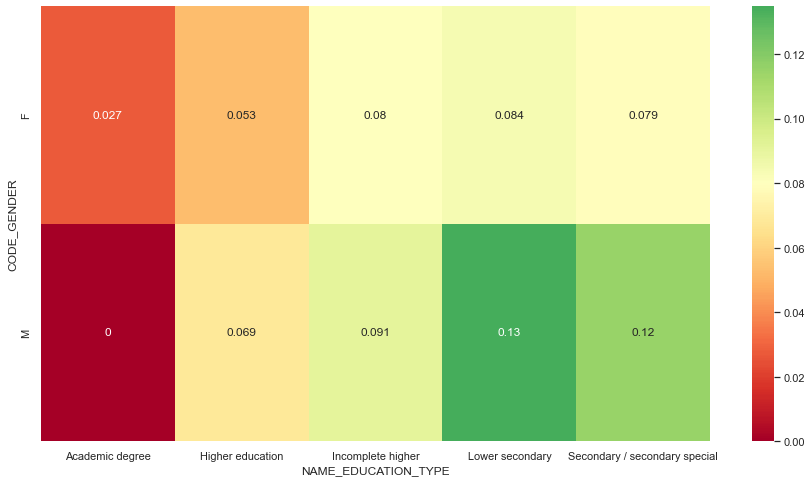

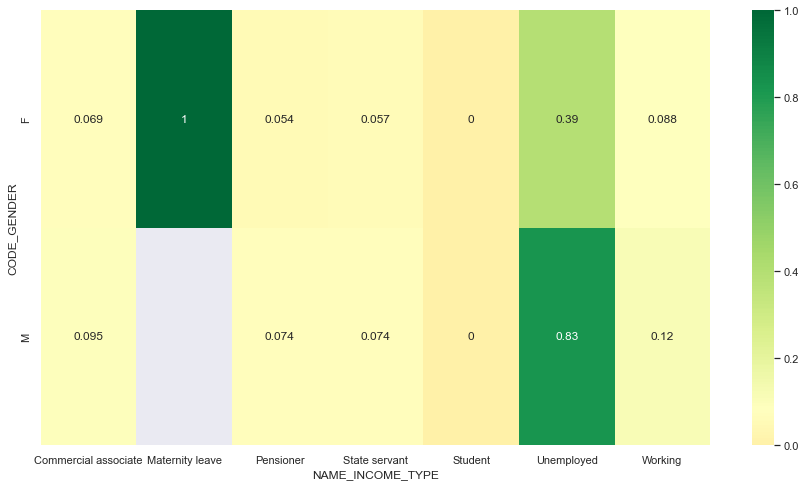

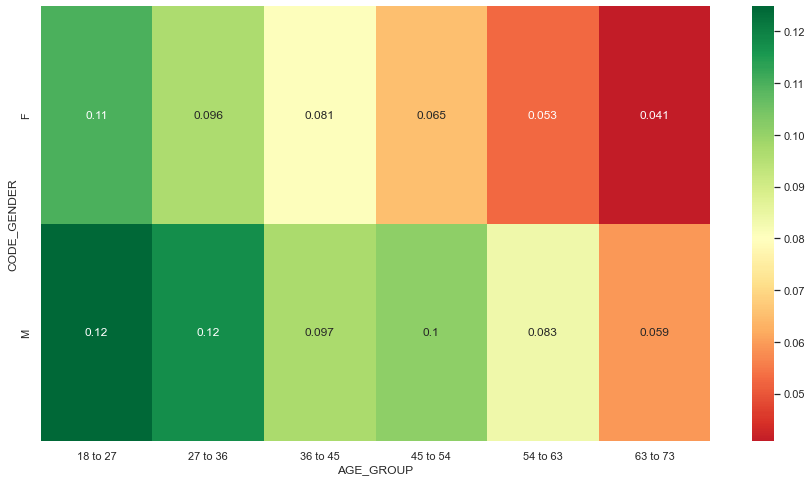

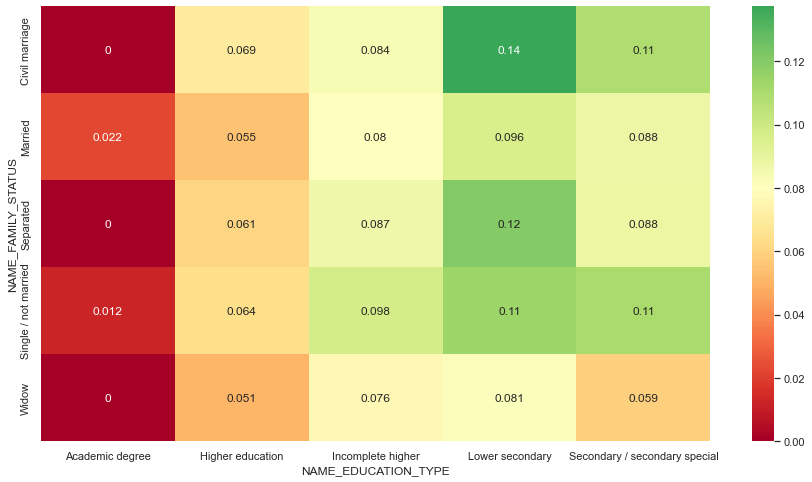

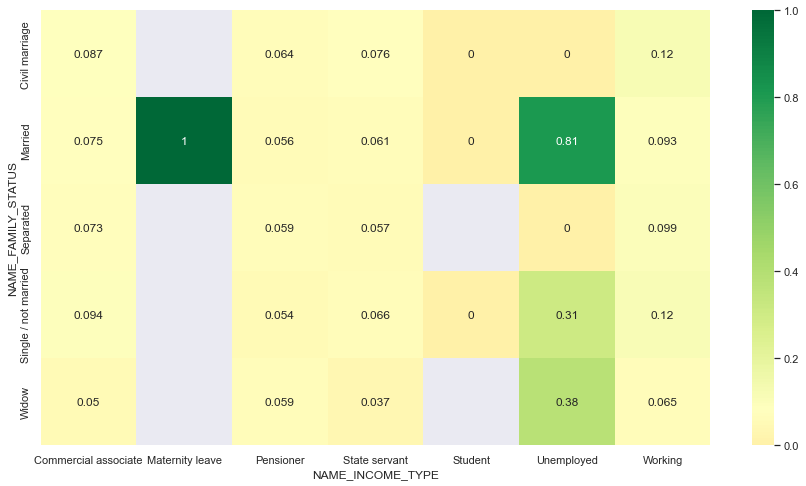

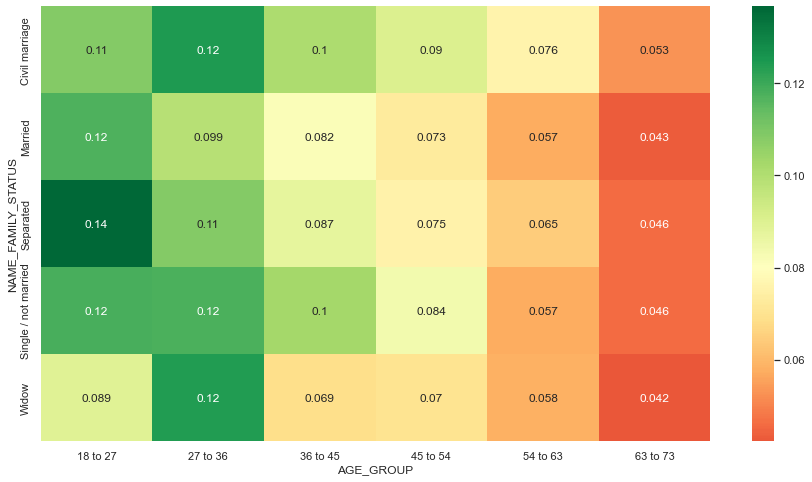

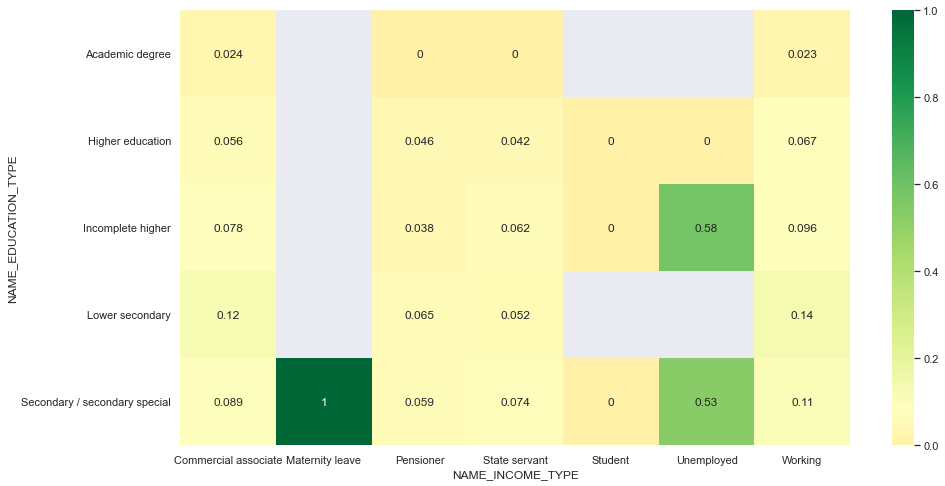

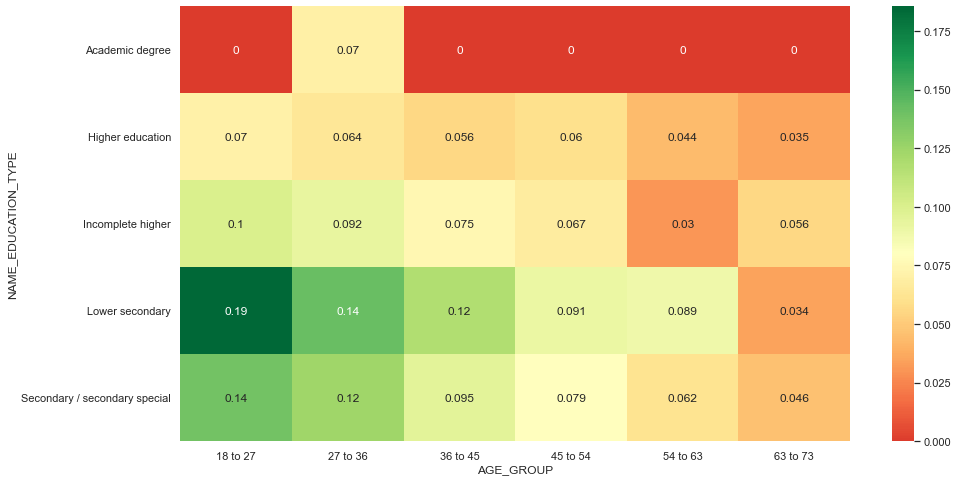

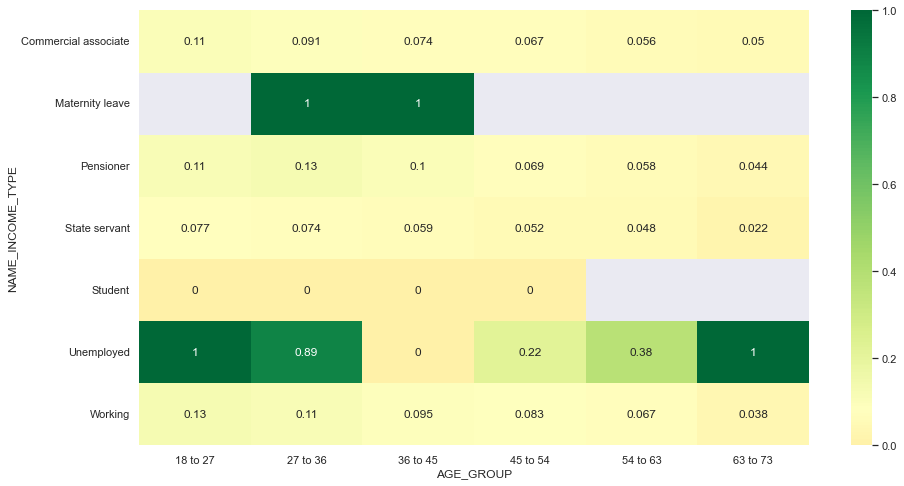

In [126]:
for i in res:
    plt_heatmap_app(capp,i[0],i[1])

### Observations
#### Strong Rate of Default - 0.9-1
Unemployed - 18-27
Unemployed - 27-36
Unemployed - 63-73
Maternity Leave all valid age groups
#### High Rate of Default - 0.7-0.9
Unemployed -  Married
Married - Maternity Leave
Unemployed - Male
#### Medium Rate of Dwfault - 0.5 -0.7
Unemployed - Whereever possible
Unemplo

low skill labourers , 63-73
#### Weak Rate of default  - 0.2-0.5
Lower Secondary , 18-27
low skill labourers , 63-73
low skill labourers,  Lower Secondary
low skill labourers, Single Not Married
Low Skill labourers, Male


### Conclusion :
Unployed People, People on Maternity Leave, Low Skilled Labourers - are features that the bank should avoid while providing a loan 

### Correletion
Looking at Correlation of both Defaulters and On Time customers.

#### Correlation for On Time customers

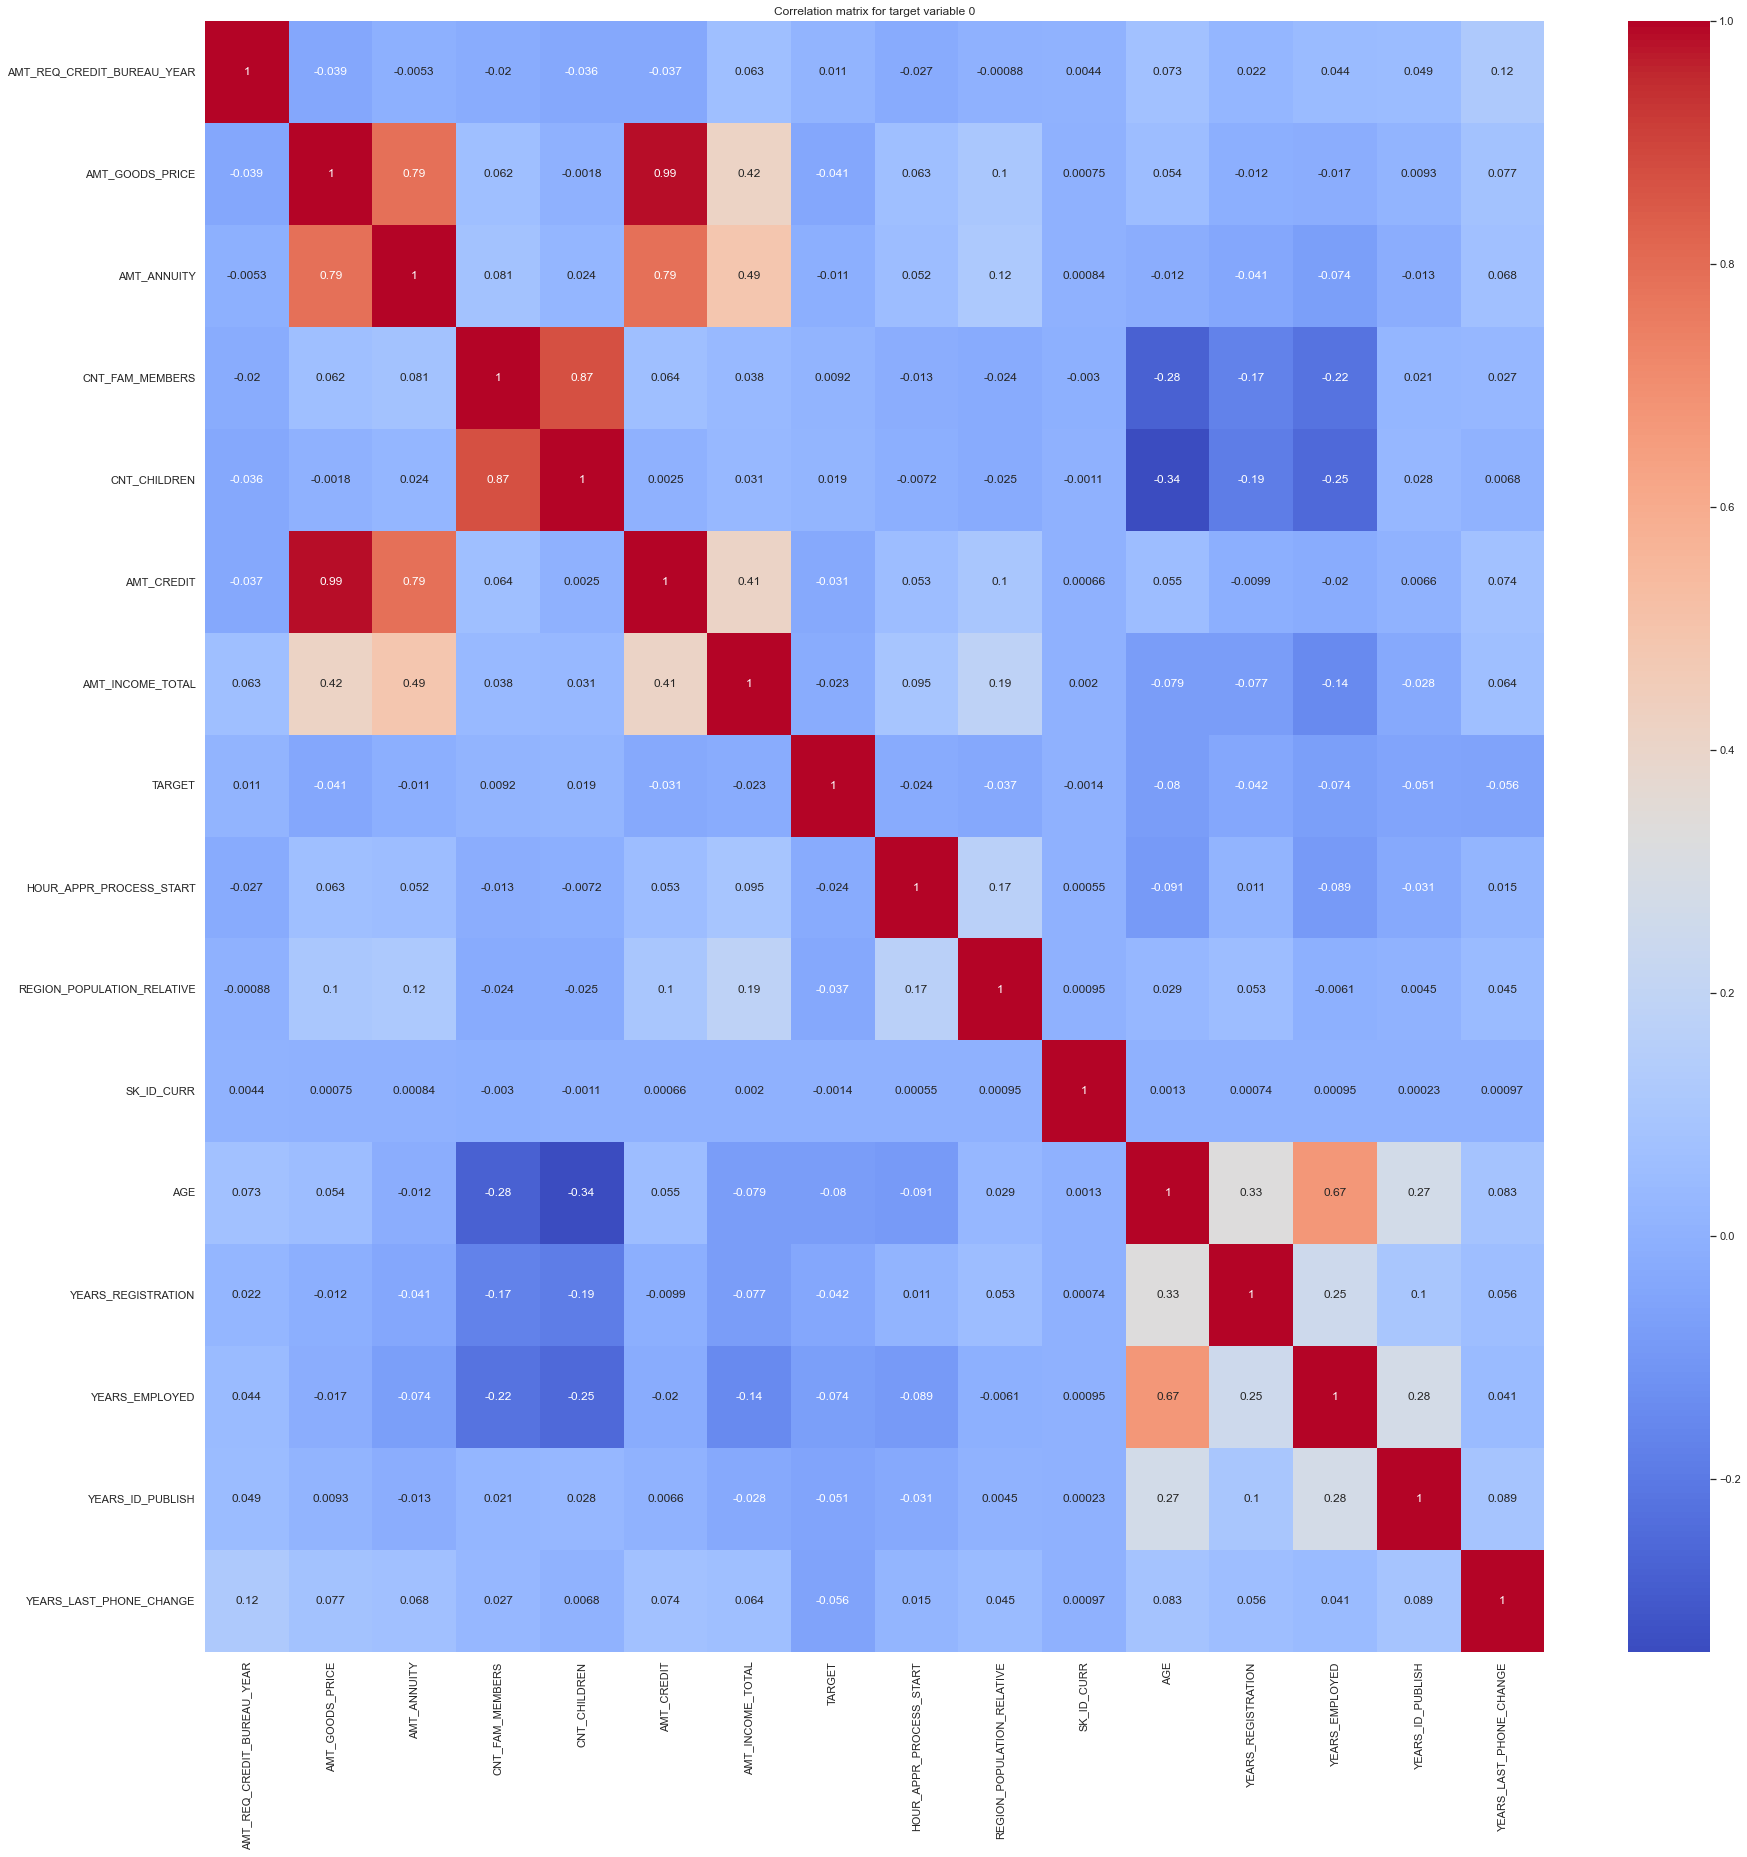

In [127]:
# for target variable=0
plt.figure(figsize=(30,30)) 
sns.heatmap(OnTimeA.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for target variable 0')
plt.show()

In [128]:
corr0 = OnTimeA.corr()
corr_df0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr_df0 = corr_df0.unstack().reset_index().dropna(subset = [0])
corr_df0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df0['Corr_abs'] = abs(corr_df0['Correlation_Value'])
corr_df0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df0.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
81,AMT_CREDIT,AMT_GOODS_PRICE,0.9867374077,0.9867374077
67,CNT_CHILDREN,CNT_FAM_MEMBERS,0.8712956848,0.8712956848
33,AMT_ANNUITY,AMT_GOODS_PRICE,0.7885568123,0.7885568123
82,AMT_CREDIT,AMT_ANNUITY,0.7881498736,0.7881498736
219,YEARS_EMPLOYED,AGE,0.6734436309,0.6734436309
98,AMT_INCOME_TOTAL,AMT_ANNUITY,0.4884552822,0.4884552822
97,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.4159805456,0.4159805456
101,AMT_INCOME_TOTAL,AMT_CREDIT,0.4119289072,0.4119289072
180,AGE,CNT_CHILDREN,-0.3427889750,0.3427889750
203,YEARS_REGISTRATION,AGE,0.3324698960,0.3324698960


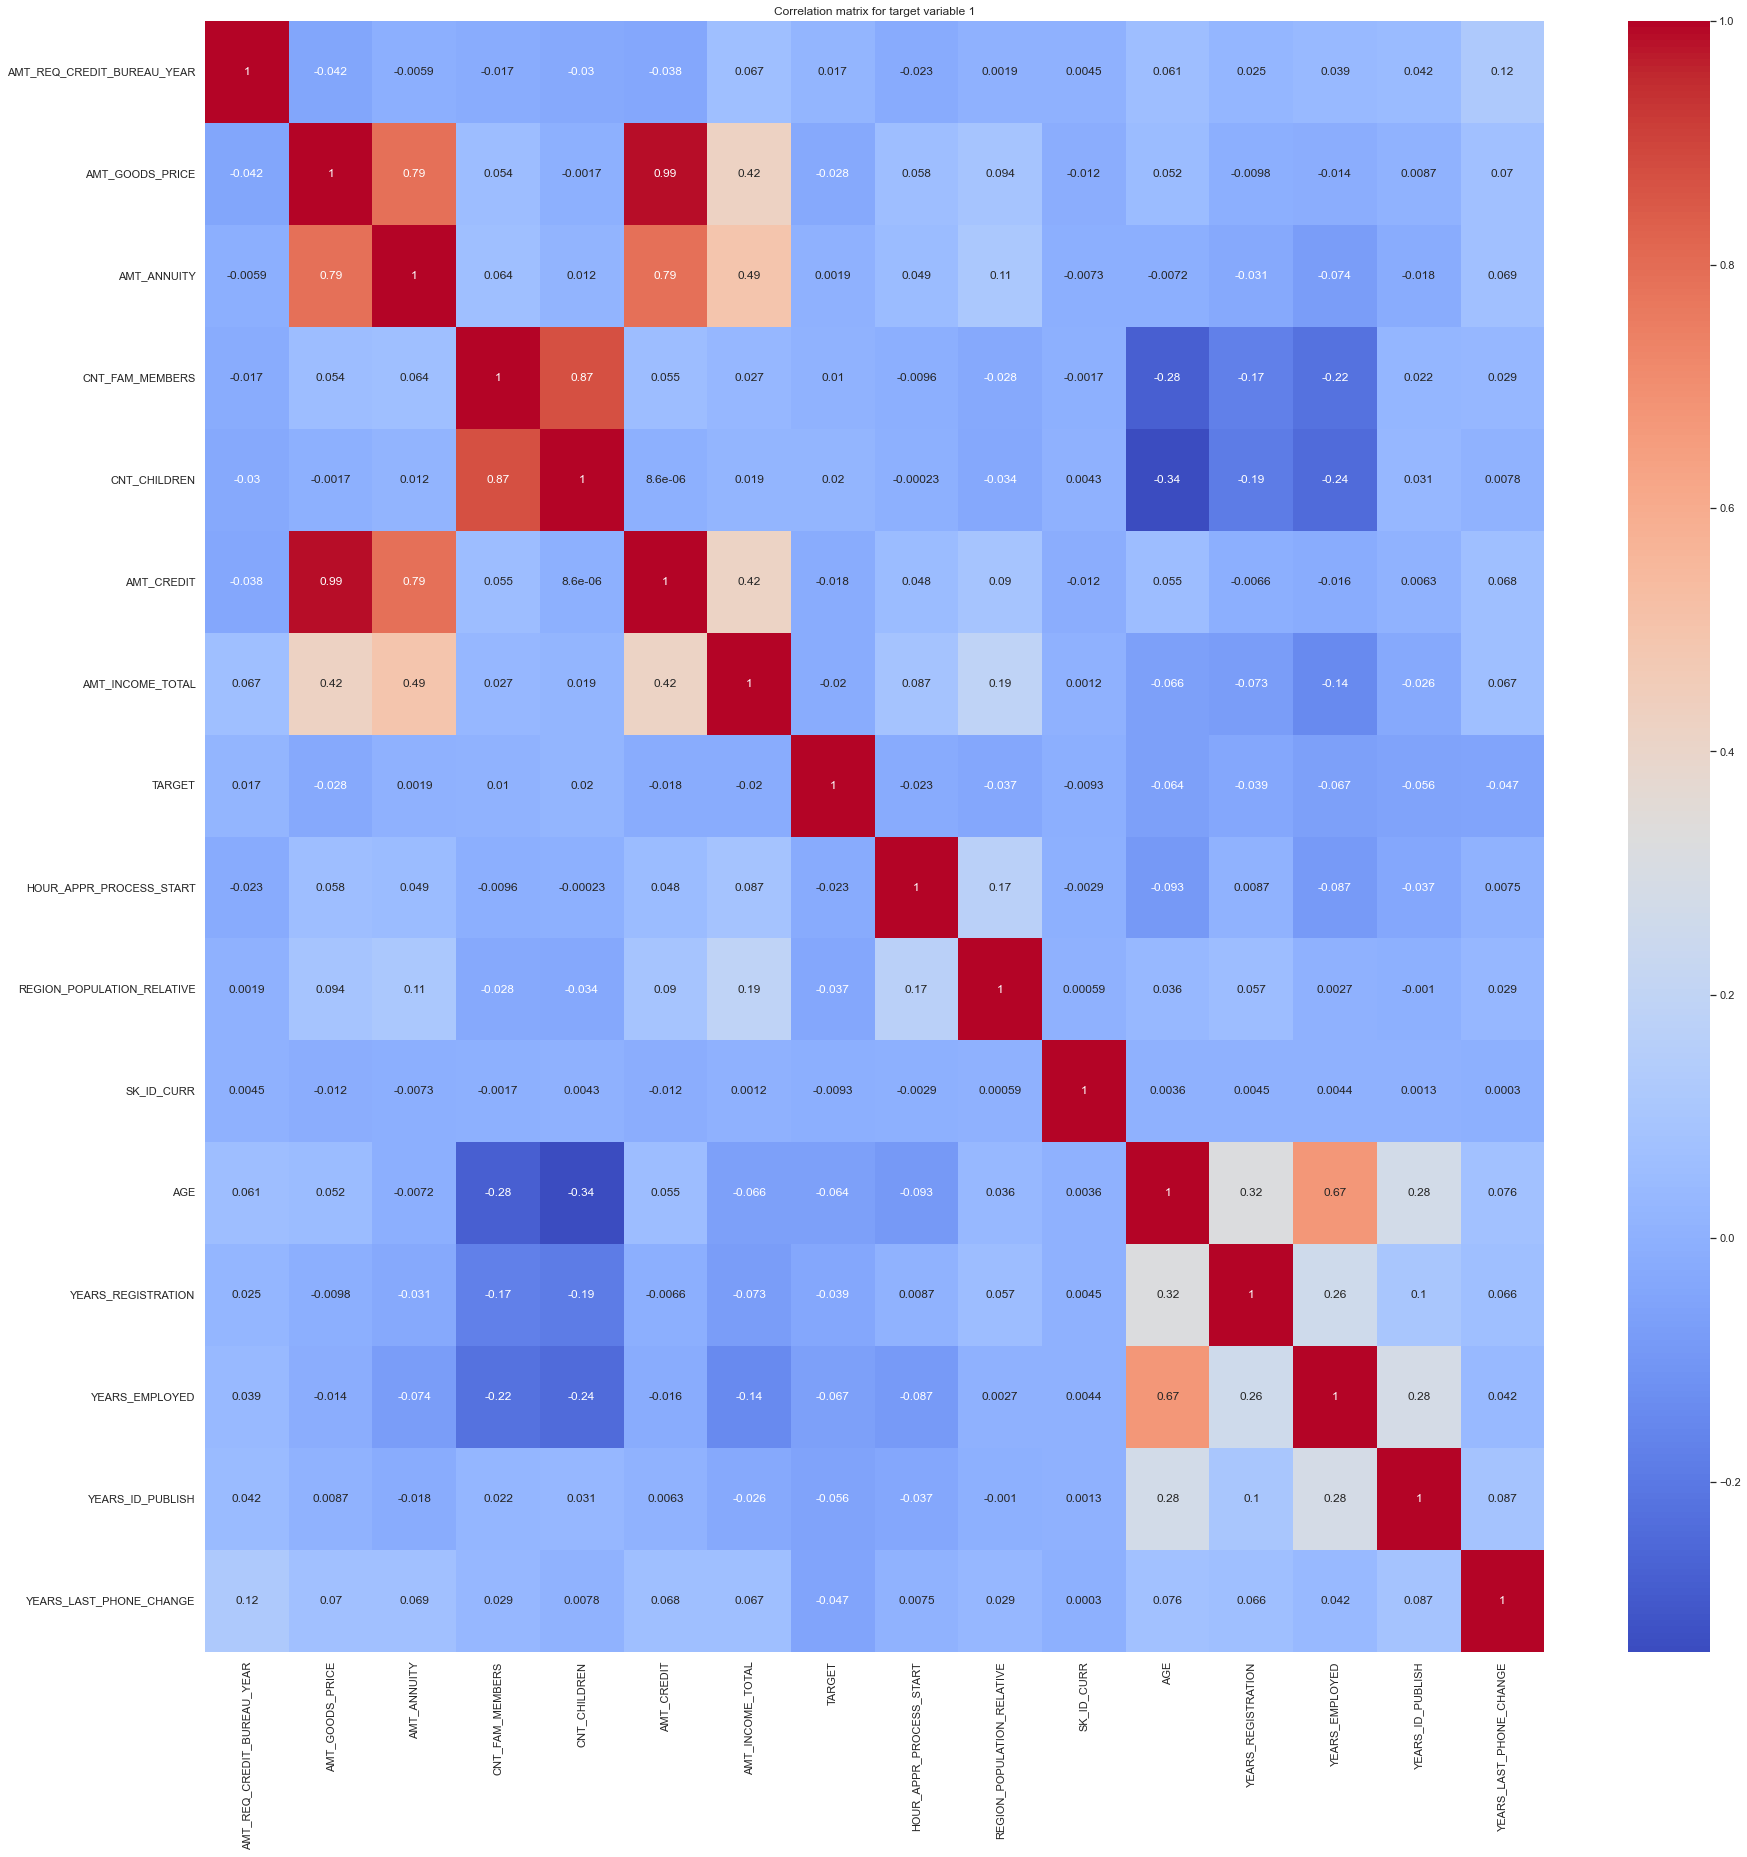

In [141]:
plt.figure(figsize=(30,30)) 
sns.heatmap(DefaultersA.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for target variable 1')
plt.show()

In [142]:
corr0 = DefaultersA.corr()
corr_df0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr_df0 = corr_df0.unstack().reset_index().dropna(subset = [0])
corr_df0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df0['Corr_abs'] = abs(corr_df0['Correlation_Value'])
corr_df0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df0.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
81,AMT_CREDIT,AMT_GOODS_PRICE,0.9865938685,0.9865938685
67,CNT_CHILDREN,CNT_FAM_MEMBERS,0.8711844366,0.8711844366
33,AMT_ANNUITY,AMT_GOODS_PRICE,0.7897821728,0.7897821728
82,AMT_CREDIT,AMT_ANNUITY,0.7893174057,0.7893174057
219,YEARS_EMPLOYED,AGE,0.6712800914,0.6712800914
98,AMT_INCOME_TOTAL,AMT_ANNUITY,0.4924118442,0.4924118442
97,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.4236424866,0.4236424866
101,AMT_INCOME_TOTAL,AMT_CREDIT,0.4179464798,0.4179464798
180,AGE,CNT_CHILDREN,-0.3397410030,0.3397410030
203,YEARS_REGISTRATION,AGE,0.3242188813,0.3242188813


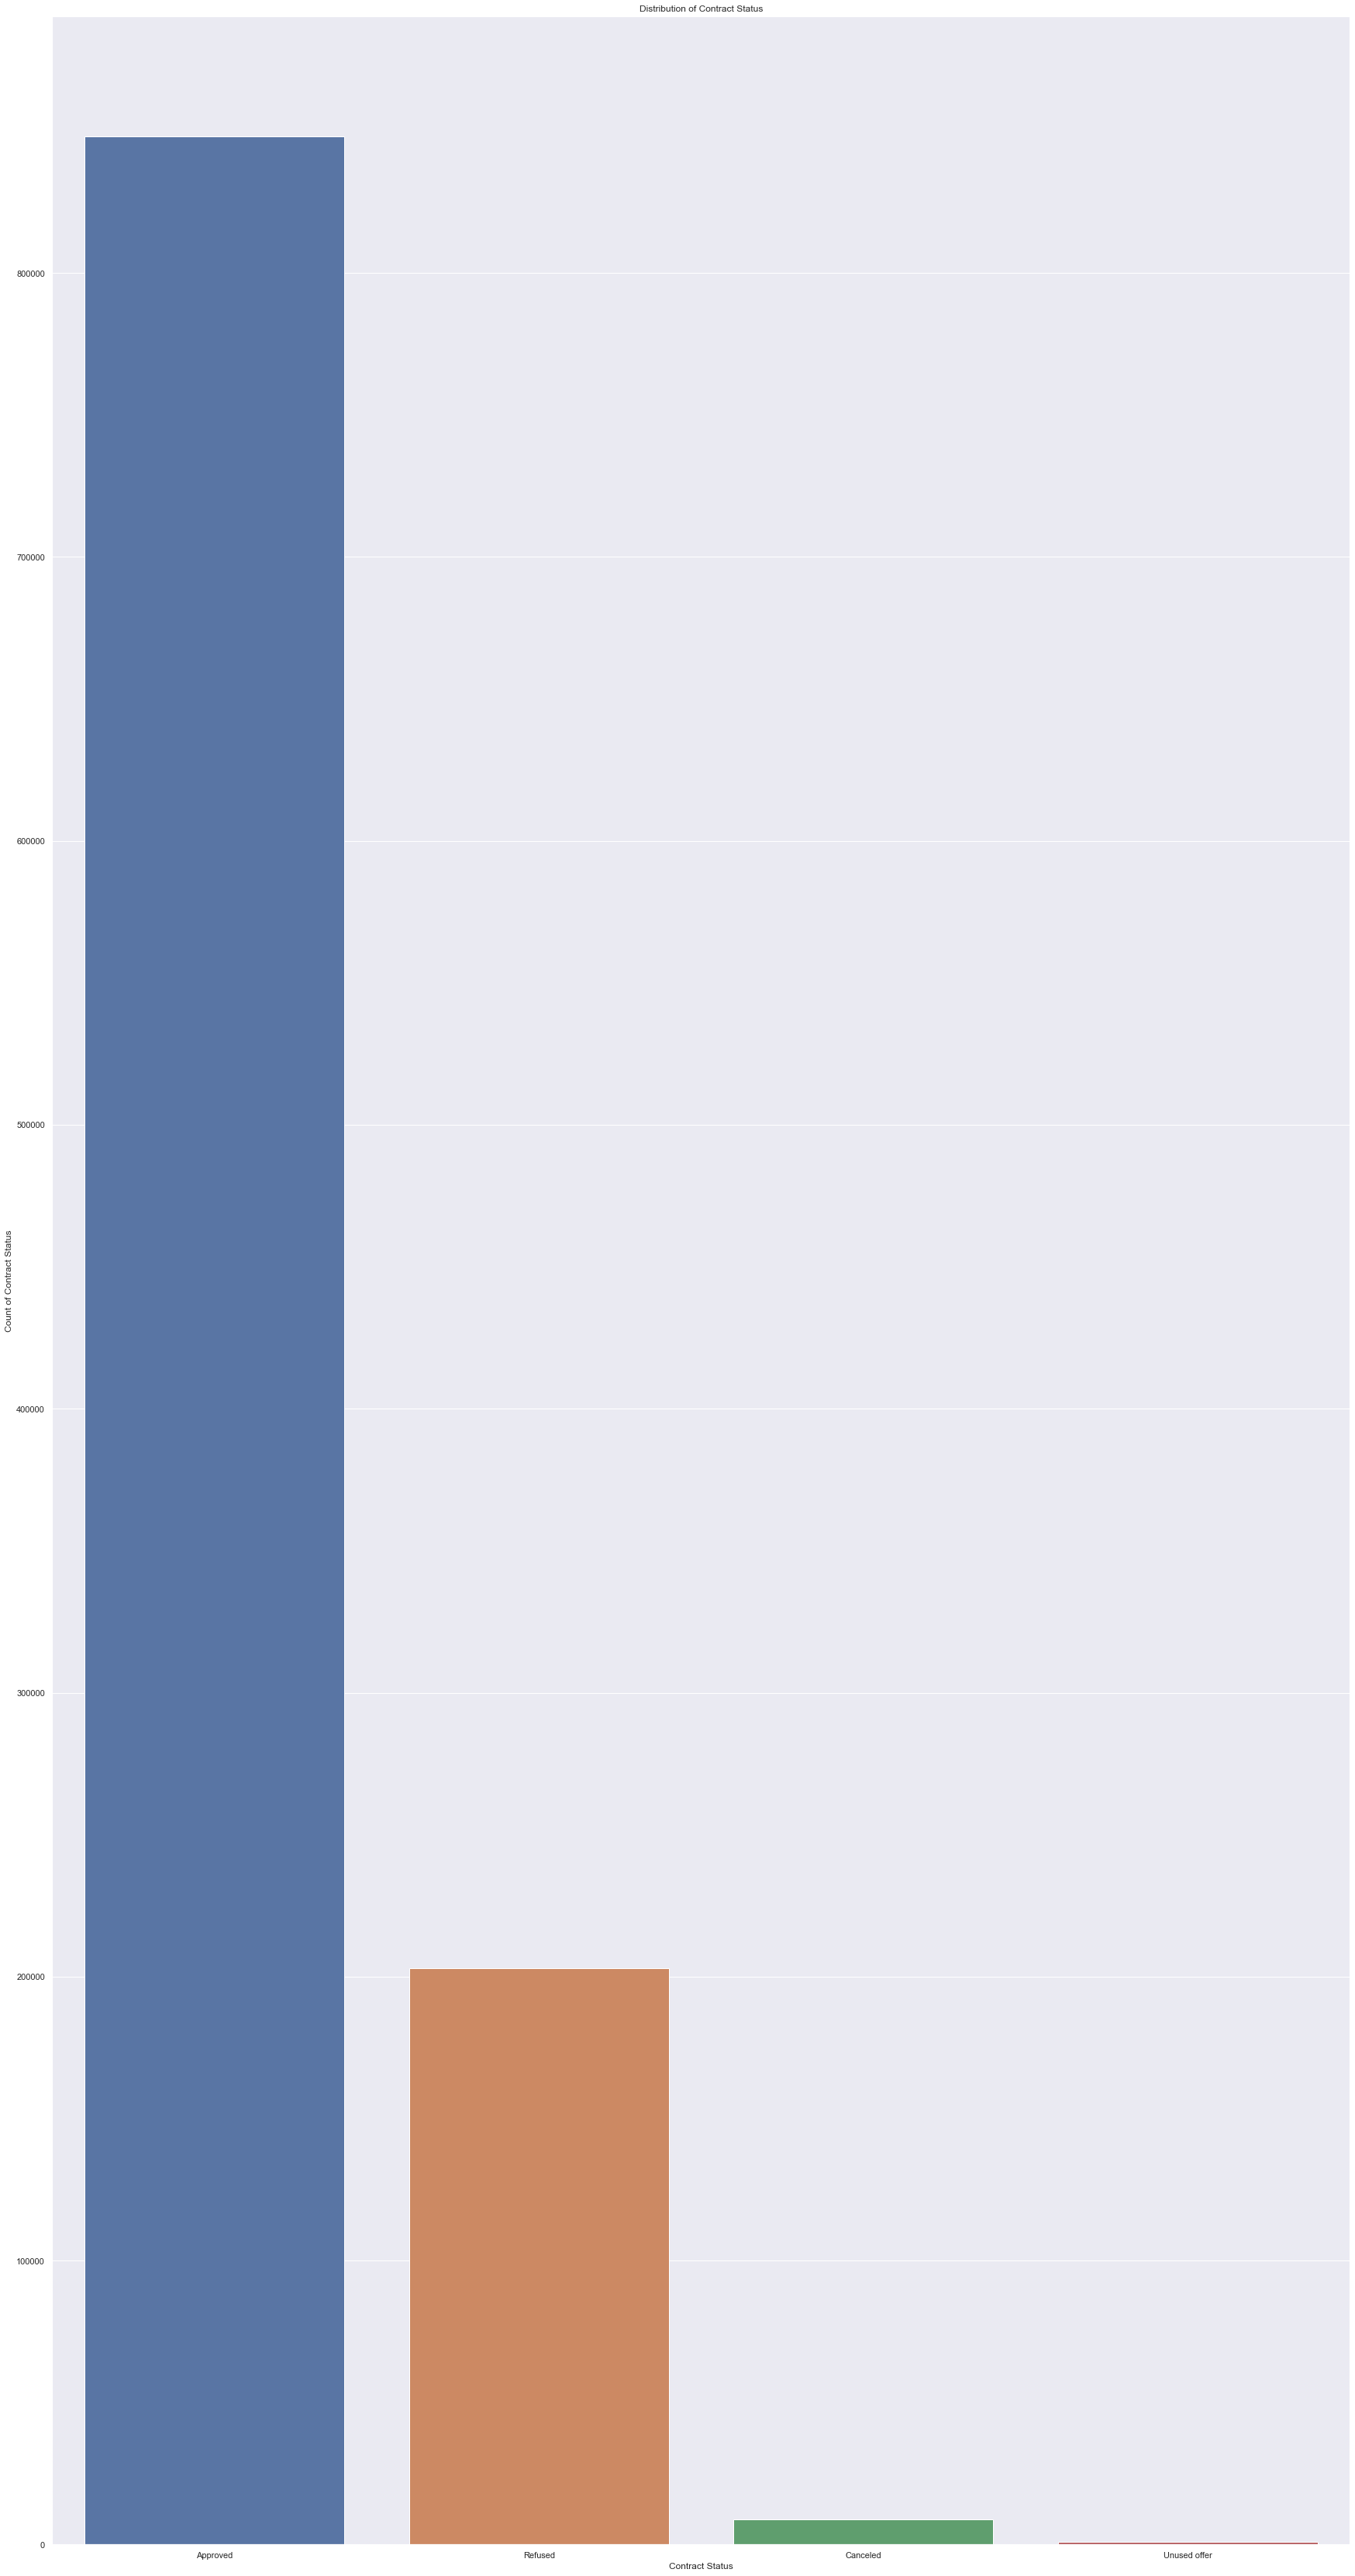

In [143]:
sns.countplot(capp['NAME_CONTRACT_STATUS'])
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()





# FINAL SUGGESTIONS to Bank

## Following are the features to look to avoid –
#### Work Experience- The lesser the job experience, more are the defaults. Target clients with more than 20 years of employment
#### Income Type - People on Maternity Leave, 
#### Occupation - Low Skilled Labourers, Unemployed People

## Following are the features to look for –
#### Target clients with more than 20 years of empoyment
#### Student, Businessman
#### Pensioners also seem a good bet